**Notebook Autor: Souvik Ganguly**

Data generated in previous stage DQ_checks and Descriptive_Statisticalal_reports.ipynb is used here for EDA: /content/drive/MyDrive/Lending_Club_Analysis/data/dataframe_for_eda.csv <br>

# **This notebook generates:**<br>
**2 Data Cleaning and feature engineering reports for columns with missing values and columns with no missing values**<br>


# **Data Cleaning and feature engineering reports**
**2 exhaustive analysis reports are generated with the help of DQ reports, descriptive statistical reports and EDA using python where each variables with and without missing values are analyzed and below conclusions are drawn from the analysis:**<br>
**1. Drop Columns(Y/N)**<br>
**2. Impute outlier values(Y/N)**<br>
**3. Impute outlier values by**<br>
**4. Box_Cox transformation required**<br>
**5. Column for Clustering**<br>
**6. Column for Prediction**

# **1. Load python packages and dataset**

In [ ]:
# LIBRARIES -----
# !pip install xlsxwriter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set seaborn style
sns.set(style="whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#Mount google drive folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read the transactions data
df = pd.read_csv('/content/drive/MyDrive/Lending_Club_Analysis/Output_files/dataframe_for_eda.csv', low_memory=False)

In [ ]:
df.shape

(1345310, 93)

In [ ]:
#First 5 rows of data
df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  68407277     3600.0       3600.0           3600.0   36 months     13.99   
1  68355089    24700.0      24700.0          24700.0   36 months     11.99   
2  68341763    20000.0      20000.0          20000.0   60 months     10.78   
3  68476807    10400.0      10400.0          10400.0   60 months     22.45   
4  68426831    11950.0      11950.0          11950.0   36 months     13.44   

   installment grade sub_grade             emp_title emp_length  \
0       123.03     C        C4               leadman  10+ years   
1       820.28     C        C1              Engineer  10+ years   
2       432.66     B        B4          truck driver  10+ years   
3       289.91     F        F1   Contract Specialist    3 years   
4       405.18     C        C3  Veterinary Tecnician    4 years   

  home_ownership  annual_inc verification_status   issue_d loan_status  \
0       MORTGAGE     55000.0        Not Verified  Dec-2015  Fully Paid   
1       MORTGAGE     65000.0        Not Verified  Dec-2015  Fully Paid   
2       MORTGAGE     63000.0        Not Verified  Dec-2015  Fully Paid   
3       MORTGAGE    104433.0     Source Verified  Dec-2015  Fully Paid   
4           RENT     34000.0     Source Verified  Dec-2015  Fully Paid   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

              purpose               title zip_code addr_state    dti  \
0  debt_consolidation  Debt consolidation    190xx         PA   5.91   
1      small_business            Business    577xx         SD  16.06   
2    home_improvement                 NaN    605xx         IL  10.78   
3      major_purchase      Major purchase    174xx         PA  25.37   
4  debt_consolidation  Debt consolidation    300xx         GA  10.20   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0          0.0         Aug-2003           675.0            679.0   
1          1.0         Dec-1999           715.0            719.0   
2          0.0         Aug-2000           695.0            699.0   
3          1.0         Jun-1998           695.0            699.0   
4          0.0         Oct-1987           690.0            694.0   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0             1.0       7.0      0.0     2765.0        29.7       13.0   
1             4.0      22.0      0.0    21470.0        19.2       38.0   
2             0.0       6.0      0.0     7869.0        56.2       18.0   
3             3.0      12.0      0.0    21929.0        64.5       35.0   
4             0.0       5.0      0.0     8822.0        68.4        6.0   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   w        0.0            0.0   4421.723917   
1                   w        0.0            0.0  25679.660000   
2                   w        0.0            0.0  22705.924294   
3                   w        0.0            0.0  11740.500000   
4                   w        0.0            0.0  13708.948530   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          4421.72           3600.0         821.72                 0.0   
1         25679.66          24700.0         979.66                 0.0   
2         22705.92          20000.0        2705.92                 0.0   
3         11740.50          10400.0        1340.50                 0.0   
4         13708.95          11950.0        1758.95                 0.0   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0         0.0                      0.0     Jan-2019           122.67   
1         0.0         

# **2.0 Exploratory Data Analysis and Data Cleaning**

# **2.1 Analysing columns with null values < 40%**

**Based on data in the 'statistics_columns_with_missing_values.xls' workbook and the data quality report, conducting univariate and bivariate analysis on each column to impute the missing values**

In [ ]:
#Functions for data cleaning

def outlier_thresholds(data, column):
    """
    Calculate the lower and upper outlier thresholds for a given column in a DataFrame.

    Parameters:
    - data: pd.DataFrame - The DataFrame containing the data.
    - column: str - The name of the column to calculate outlier thresholds for.

    Returns:
    - lower_bound: float - The lower outlier threshold.
    - upper_bound: float - The upper outlier threshold.
    """
    # Calculate Q1 and Q3
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Calculate the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

**Column: dti**

In [ ]:
#creating 2 different datasets having loan_status as fully paid and charged off
df_fully_paid=df[df['loan_status']=='Fully Paid']
df_charged_off=df[df['loan_status']=='Charged Off']

In [ ]:
len(df_fully_paid)

1076751

In [ ]:
len(df_charged_off)

268559

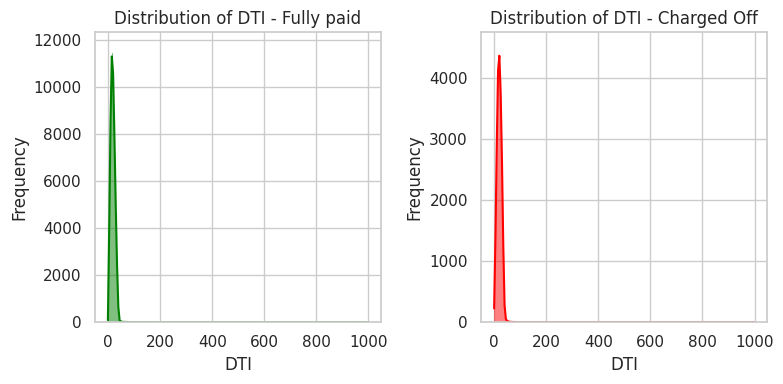

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['dti'], kde=True, color='green')
plt.title('Distribution of DTI - Fully paid')
plt.xlabel('DTI')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['dti'], kde=True, color='red')
plt.title('Distribution of DTI - Charged Off')
plt.xlabel('DTI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

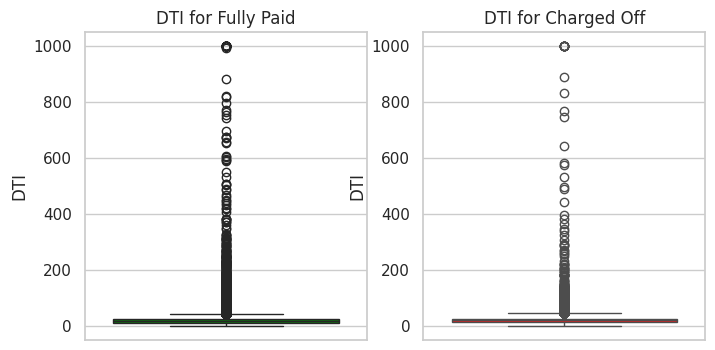

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['dti'].dropna(), color='green')
plt.title('DTI for Fully Paid')
plt.ylabel('DTI')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['dti'].dropna(), color='red')
plt.title('DTI for Charged Off')
plt.ylabel('DTI')

plt.show()  # Show all plots

The above plot shows that the column dti is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [ ]:
dti_lower_bound, dti_upper_bound = outlier_thresholds(df, 'dti')
df[(df['dti']< dti_lower_bound) | (df['dti']> dti_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     3815
Charged Off    1658
Name: count, dtype: int64

In [ ]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

In [ ]:
df[df['dti'].isnull()]['loan_status'].value_counts()

loan_status
Fully Paid     303
Charged Off     71
Name: count, dtype: int64

**Column: revol_util**

In [ ]:
len(df_fully_paid)

1076751

In [ ]:
len(df_charged_off)

268559

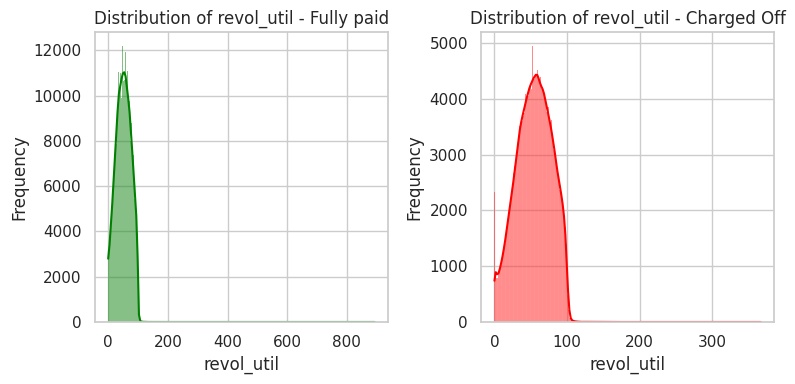

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['revol_util'], kde=True, color='green')
plt.title('Distribution of revol_util - Fully paid')
plt.xlabel('revol_util')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['revol_util'], kde=True, color='red')
plt.title('Distribution of revol_util - Charged Off')
plt.xlabel('revol_util')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

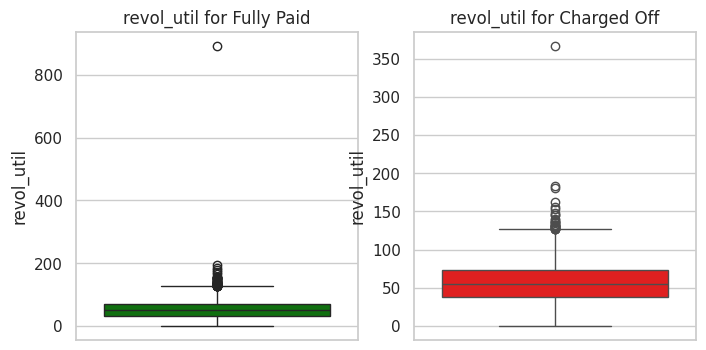

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['revol_util'].dropna(), color='green')
plt.title('revol_util for Fully Paid')
plt.ylabel('revol_util')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['revol_util'].dropna(), color='red')
plt.title('revol_util for Charged Off')
plt.ylabel('revol_util')

plt.show()  # Show all plots

The above plot shows that the column dti is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [ ]:
revol_util_lower_bound, revol_util_upper_bound = outlier_thresholds(df, 'revol_util')
df[(df['revol_util']< revol_util_lower_bound) | (df['revol_util']> revol_util_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     44
Charged Off    28
Name: count, dtype: int64

In [ ]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

**Column: collections_12_mths_ex_med and tot_coll_amt**

In [ ]:
df.shape

(1345310, 93)

In [ ]:
100*df['loan_status'].value_counts()/len(df)

loan_status
Fully Paid     80.037389
Charged Off    19.962611
Name: count, dtype: float64

In [ ]:
df[df['collections_12_mths_ex_med']>0].shape

(21041, 93)

In [ ]:
100*df[df['collections_12_mths_ex_med']>0]['loan_status'].value_counts()/len(df[df['collections_12_mths_ex_med']>0])

loan_status
Fully Paid     74.506915
Charged Off    25.493085
Name: count, dtype: float64

In [ ]:
100*df[df['collections_12_mths_ex_med']==0]['loan_status'].value_counts()/len(df[df['collections_12_mths_ex_med']==0])

loan_status
Fully Paid     80.124874
Charged Off    19.875126
Name: count, dtype: float64

In [ ]:
df[df['tot_coll_amt']>0].shape

(195766, 93)

In [ ]:
100*df[df['tot_coll_amt']>0]['loan_status'].value_counts()/len(df[df['tot_coll_amt']>0])

loan_status
Fully Paid     77.778572
Charged Off    22.221428
Name: count, dtype: float64

In [ ]:
100*df[df['tot_coll_amt']==0]['loan_status'].value_counts()/len(df[df['tot_coll_amt']==0])

loan_status
Fully Paid     80.153824
Charged Off    19.846176
Name: count, dtype: float64

**Column: tot_cur_bal**

In [ ]:
len(df_fully_paid)

1076751

In [ ]:
len(df_charged_off)

268559

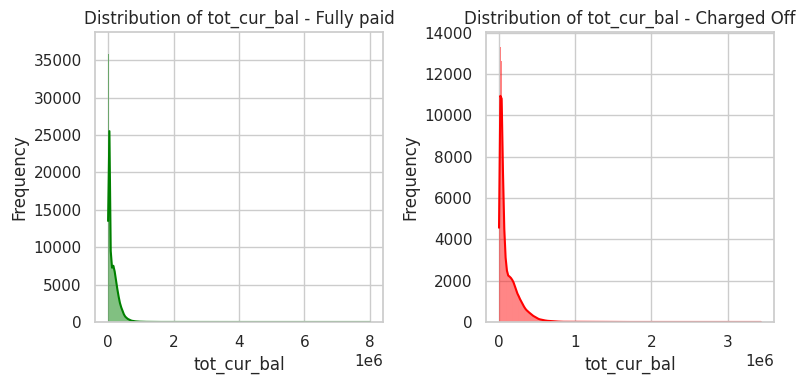

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['tot_cur_bal'], kde=True, color='green')
plt.title('Distribution of tot_cur_bal - Fully paid')
plt.xlabel('tot_cur_bal')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['tot_cur_bal'], kde=True, color='red')
plt.title('Distribution of tot_cur_bal - Charged Off')
plt.xlabel('tot_cur_bal')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

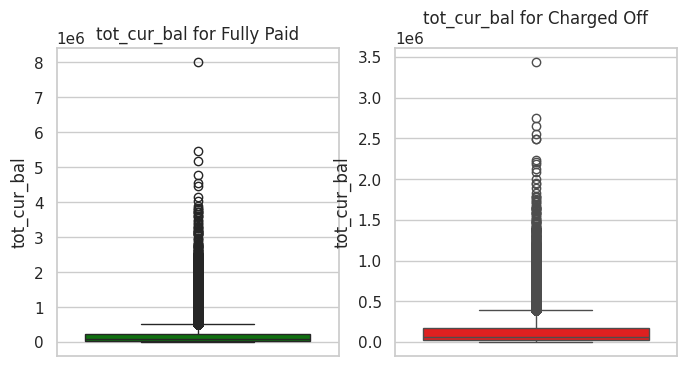

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['tot_cur_bal'].dropna(), color='green')
plt.title('tot_cur_bal for Fully Paid')
plt.ylabel('tot_cur_bal')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['tot_cur_bal'].dropna(), color='red')
plt.title('tot_cur_bal for Charged Off')
plt.ylabel('tot_cur_bal')

plt.show()  # Show all plots

The above plot shows that the column dti is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [ ]:
tot_cur_bal_lower_bound, tot_cur_bal_upper_bound = outlier_thresholds(df, 'tot_cur_bal')
df[(df['tot_cur_bal']< tot_cur_bal_lower_bound) | (df['tot_cur_bal']> tot_cur_bal_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     38552
Charged Off     5617
Name: count, dtype: int64

In [ ]:
print('lower outlier value:', tot_cur_bal_lower_bound)
print('upper outlier value:', tot_cur_bal_upper_bound)

lower outlier value: -242515.0
upper outlier value: 482653.0


In [ ]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

In [ ]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['tot_cur_bal'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

Percentile       Value  Difference
0          0.0        0.00         NaN
1          5.0     8625.00     8625.00
2         10.0    14065.20     5440.20
3         15.0    19152.00     5086.80
4         20.0    24169.00     5017.00
5         25.0    29423.00     5254.00
6         30.0    35307.00     5884.00
7         35.0    42200.70     6893.70
8         40.0    50952.00     8751.30
9         45.0    62943.00    11991.00
10        50.0    80231.00    17288.00
11        55.0   103361.00    23130.00
12        60.0   129833.20    26472.20
13        65.0   155958.00    26124.80
14        70.0   182120.00    26162.00
15        75.0   210715.00    28595.00
16        80.0   244056.60    33341.60
17        85.0   285012.00    40955.40
18        90.0   340365.00    55353.00
19        95.0   433473.00    93108.00
20        96.0   462794.44    29321.44
21        96.5   480992.00    18197.56
22        97.0   502781.00    21789.00
23        97.5   529736.90    26955.90
24        98.0   563359.84    33622.94
25        98.5   608687.89    45328.05
26        99.0   674288.60    65600.71
27        99.5   806223.24   131934.64
28       100.0  8000078.00  7193854.76

**Column: avg_cur_bal**

In [ ]:
len(df_fully_paid)

1076751

In [ ]:
len(df_charged_off)

268559

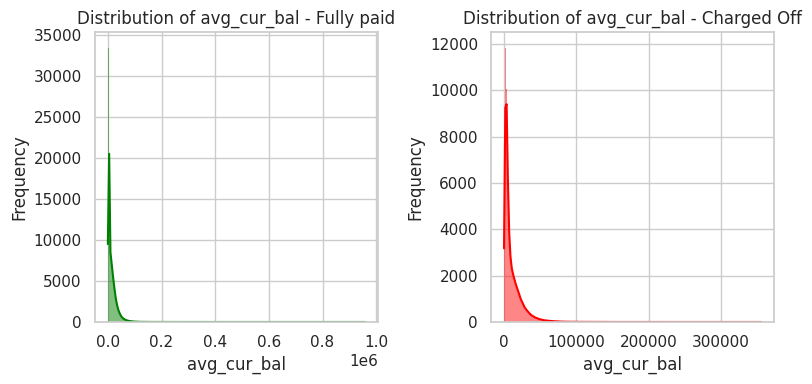

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['avg_cur_bal'], kde=True, color='green')
plt.title('Distribution of avg_cur_bal - Fully paid')
plt.xlabel('avg_cur_bal')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['avg_cur_bal'], kde=True, color='red')
plt.title('Distribution of avg_cur_bal - Charged Off')
plt.xlabel('avg_cur_bal')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

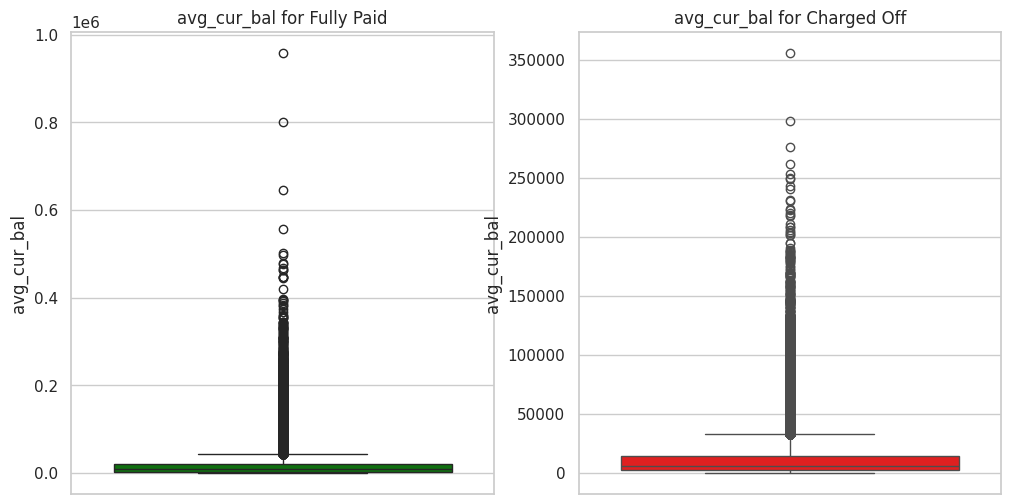

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['avg_cur_bal'].dropna(), color='green')
plt.title('avg_cur_bal for Fully Paid')
plt.ylabel('avg_cur_bal')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['avg_cur_bal'].dropna(), color='red')
plt.title('avg_cur_bal for Charged Off')
plt.ylabel('avg_cur_bal')

plt.show()  # Show all plots

The above plot shows that the column dti is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [ ]:
avg_cur_bal_lower_bound, avg_cur_bal_upper_bound = outlier_thresholds(df, 'avg_cur_bal')
df[(df['avg_cur_bal']< avg_cur_bal_lower_bound) | (df['avg_cur_bal']> avg_cur_bal_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     59362
Charged Off     8161
Name: count, dtype: int64

In [ ]:
print('lower outlier value:', avg_cur_bal_lower_bound)
print('upper outlier value:', avg_cur_bal_upper_bound)

lower outlier value: -20323.0
upper outlier value: 42141.0


In [ ]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

In [ ]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['avg_cur_bal'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

Percentile     Value  Difference
0          0.0       0.0         NaN
1          5.0    1100.0      1100.0
2         10.0    1640.0       540.0
3         15.0    2128.0       488.0
4         20.0    2605.0       477.0
5         25.0    3101.0       496.0
6         30.0    3643.0       542.0
7         35.0    4279.0       636.0
8         40.0    5058.0       779.0
9         45.0    6057.0       999.0
10        50.0    7407.0      1350.0
11        55.0    9145.0      1738.0
12        60.0   11199.0      2054.0
13        65.0   13446.0      2247.0
14        70.0   15917.0      2471.0
15        75.0   18717.0      2800.0
16        80.0   22039.0      3322.0
17        85.0   26259.0      4220.0
18        90.0   32220.0      5961.0
19        95.0   43045.0     10825.0
20        96.0   46710.6      3665.6
21        96.5   48995.4      2284.8
22        97.0   51702.2      2706.8
23        97.5   55022.0      3319.8
24        98.0   59254.0      4232.0
25        98.5   64953.8      5699.8
26        99.0   73526.8      8573.0
27        99.5   90154.0     16627.2
28       100.0  958084.0    867930.0

**Column: bc_open_to_buy**

In [ ]:
len(df_fully_paid)

1076751

In [ ]:
len(df_charged_off)

268559

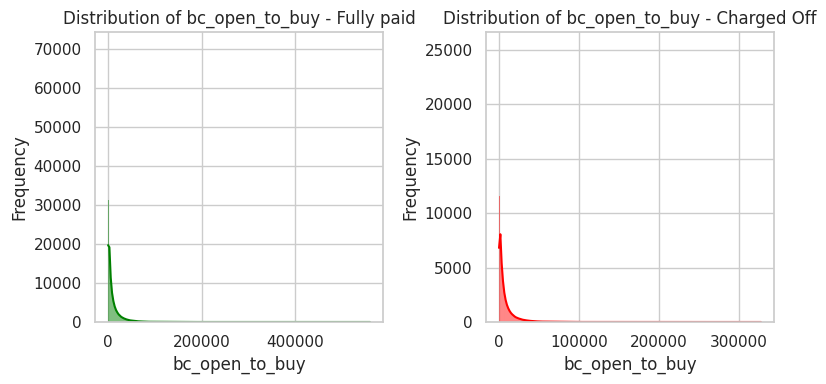

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['bc_open_to_buy'], kde=True, color='green')
plt.title('Distribution of bc_open_to_buy - Fully paid')
plt.xlabel('bc_open_to_buy')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['bc_open_to_buy'], kde=True, color='red')
plt.title('Distribution of bc_open_to_buy - Charged Off')
plt.xlabel('bc_open_to_buy')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

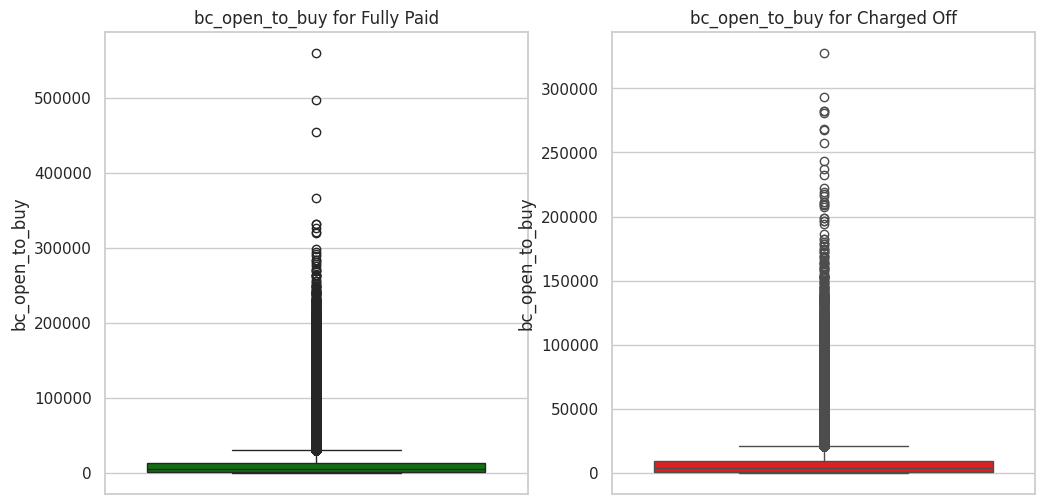

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['bc_open_to_buy'].dropna(), color='green')
plt.title('bc_open_to_buy for Fully Paid')
plt.ylabel('bc_open_to_buy')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['bc_open_to_buy'].dropna(), color='red')
plt.title('bc_open_to_buy for Charged Off')
plt.ylabel('bc_open_to_buy')

plt.show()  # Show all plots

The above plot shows that the column bc_open_to_buy is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [ ]:
bc_open_to_buy_lower_bound, bc_open_to_buy_upper_bound = outlier_thresholds(df, 'bc_open_to_buy')
df[(df['bc_open_to_buy']< bc_open_to_buy_lower_bound) | (df['bc_open_to_buy']> bc_open_to_buy_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     98329
Charged Off    13234
Name: count, dtype: int64

In [ ]:
len(df[(df['bc_open_to_buy']< bc_open_to_buy_lower_bound) | (df['bc_open_to_buy']> bc_open_to_buy_upper_bound)])

111563

In [ ]:
print('lower outlier value:', bc_open_to_buy_lower_bound)
print('upper outlier value:', bc_open_to_buy_upper_bound)

lower outlier value: -14914.5
upper outlier value: 28761.5


In [ ]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

**Column: bc_util**

In [ ]:
len(df_fully_paid)

1076751

In [ ]:
len(df_charged_off)

268559

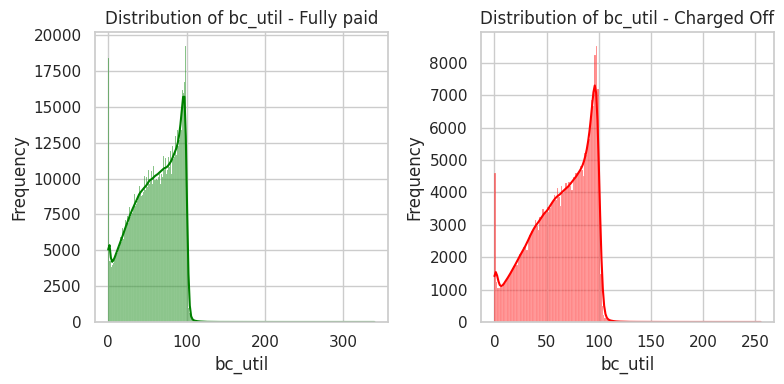

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['bc_util'], kde=True, color='green')
plt.title('Distribution of bc_util - Fully paid')
plt.xlabel('bc_util')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['bc_util'], kde=True, color='red')
plt.title('Distribution of bc_util - Charged Off')
plt.xlabel('bc_util')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

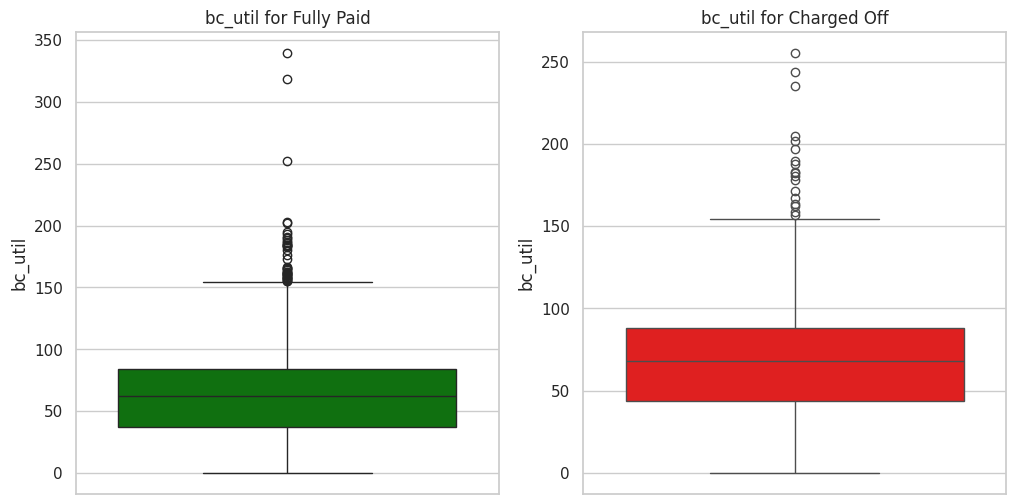

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['bc_util'].dropna(), color='green')
plt.title('bc_util for Fully Paid')
plt.ylabel('bc_util')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['bc_util'].dropna(), color='red')
plt.title('bc_util for Charged Off')
plt.ylabel('bc_util')

plt.show()  # Show all plots

The above plot shows that the column bc_open_to_buy is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [ ]:
bc_util_lower_bound, bc_util_upper_bound = outlier_thresholds(df, 'bc_util')
df[(df['bc_util']< bc_util_lower_bound) | (df['bc_util']> bc_util_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     42
Charged Off    18
Name: count, dtype: int64

In [ ]:
len(df[(df['bc_util']< bc_util_lower_bound) | (df['bc_util']> bc_util_upper_bound)])

60

In [ ]:
print('lower outlier value:', bc_util_lower_bound)
print('upper outlier value:', bc_util_upper_bound)

lower outlier value: -31.450000000000003
upper outlier value: 154.55


In [ ]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

**Column: mort_acc**

In [ ]:
len(df_fully_paid)

1076751

In [ ]:
len(df_charged_off)

268559

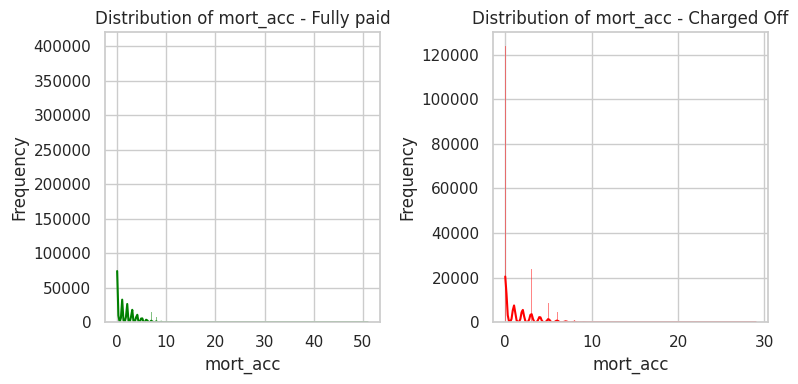

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['mort_acc'], kde=True, color='green')
plt.title('Distribution of mort_acc - Fully paid')
plt.xlabel('mort_acc')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['mort_acc'], kde=True, color='red')
plt.title('Distribution of mort_acc - Charged Off')
plt.xlabel('mort_acc')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

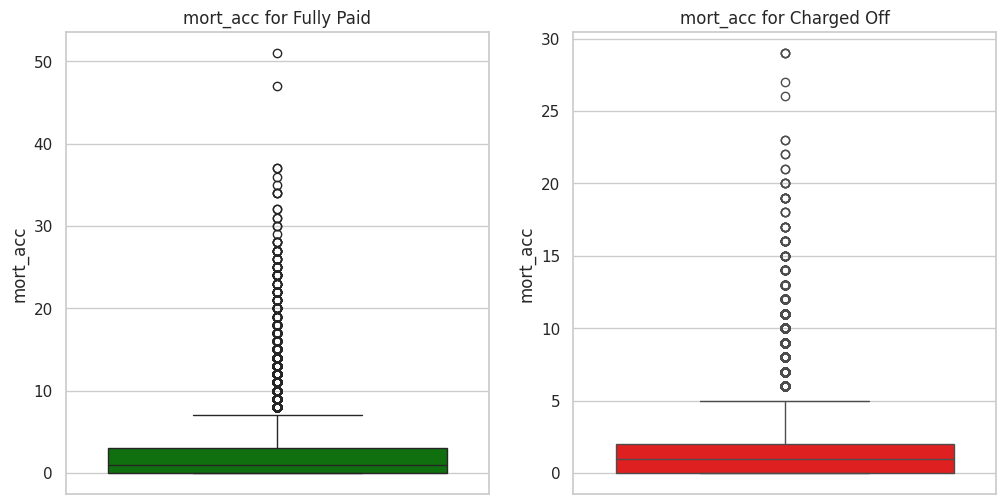

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['mort_acc'].dropna(), color='green')
plt.title('mort_acc for Fully Paid')
plt.ylabel('mort_acc')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['mort_acc'].dropna(), color='red')
plt.title('mort_acc for Charged Off')
plt.ylabel('mort_acc')

plt.show()  # Show all plots

The above plot shows that the column bc_open_to_buy is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [ ]:
mort_acc_lower_bound, mort_acc_upper_bound = outlier_thresholds(df, 'mort_acc')
df[(df['mort_acc']< mort_acc_lower_bound) | (df['mort_acc']> mort_acc_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     15450
Charged Off     2344
Name: count, dtype: int64

In [ ]:
len(df[(df['mort_acc']< mort_acc_lower_bound) | (df['mort_acc']> mort_acc_upper_bound)])

17794

In [ ]:
print('lower outlier value:', mort_acc_lower_bound)
print('upper outlier value:', mort_acc_upper_bound)

lower outlier value: -4.5
upper outlier value: 7.5


In [ ]:
print(len(df[df['mort_acc']>0]))
print(len(df[df['mort_acc']==0]))

774192
523837


In [ ]:
df['mort_acc'].mode()

0    0.0
Name: mort_acc, dtype: float64

In [ ]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

**Column: num_actv_rev_tl**

In [ ]:
len(df_fully_paid)

1076751

In [ ]:
len(df_charged_off)

268559

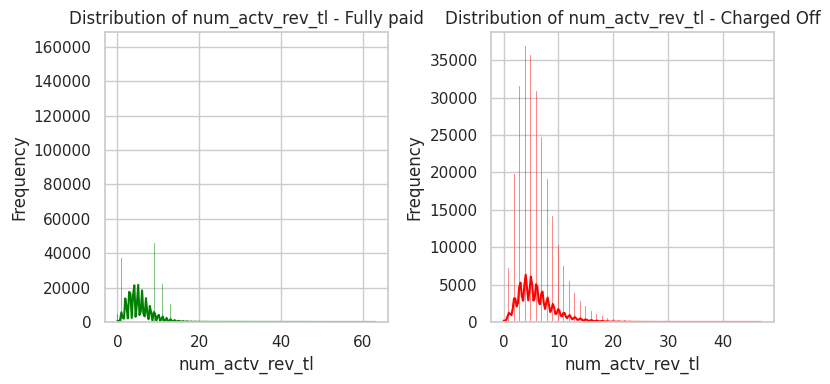

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['num_actv_rev_tl'], kde=True, color='green')
plt.title('Distribution of num_actv_rev_tl - Fully paid')
plt.xlabel('num_actv_rev_tl')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['num_actv_rev_tl'], kde=True, color='red')
plt.title('Distribution of num_actv_rev_tl - Charged Off')
plt.xlabel('num_actv_rev_tl')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

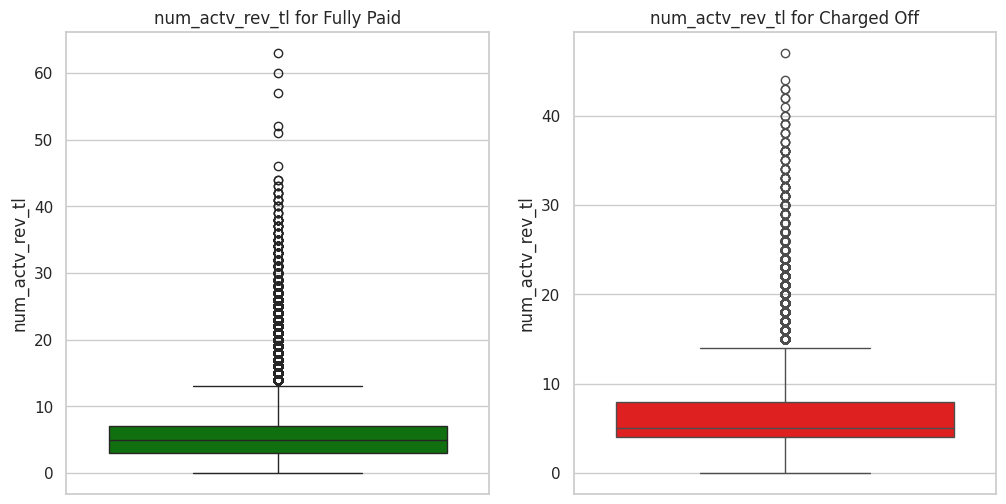

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['num_actv_rev_tl'].dropna(), color='green')
plt.title('num_actv_rev_tl for Fully Paid')
plt.ylabel('num_actv_rev_tl')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['num_actv_rev_tl'].dropna(), color='red')
plt.title('num_actv_rev_tl for Charged Off')
plt.ylabel('num_actv_rev_tl')

plt.show()  # Show all plots

The above plot shows that the column bc_open_to_buy is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [ ]:
num_actv_rev_tl_lower_bound, num_actv_rev_tl_upper_bound = outlier_thresholds(df, 'num_actv_rev_tl')
df[(df['num_actv_rev_tl']< num_actv_rev_tl_lower_bound) | (df['num_actv_rev_tl']> num_actv_rev_tl_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     25752
Charged Off    10216
Name: count, dtype: int64

In [ ]:
len(df[(df['num_actv_rev_tl']< num_actv_rev_tl_lower_bound) | (df['num_actv_rev_tl']> num_actv_rev_tl_upper_bound)])

35968

In [ ]:
print('lower outlier value:', num_actv_rev_tl_lower_bound)
print('upper outlier value:', num_actv_rev_tl_upper_bound)

lower outlier value: -3.0
upper outlier value: 13.0


In [ ]:
print(len(df[df['num_actv_rev_tl']>0]))
print(len(df[df['num_actv_rev_tl']==0]))

1272316
5467


In [ ]:
df['num_actv_rev_tl'].mode()

0    4.0
Name: num_actv_rev_tl, dtype: float64

In [ ]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

**Column: percent_bc_gt_75**

In [ ]:
len(df_fully_paid)

1076751

In [ ]:
len(df_charged_off)

268559

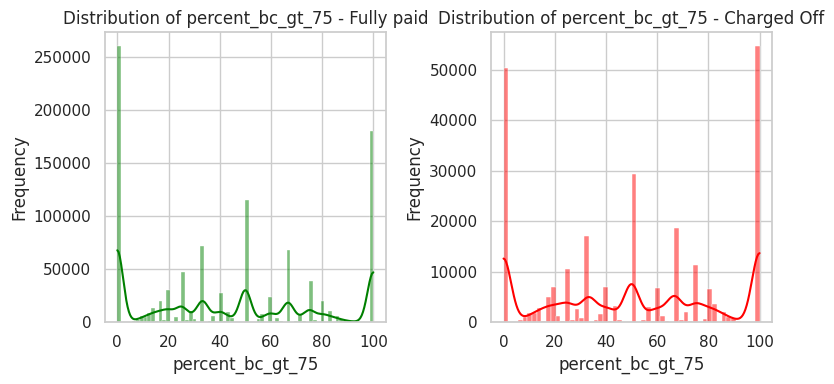

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['percent_bc_gt_75'], kde=True, color='green')
plt.title('Distribution of percent_bc_gt_75 - Fully paid')
plt.xlabel('percent_bc_gt_75')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['percent_bc_gt_75'], kde=True, color='red')
plt.title('Distribution of percent_bc_gt_75 - Charged Off')
plt.xlabel('percent_bc_gt_75')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

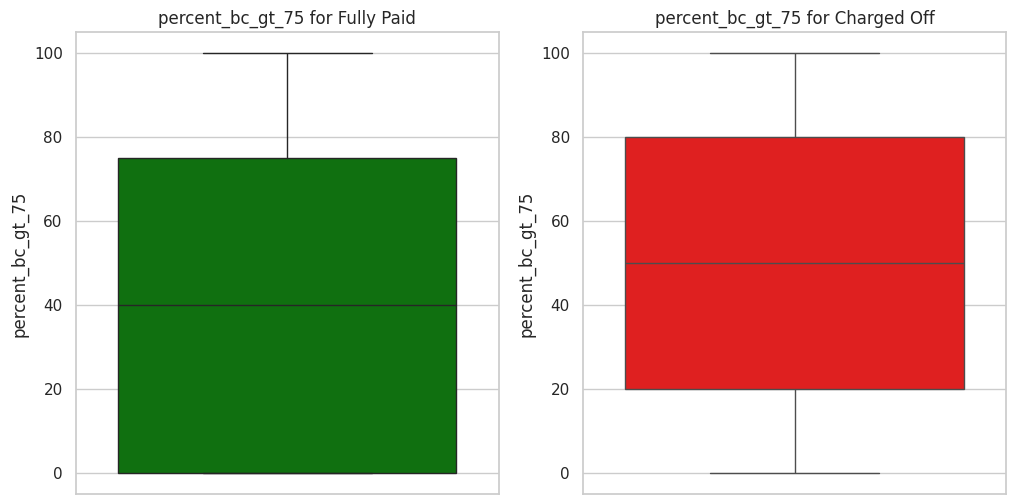

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['percent_bc_gt_75'].dropna(), color='green')
plt.title('percent_bc_gt_75 for Fully Paid')
plt.ylabel('percent_bc_gt_75')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['percent_bc_gt_75'].dropna(), color='red')
plt.title('percent_bc_gt_75 for Charged Off')
plt.ylabel('percent_bc_gt_75')

plt.show()  # Show all plots

The above plot shows that the column bc_open_to_buy is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [ ]:
percent_bc_gt_75_lower_bound, percent_bc_gt_75_upper_bound = outlier_thresholds(df, 'percent_bc_gt_75')
df[(df['percent_bc_gt_75']< percent_bc_gt_75_lower_bound) | (df['percent_bc_gt_75']> percent_bc_gt_75_upper_bound)]['loan_status'].value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
len(df[(df['percent_bc_gt_75']< percent_bc_gt_75_lower_bound) | (df['percent_bc_gt_75']> percent_bc_gt_75_upper_bound)])

0

In [ ]:
print('lower outlier value:', percent_bc_gt_75_lower_bound)
print('upper outlier value:', percent_bc_gt_75_upper_bound)

lower outlier value: -87.5
upper outlier value: 172.5


In [ ]:
print(len(df[df['percent_bc_gt_75']>0]))
print(len(df[df['percent_bc_gt_75']==0]))

974025
309730


In [ ]:
df['percent_bc_gt_75'].mode()

0    0.0
Name: percent_bc_gt_75, dtype: float64

In [ ]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

In [ ]:
print("Column values and no of times values getting repeated")
df['percent_bc_gt_75'].value_counts()

Column values and no of times values getting repeated


percent_bc_gt_75
0.00      309730
100.00    234691
50.00     143988
33.30      88734
66.70      86218
25.00      57467
75.00      49675
20.00      37335
40.00      34464
60.00      30630
80.00      26666
16.70      24039
14.30      15219
83.30      13915
28.60      13066
42.90      11429
12.50       9745
57.10       9586
71.40       8311
85.70       7081
37.50       6986
11.10       6090
22.20       5107
62.50       4814
10.00       3873
87.50       3476
44.40       3450
55.60       2933
30.00       2660
9.10        2493
77.80       2152
18.20       2001
88.90       1755
8.30        1650
27.30       1590
36.40       1284
70.00       1184
45.50       1072
7.70        1059
90.00        962
54.50        894
15.40        829
63.60        794
72.70        680
41.70        654
7.10         634
81.80        622
23.10        612
30.80        567
90.90        500
6.70         454
38.50        446
21.40        442
58.30        441
13.30        348
46.20        344
91.70        261
61.50        2

**Column: tot_hi_cred_lim**

In [ ]:
len(df_fully_paid)

1076751

In [ ]:
len(df_charged_off)

268559

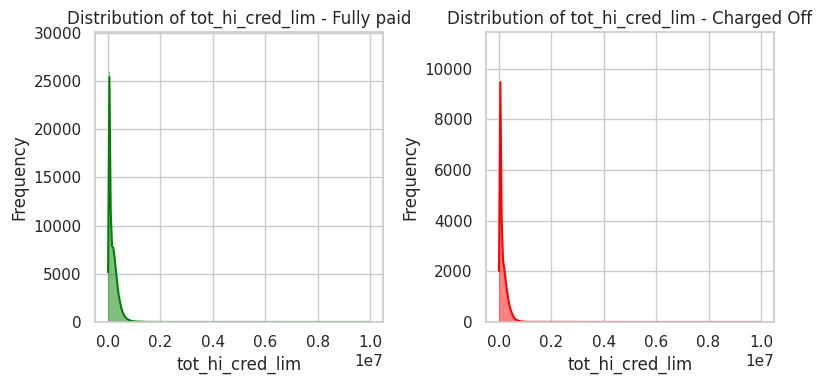

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['tot_hi_cred_lim'], kde=True, color='green')
plt.title('Distribution of tot_hi_cred_lim - Fully paid')
plt.xlabel('tot_hi_cred_lim')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['tot_hi_cred_lim'], kde=True, color='red')
plt.title('Distribution of tot_hi_cred_lim - Charged Off')
plt.xlabel('tot_hi_cred_lim')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

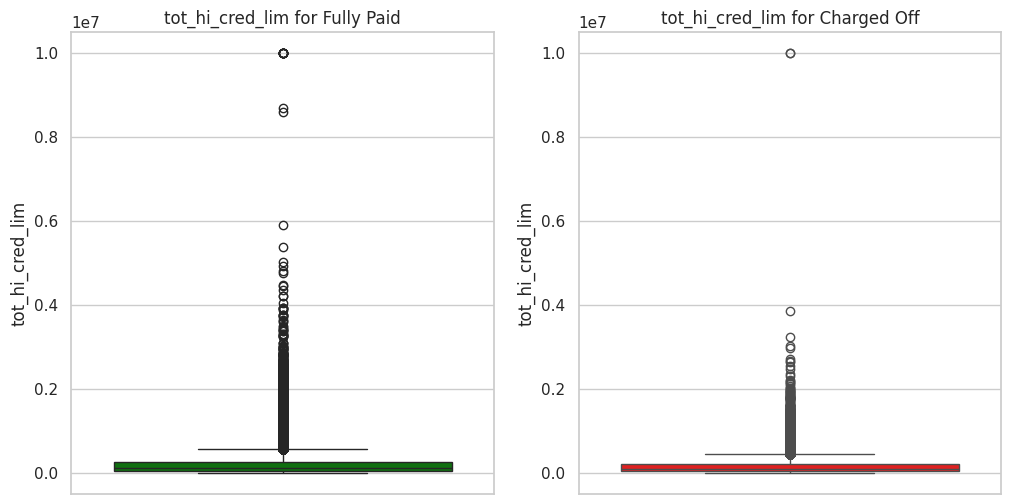

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['tot_hi_cred_lim'].dropna(), color='green')
plt.title('tot_hi_cred_lim for Fully Paid')
plt.ylabel('tot_hi_cred_lim')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['tot_hi_cred_lim'].dropna(), color='red')
plt.title('tot_hi_cred_lim for Charged Off')
plt.ylabel('tot_hi_cred_lim')

plt.show()  # Show all plots

The above plot shows that the column bc_open_to_buy is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [ ]:
tot_hi_cred_lim_lower_bound, tot_hi_cred_lim_upper_bound = outlier_thresholds(df, 'tot_hi_cred_lim')
df[(df['tot_hi_cred_lim']< tot_hi_cred_lim_lower_bound) | (df['tot_hi_cred_lim']> tot_hi_cred_lim_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     38503
Charged Off     5267
Name: count, dtype: int64

In [ ]:
len(df[(df['tot_hi_cred_lim']< tot_hi_cred_lim_lower_bound) | (df['tot_hi_cred_lim']> tot_hi_cred_lim_upper_bound)])

43770

In [ ]:
print('lower outlier value:', tot_hi_cred_lim_lower_bound)
print('upper outlier value:', tot_hi_cred_lim_upper_bound)

lower outlier value: -254062.75
upper outlier value: 555759.25


In [ ]:
print(len(df[df['tot_hi_cred_lim']>0]))
print(len(df[df['tot_hi_cred_lim']==0]))

1277761
22


In [ ]:
df['tot_hi_cred_lim'].mode()

0    12500.0
1    15500.0
Name: tot_hi_cred_lim, dtype: float64

In [ ]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

In [ ]:
43770/len(df)

0.03253525209802945

**Column: total_bal_ex_mort**

In [ ]:
len(df_fully_paid)

1076751

In [ ]:
len(df_charged_off)

268559

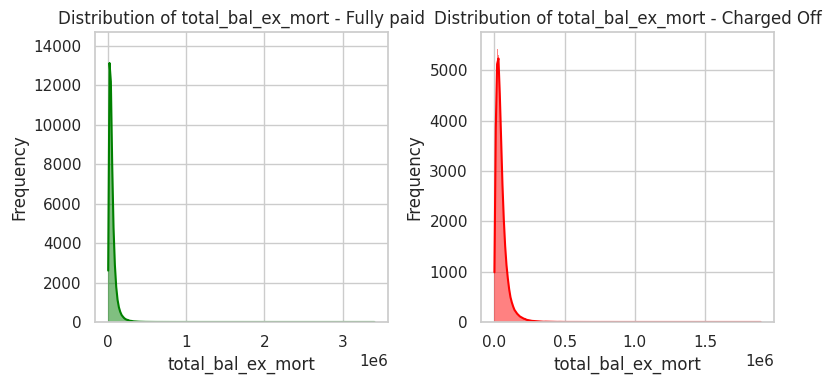

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['total_bal_ex_mort'], kde=True, color='green')
plt.title('Distribution of total_bal_ex_mort - Fully paid')
plt.xlabel('total_bal_ex_mort')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['total_bal_ex_mort'], kde=True, color='red')
plt.title('Distribution of total_bal_ex_mort - Charged Off')
plt.xlabel('total_bal_ex_mort')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

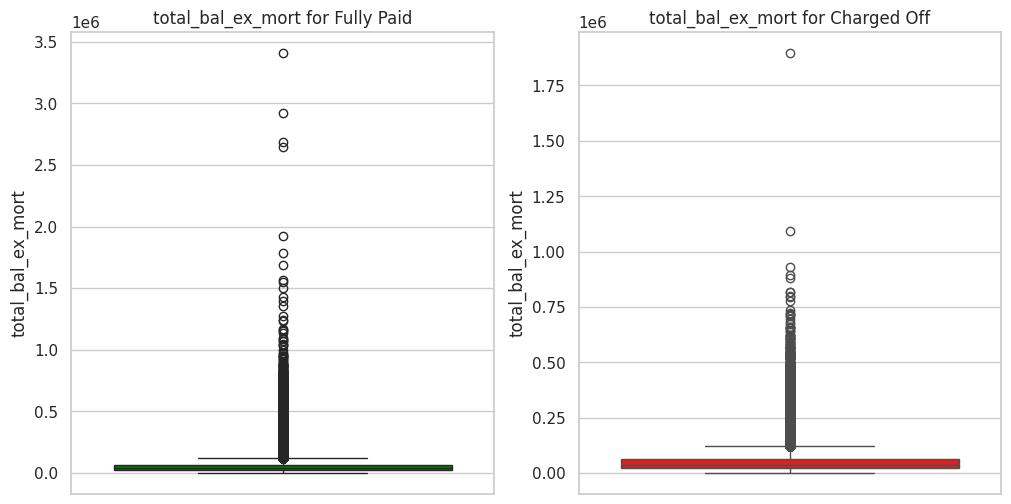

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['total_bal_ex_mort'].dropna(), color='green')
plt.title('total_bal_ex_mort for Fully Paid')
plt.ylabel('total_bal_ex_mort')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['total_bal_ex_mort'].dropna(), color='red')
plt.title('total_bal_ex_mort for Charged Off')
plt.ylabel('total_bal_ex_mort')

plt.show()  # Show all plots

The above plot shows that the column bc_open_to_buy is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [ ]:
total_bal_ex_mort_lower_bound, total_bal_ex_mort_upper_bound = outlier_thresholds(df, 'total_bal_ex_mort')
df[(df['total_bal_ex_mort']< total_bal_ex_mort_lower_bound) | (df['total_bal_ex_mort']> total_bal_ex_mort_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     61478
Charged Off    14338
Name: count, dtype: int64

In [ ]:
len(df[(df['total_bal_ex_mort']< total_bal_ex_mort_lower_bound) | (df['total_bal_ex_mort']> total_bal_ex_mort_upper_bound)])

75816

In [ ]:
print('lower outlier value:', total_bal_ex_mort_lower_bound)
print('upper outlier value:', total_bal_ex_mort_upper_bound)

lower outlier value: -41607.0
upper outlier value: 125041.0


In [ ]:
print(len(df[df['total_bal_ex_mort']>0]))
print(len(df[df['total_bal_ex_mort']==0]))

1297354
675


In [ ]:
df['total_bal_ex_mort'].mode()

0    0.0
Name: total_bal_ex_mort, dtype: float64

In [ ]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

In [ ]:
43770/len(df)

0.03253525209802945

In [ ]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['total_bal_ex_mort'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

Percentile       Value  Difference
0          0.0        0.00         NaN
1          5.0     6848.00     6848.00
2         10.0    10886.00     4038.00
3         15.0    14403.00     3517.00
4         20.0    17714.00     3311.00
5         25.0    20886.00     3172.00
6         30.0    23992.00     3106.00
7         35.0    27127.00     3135.00
8         40.0    30349.00     3222.00
9         45.0    33721.00     3372.00
10        50.0    37296.00     3575.00
11        55.0    41131.00     3835.00
12        60.0    45393.00     4262.00
13        65.0    50203.00     4810.00
14        70.0    55812.00     5609.00
15        75.0    62548.00     6736.00
16        80.0    71033.40     8485.40
17        85.0    82423.00    11389.60
18        90.0    99568.00    17145.00
19        95.0   133175.60    33607.60
20        96.0   145481.88    12306.28
21        96.5   153099.00     7617.12
22        97.0   161997.80     8898.80
23        97.5   173127.90    11130.10
24        98.0   187059.88    13931.98
25        98.5   205788.48    18728.60
26        99.0   234494.32    28705.84
27        99.5   287817.58    53323.26
28       100.0  3408095.00  3120277.42

**Column: total_bal_ex_mort**

In [ ]:
len(df_fully_paid)

1076751

In [ ]:
len(df_charged_off)

268559

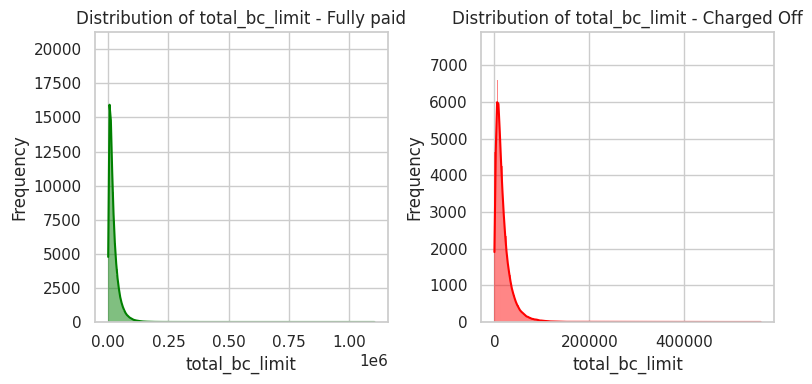

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['total_bc_limit'], kde=True, color='green')
plt.title('Distribution of total_bc_limit - Fully paid')
plt.xlabel('total_bc_limit')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['total_bc_limit'], kde=True, color='red')
plt.title('Distribution of total_bc_limit - Charged Off')
plt.xlabel('total_bc_limit')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

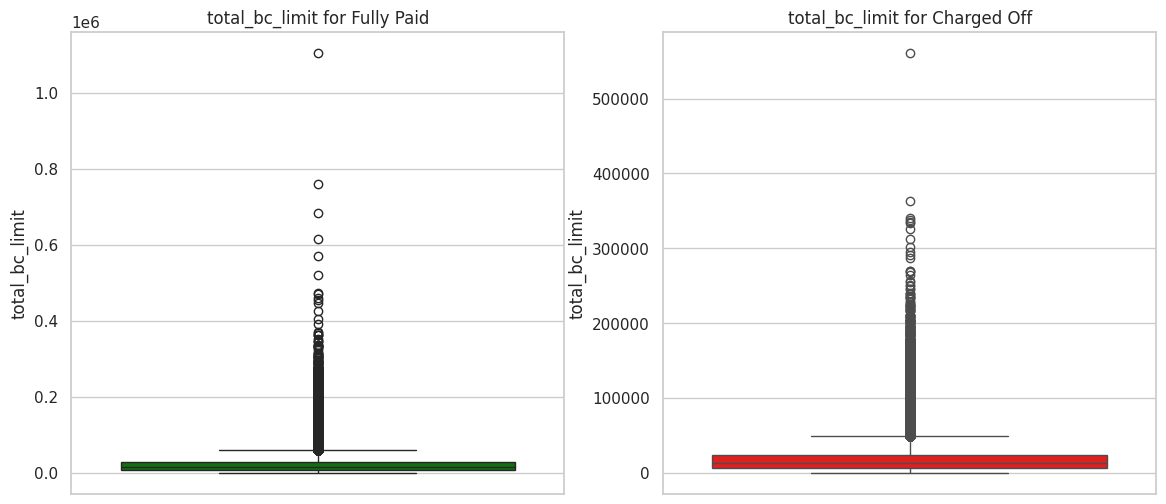

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['total_bc_limit'].dropna(), color='green')
plt.title('total_bc_limit for Fully Paid')
plt.ylabel('total_bc_limit')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['total_bc_limit'].dropna(), color='red')
plt.title('total_bc_limit for Charged Off')
plt.ylabel('total_bc_limit')

plt.show()  # Show all plots

The above plot shows that the column bc_open_to_buy is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [ ]:
total_bc_limit_lower_bound, total_bc_limit_upper_bound = outlier_thresholds(df, 'total_bc_limit')
df[(df['total_bc_limit']< total_bc_limit_lower_bound) | (df['total_bc_limit']> total_bc_limit_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     68683
Charged Off    10127
Name: count, dtype: int64

In [ ]:
len(df[(df['total_bc_limit']< total_bc_limit_lower_bound) | (df['total_bc_limit']> total_bc_limit_upper_bound)])

78810

In [ ]:
print('lower outlier value:', total_bc_limit_lower_bound)
print('upper outlier value:', total_bc_limit_upper_bound)

lower outlier value: -22650.0
upper outlier value: 58550.0


In [ ]:
print(len(df[df['total_bc_limit']>0]))
print(len(df[df['total_bc_limit']==0]))

1283755
14274


In [ ]:
df['total_bc_limit'].mode()

0    0.0
Name: total_bc_limit, dtype: float64

In [ ]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

In [ ]:
43770/len(df)

0.03253525209802945

In [ ]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['total_bc_limit'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

Percentile      Value  Difference
0          0.0        0.0         NaN
1          5.0     2300.0      2300.0
2         10.0     3900.0      1600.0
3         15.0     5200.0      1300.0
4         20.0     6500.0      1300.0
5         25.0     7800.0      1300.0
6         30.0     9000.0      1200.0
7         35.0    10400.0      1400.0
8         40.0    11800.0      1400.0
9         45.0    13400.0      1600.0
10        50.0    15100.0      1700.0
11        55.0    17000.0      1900.0
12        60.0    19100.0      2100.0
13        65.0    21600.0      2500.0
14        70.0    24600.0      3000.0
15        75.0    28100.0      3500.0
16        80.0    32600.0      4500.0
17        85.0    38500.0      5900.0
18        90.0    47200.0      8700.0
19        95.0    63100.0     15900.0
20        96.0    68400.0      5300.0
21        96.5    71700.0      3300.0
22        97.0    75500.0      3800.0
23        97.5    80100.0      4600.0
24        98.0    85800.0      5700.0
25        98.5    93200.0      7400.0
26        99.0   103700.0     10500.0
27        99.5   123000.0     19300.0
28       100.0  1105500.0    982500.0

**Column: total_il_high_credit_limit**

In [ ]:
len(df_fully_paid)

1076751

In [ ]:
len(df_charged_off)

268559

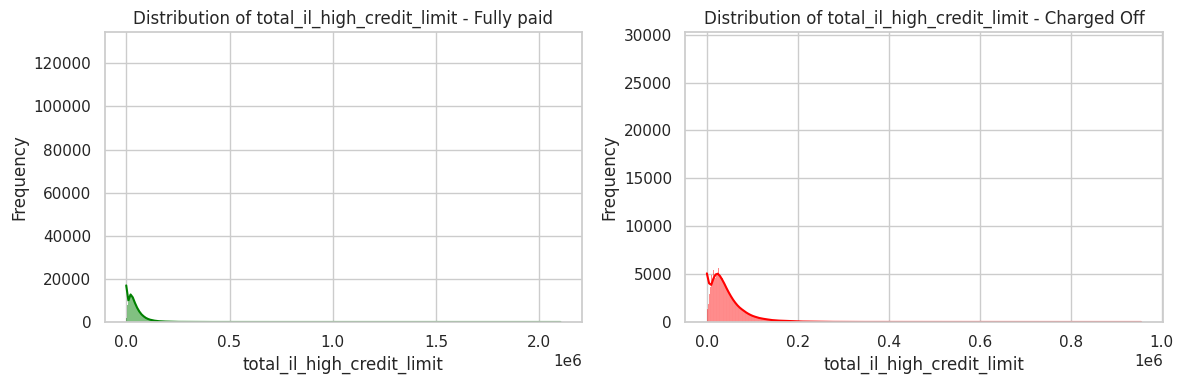

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['total_il_high_credit_limit'], kde=True, color='green')
plt.title('Distribution of total_il_high_credit_limit - Fully paid')
plt.xlabel('total_il_high_credit_limit')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['total_il_high_credit_limit'], kde=True, color='red')
plt.title('Distribution of total_il_high_credit_limit - Charged Off')
plt.xlabel('total_il_high_credit_limit')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

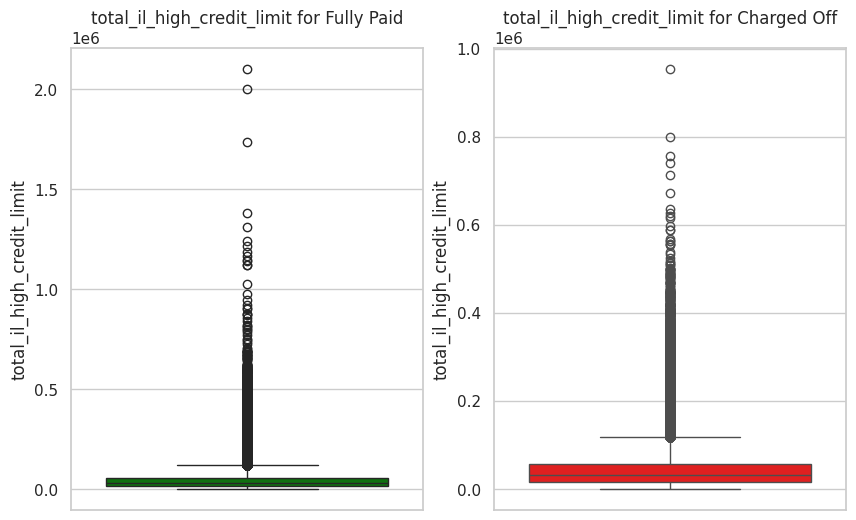

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['total_il_high_credit_limit'].dropna(), color='green')
plt.title('total_il_high_credit_limit for Fully Paid')
plt.ylabel('total_il_high_credit_limit')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['total_il_high_credit_limit'].dropna(), color='red')
plt.title('total_il_high_credit_limit for Charged Off')
plt.ylabel('total_il_high_credit_limit')

plt.show()  # Show all plots

The above plot shows that the column bc_open_to_buy is an outlier heavy distribution. Calculating the outlier numbers and distribution of outliers w.r.t charged off loans

In [ ]:
total_il_high_credit_limit_lower_bound, total_il_high_credit_limit_upper_bound = outlier_thresholds(df, 'total_il_high_credit_limit')
df[(df['total_il_high_credit_limit']< total_il_high_credit_limit_lower_bound) | (df['total_il_high_credit_limit']> total_il_high_credit_limit_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     52243
Charged Off    12541
Name: count, dtype: int64

In [ ]:
len(df[(df['total_il_high_credit_limit']< total_il_high_credit_limit_lower_bound) | (df['total_il_high_credit_limit']> total_il_high_credit_limit_upper_bound)])

64784

In [ ]:
print('lower outlier value:', total_il_high_credit_limit_lower_bound)
print('upper outlier value:', total_il_high_credit_limit_upper_bound)

lower outlier value: -48107.5
upper outlier value: 119480.5


In [ ]:
print(len(df[df['total_il_high_credit_limit']>0]))
print(len(df[df['total_il_high_credit_limit']==0]))

1121794
155989


In [ ]:
df['total_il_high_credit_limit'].mode()

0    0.0
Name: total_il_high_credit_limit, dtype: float64

In [ ]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

In [ ]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['total_il_high_credit_limit'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

Percentile       Value  Difference
0          0.0        0.00         NaN
1          5.0        0.00        0.00
2         10.0        0.00        0.00
3         15.0     6000.00     6000.00
4         20.0    10530.00     4530.00
5         25.0    14738.00     4208.00
6         30.0    18093.00     3355.00
7         35.0    21424.00     3331.00
8         40.0    24808.00     3384.00
9         45.0    28112.00     3304.00
10        50.0    31681.00     3569.00
11        55.0    35543.00     3862.00
12        60.0    39832.00     4289.00
13        65.0    44594.00     4762.00
14        70.0    50097.00     5503.00
15        75.0    56635.00     6538.00
16        80.0    64714.60     8079.60
17        85.0    75282.00    10567.40
18        90.0    90692.80    15410.80
19        95.0   120109.00    29416.20
20        96.0   130237.72    10128.72
21        96.5   136563.63     6325.91
22        97.0   144219.54     7655.91
23        97.5   153466.45     9246.91
24        98.0   165465.36    11998.91
25        98.5   181049.00    15583.64
26        99.0   203651.26    22602.26
27        99.5   245878.99    42227.73
28       100.0  2101913.00  1856034.01

**Column: emp_title**

In [ ]:
print('Top 20 job titles of customers where loans were charged off')
df_charged_off['emp_title'].value_counts().head(20)

Top 20 job titles of customers where loans were charged off


emp_title
Manager               4090
Teacher               3950
Owner                 2696
Driver                2116
Supervisor            1812
Sales                 1701
Registered Nurse      1673
RN                    1613
manager               1183
owner                 1182
General Manager       1135
Office Manager        1054
Project Manager       1034
driver                 999
President              812
teacher                768
Director               766
Truck Driver           730
Engineer               662
Operations Manager     639
Name: count, dtype: int64

In [ ]:
print('Top 20 job titles of customers where loans were fully paid')
df_fully_paid['emp_title'].value_counts().head(20)

Top 20 job titles of customers where loans were fully paid


emp_title
Teacher               17318
Manager               15380
Owner                  7606
Registered Nurse       7101
RN                     6909
Supervisor             6477
Sales                  5786
Driver                 5442
Project Manager        5347
Office Manager         4472
Director               4266
General Manager        4056
Engineer               3632
owner                  3403
President              3350
manager                3328
teacher                3326
Vice President         3079
Operations Manager     2818
Accountant             2750
Name: count, dtype: int64

**Column: emp_length**

In [ ]:
print('Employement lengths of customers where loans were charged off')
df_charged_off['emp_length'].value_counts()

Employement lengths of customers where loans were charged off


emp_length
10+ years    83057
2 years      24114
< 1 year     22182
3 years      21486
1 year       18198
5 years      16495
4 years      15900
6 years      12140
8 years      12100
7 years      11620
9 years      10137
Name: count, dtype: int64

In [ ]:
print('Employement lengths of customers where loans were fully paid')
100*df_fully_paid['emp_length'].value_counts().head(20)/len(df_fully_paid)

Employement lengths of customers where loans were fully paid


emp_length
10+ years    33.354230
2 years       9.066999
3 years       7.997299
< 1 year      7.975753
1 year        6.528529
5 years       6.283625
4 years       6.004731
6 years       4.698672
8 years       4.513671
7 years       4.458227
9 years       3.789177
Name: count, dtype: float64

**Column: title**

In [ ]:
print('% Title of customers where loans were charged off')
(100*df_charged_off['title'].value_counts()/len(df_charged_off)).head(20)

% Title of customers where loans were charged off


title
Debt consolidation           53.679452
Credit card refinancing      16.283573
Other                         5.352269
Home improvement              5.130716
Major purchase                1.793274
Business                      1.345701
Medical expenses              1.131967
Debt Consolidation            0.865732
Moving and relocation         0.726097
Car financing                 0.658328
Vacation                      0.579016
Home buying                   0.507896
debt consolidation            0.360815
Consolidation                 0.274800
Debt Consolidation Loan       0.210010
consolidation                 0.139634
Personal Loan                 0.110963
Home Improvement              0.091600
Credit Card Consolidation     0.087876
Consolidation Loan            0.086759
Name: count, dtype: float64

In [ ]:
print('% Title of customers where loans were fully paid')
(100*df_fully_paid['title'].value_counts()/len(df_fully_paid)).head(20)

% Title of customers where loans were fully paid


title
Debt consolidation           47.996148
Credit card refinancing      19.148252
Home improvement              5.692495
Other                         4.866863
Major purchase                1.785835
Debt Consolidation            1.241698
Medical expenses              0.978499
Car financing                 0.877826
Business                      0.755606
Vacation                      0.602832
Moving and relocation         0.556675
Consolidation                 0.428697
Home buying                   0.420896
debt consolidation            0.356907
Debt Consolidation Loan       0.298398
Credit Card Consolidation     0.196053
consolidation                 0.166055
Personal Loan                 0.166055
Consolidation Loan            0.142744
Home Improvement              0.140330
Name: count, dtype: float64

**Column: title**

In [ ]:
print('% zip_code of customers where loans were charged off')
(100*df_charged_off['zip_code'].value_counts()/len(df_charged_off)).head(20)

% zip_code of customers where loans were charged off


zip_code
112xx    1.150213
945xx    1.023239
331xx    0.997919
750xx    0.967013
891xx    0.934990
104xx    0.925681
330xx    0.854933
070xx    0.836688
770xx    0.803548
900xx    0.793494
606xx    0.776366
300xx    0.763333
917xx    0.748439
117xx    0.746205
100xx    0.696309
921xx    0.642689
852xx    0.613273
926xx    0.596889
925xx    0.596517
334xx    0.581995
Name: count, dtype: float64

In [ ]:
print('% zip_code of customers where loans were fully paid')
(100*df_fully_paid['zip_code'].value_counts()/len(df_fully_paid)).head(20)

% zip_code of customers where loans were fully paid


zip_code
945xx    1.138332
750xx    1.103041
112xx    0.997445
606xx    0.961039
300xx    0.935592
100xx    0.811330
331xx    0.802878
070xx    0.790341
900xx    0.783282
770xx    0.774645
891xx    0.753563
330xx    0.707592
917xx    0.706663
117xx    0.669050
852xx    0.648618
104xx    0.645089
921xx    0.611191
925xx    0.593823
926xx    0.589366
913xx    0.588715
Name: count, dtype: float64

**Column: last_pymnt_d**

In [ ]:
print('% last_pymnt_d of customers where loans were charged off')
(100*df_charged_off['last_pymnt_d'].value_counts()/len(df_charged_off)).head(20)

% last_pymnt_d of customers where loans were charged off


last_pymnt_d
Aug-2018    2.749861
Aug-2017    2.681347
Oct-2018    2.675017
Mar-2017    2.599801
Jul-2018    2.577087
Oct-2017    2.524585
Jun-2018    2.524585
Jan-2018    2.510435
Mar-2018    2.500754
Jun-2017    2.494796
Jul-2017    2.430751
Sep-2017    2.398356
Nov-2017    2.377876
Sep-2018    2.346226
May-2018    2.339151
Sep-2016    2.330587
May-2017    2.327608
Oct-2016    2.263562
Jan-2017    2.231167
Apr-2018    2.204730
Name: count, dtype: float64

In [ ]:
print('% last_pymnt_d of customers where loans were fully paid')
(100*df_fully_paid['last_pymnt_d'].value_counts()/len(df_fully_paid)).head(20)

% last_pymnt_d of customers where loans were fully paid


last_pymnt_d
Feb-2019    3.123006
Aug-2018    2.993264
Mar-2018    2.930390
Jan-2019    2.794889
Oct-2018    2.779566
Jul-2018    2.746503
Nov-2018    2.639515
Jun-2018    2.636450
May-2018    2.523703
Jan-2018    2.454049
Dec-2018    2.453213
Feb-2018    2.409471
Apr-2018    2.405849
Mar-2017    2.397304
Oct-2017    2.354583
Sep-2018    2.325514
Nov-2017    2.318828
Aug-2017    2.307962
Jul-2017    2.202552
Jun-2017    2.141349
Name: count, dtype: float64

**Column: last_credit_pull_d**

In [ ]:
print('% last_credit_pull_d of customers where loans were charged off')
(100*df_charged_off['last_credit_pull_d'].value_counts()/len(df_charged_off)).head(20)

% last_credit_pull_d of customers where loans were charged off


last_credit_pull_d
Mar-2019    24.473579
Oct-2016    14.444871
Feb-2017     6.369178
Jul-2018     5.846388
Aug-2018     4.712931
Feb-2019     3.982365
Oct-2018     3.306164
Oct-2017     2.879442
Jun-2017     2.309362
Jan-2019     2.151855
Dec-2018     1.959346
Nov-2018     1.947431
Jan-2018     1.800349
Feb-2018     1.783966
Nov-2017     1.776518
Jul-2017     1.713218
Sep-2018     1.683801
Apr-2018     1.677844
Dec-2017     1.614170
Mar-2018     1.606351
Name: count, dtype: float64

In [ ]:
print('% last_credit_pull_d of customers where loans were fully paid')
(100*df_fully_paid['last_credit_pull_d'].value_counts()/len(df_fully_paid)).head(20)

% last_credit_pull_d of customers where loans were fully paid


last_credit_pull_d
Mar-2019    37.622533
Feb-2019     5.958202
Jan-2019     5.158110
Dec-2018     3.605662
Jul-2018     3.514462
Oct-2018     3.483814
Nov-2018     3.468026
Aug-2018     2.824516
Sep-2018     2.613046
May-2018     1.938238
Apr-2018     1.807289
Mar-2018     1.788714
Jan-2018     1.544740
Feb-2018     1.509634
Nov-2017     1.271975
Oct-2017     1.261852
Dec-2017     1.150870
Aug-2017     1.136660
Sep-2017     1.131738
Oct-2016     1.101462
Name: count, dtype: float64

# **2.2 Analysing complete columns with no null values**

**Based on data in the 'statistics_columns_with_missing_values.xls' workbook and the data quality report, conducting univariate and bivariate analysis on each column to impute the missing values**

**column: loan_amnt**

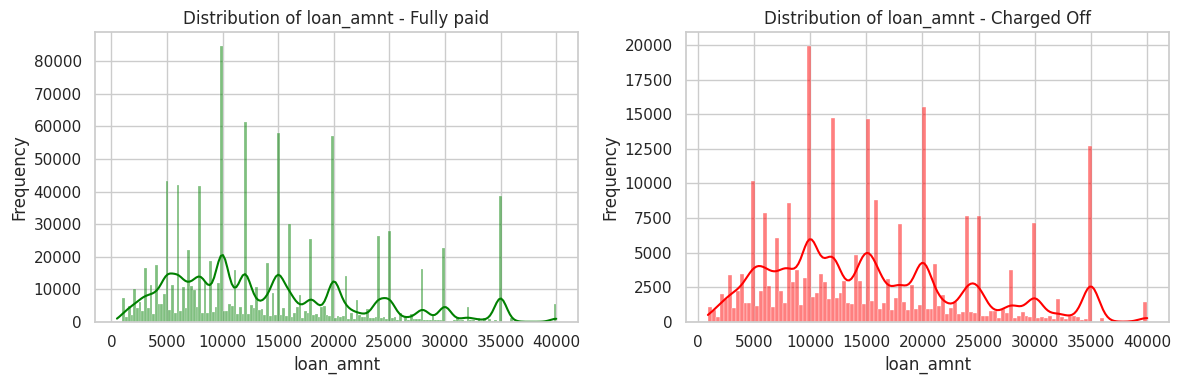

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['loan_amnt'], kde=True, color='green')
plt.title('Distribution of loan_amnt - Fully paid')
plt.xlabel('loan_amnt')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['loan_amnt'], kde=True, color='red')
plt.title('Distribution of loan_amnt - Charged Off')
plt.xlabel('loan_amnt')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

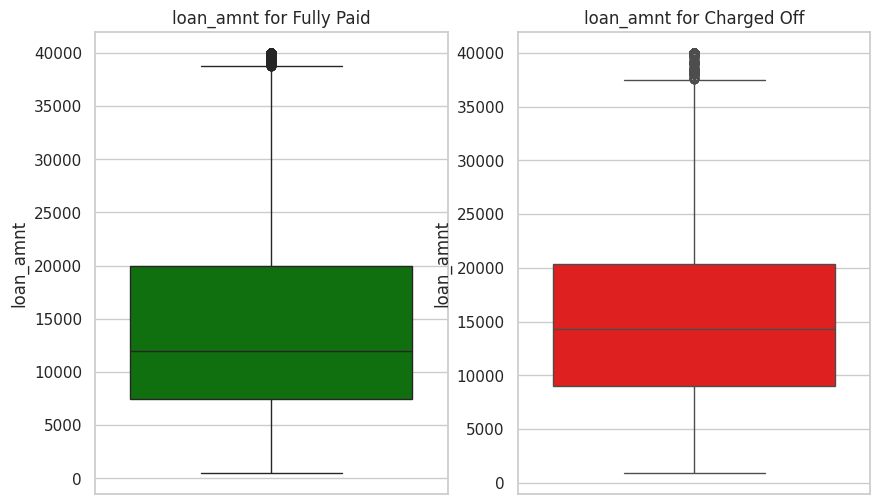

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['loan_amnt'].dropna(), color='green')
plt.title('loan_amnt for Fully Paid')
plt.ylabel('loan_amnt')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['loan_amnt'].dropna(), color='red')
plt.title('loan_amnt for Charged Off')
plt.ylabel('loan_amnt')

plt.show()  # Show all plots

In [ ]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['loan_amnt'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

Percentile    Value  Difference
0          0.0    500.0         NaN
1          5.0   3200.0      2700.0
2         10.0   5000.0      1800.0
3         15.0   5650.0       650.0
4         20.0   6500.0       850.0
5         25.0   8000.0      1500.0
6         30.0   8700.0       700.0
7         35.0  10000.0      1300.0
8         40.0  10000.0         0.0
9         45.0  11575.0      1575.0
10        50.0  12000.0       425.0
11        55.0  14000.0      2000.0
12        60.0  15000.0      1000.0
13        65.0  16000.0      1000.0
14        70.0  18000.0      2000.0
15        75.0  20000.0      2000.0
16        80.0  21000.0      1000.0
17        85.0  24000.0      3000.0
18        90.0  28000.0      4000.0
19        95.0  32875.0      4875.0
20        96.0  35000.0      2125.0
21        96.5  35000.0         0.0
22        97.0  35000.0         0.0
23        97.5  35000.0         0.0
24        98.0  35000.0         0.0
25        98.5  35000.0         0.0
26        99.0  35000.0         0.0
27        99.5  40000.0      5000.0
28       100.0  40000.0         0.0

**column: funded_amnt**

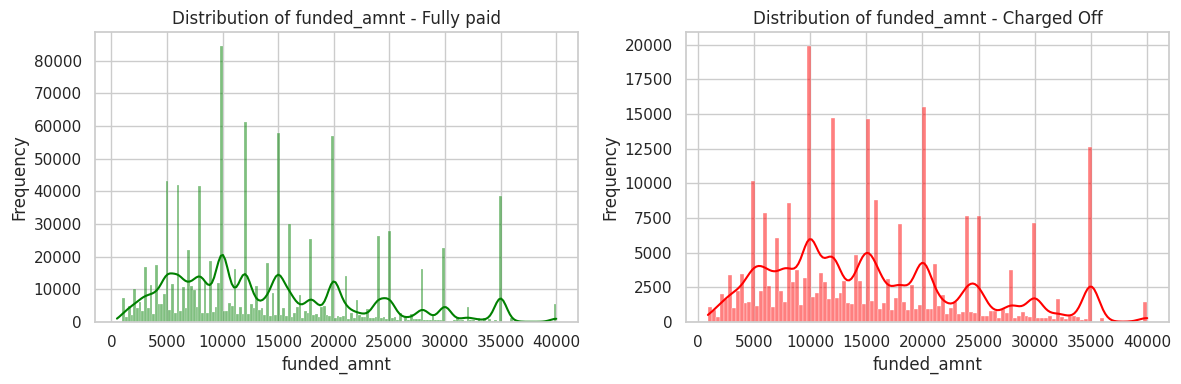

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['funded_amnt'], kde=True, color='green')
plt.title('Distribution of funded_amnt - Fully paid')
plt.xlabel('funded_amnt')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['funded_amnt'], kde=True, color='red')
plt.title('Distribution of funded_amnt - Charged Off')
plt.xlabel('funded_amnt')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

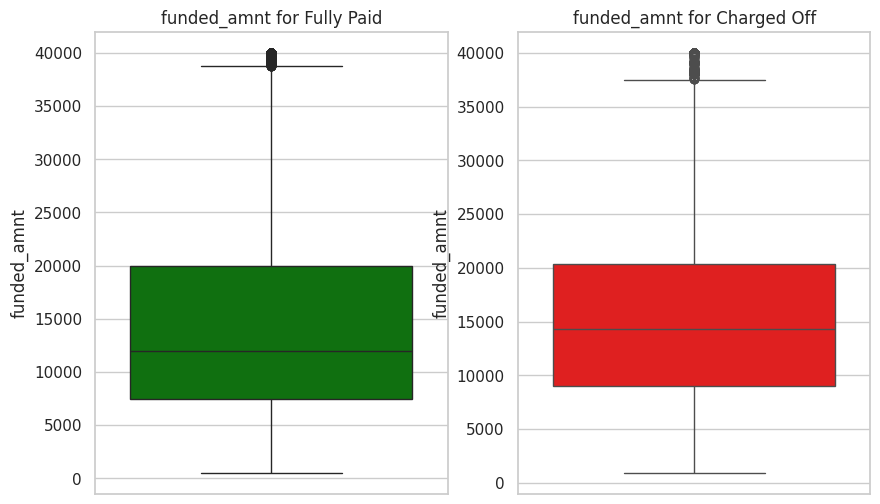

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['funded_amnt'].dropna(), color='green')
plt.title('funded_amnt for Fully Paid')
plt.ylabel('funded_amnt')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['funded_amnt'].dropna(), color='red')
plt.title('funded_amnt for Charged Off')
plt.ylabel('funded_amnt')

plt.show()  # Show all plots

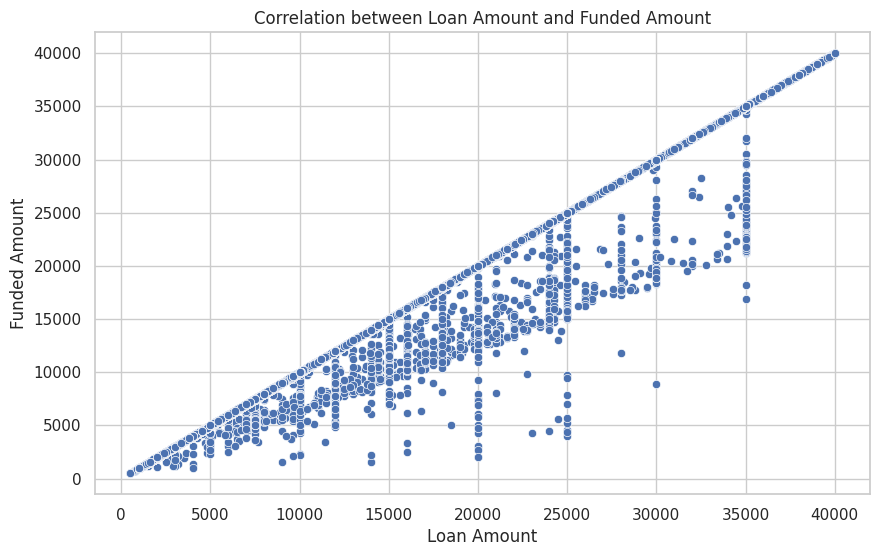

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='funded_amnt', data=df)

# Adding plot labels and title
plt.title('Correlation between Loan Amount and Funded Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Funded Amount')

plt.show()

**column: funded_amnt_inv**

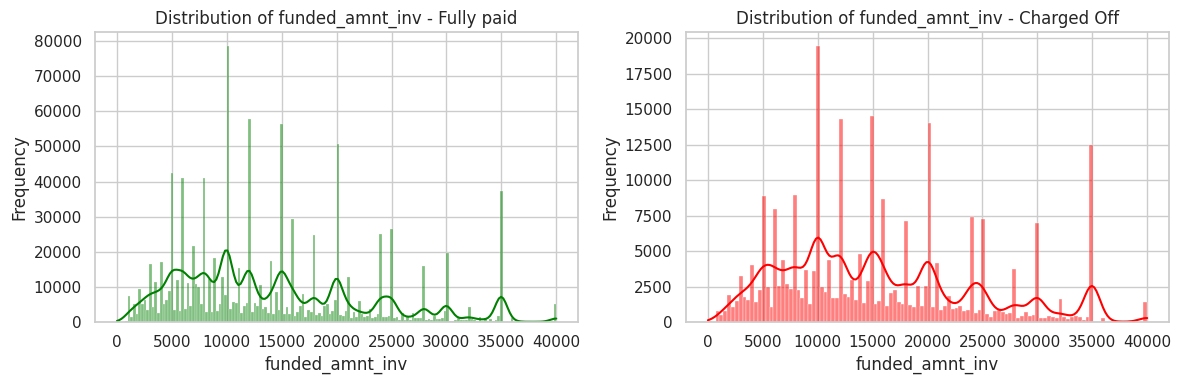

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['funded_amnt_inv'], kde=True, color='green')
plt.title('Distribution of funded_amnt_inv - Fully paid')
plt.xlabel('funded_amnt_inv')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['funded_amnt_inv'], kde=True, color='red')
plt.title('Distribution of funded_amnt_inv - Charged Off')
plt.xlabel('funded_amnt_inv')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

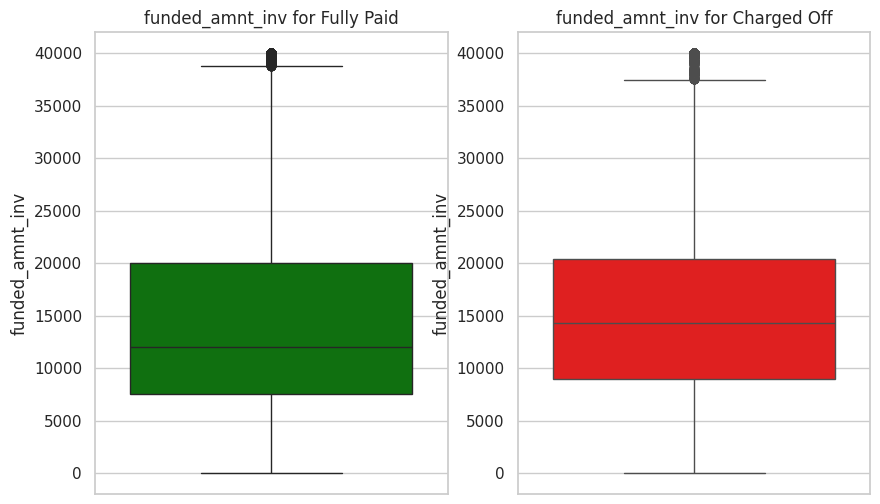

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['funded_amnt_inv'].dropna(), color='green')
plt.title('funded_amnt_inv for Fully Paid')
plt.ylabel('funded_amnt_inv')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['funded_amnt_inv'].dropna(), color='red')
plt.title('funded_amnt_inv for Charged Off')
plt.ylabel('funded_amnt_inv')

plt.show()  # Show all plots

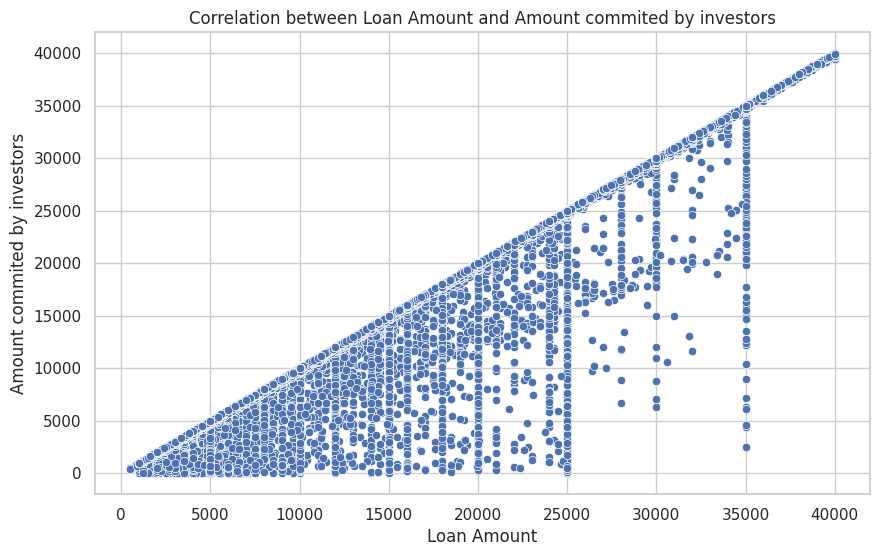

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='funded_amnt_inv', data=df)

# Adding plot labels and title
plt.title('Correlation between Loan Amount and Amount commited by investors')
plt.xlabel('Loan Amount')
plt.ylabel('Amount commited by investors')

plt.show()

In [ ]:
# Create the diff_flag column
df['diff_flag'] = np.where(df['loan_amnt'] > df['funded_amnt_inv'], 'Y', 'N')
print('Distribution of diff_flag where loan_status is Fully Paid', df[df['loan_status']=='Fully Paid']['diff_flag'].value_counts())
print('Distribution of diff_flag where loan_status is Charged Off', df[df['loan_status']=='Charged Off']['diff_flag'].value_counts())

Distribution of diff_flag where loan_status is Fully Paid diff_flag
N    986128
Y     90623
Name: count, dtype: int64
Distribution of diff_flag where loan_status is Charged Off diff_flag
N    244566
Y     23993
Name: count, dtype: int64


The diff_flag ratio of N:Y for both Fully paid and Charged Off loan_status is 10:1. So, there;s no significant trend of diff_flag wrt loan_status. Hence, we can drop the column created

In [ ]:
df.drop('diff_flag', axis=1, inplace=True)

**column: term**

In [ ]:
df['term'].value_counts()

term
 36 months    1020743
 60 months     324567
Name: count, dtype: int64

In [ ]:
print('Distribution of loan_status w.r.t loan term')
df[['term', 'loan_status']].value_counts()

Distribution of loan_status w.r.t loan term


term        loan_status
 36 months  Fully Paid     857491
 60 months  Fully Paid     219260
 36 months  Charged Off    163252
 60 months  Charged Off    105307
Name: count, dtype: int64

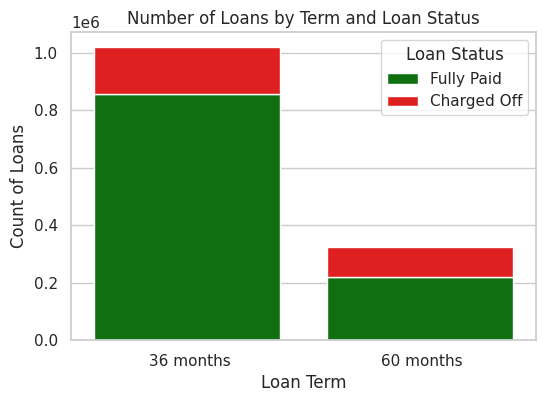

In [ ]:
#Visualizing the above grid

# Creating a cross-tabulation of the count of statuses across loan terms
ctab = pd.crosstab(df['term'], df['loan_status'])

# Resetting index to use 'term' as a column for plotting
ctab.reset_index(inplace=True)

# Creating the bar plot
plt.figure(figsize=(6, 4))
bar_width = 0.20  # Narrower bar width
sns.barplot(x='term', y='Fully Paid', data=ctab, color='green', label='Fully Paid')
sns.barplot(x='term', y='Charged Off', data=ctab, color='red', label='Charged Off', bottom=ctab['Fully Paid'])

# Adding labels and title
plt.title('Number of Loans by Term and Loan Status')
plt.xlabel('Loan Term')
plt.ylabel('Count of Loans')
plt.legend(title='Loan Status')

plt.show()

**column: int_rate**

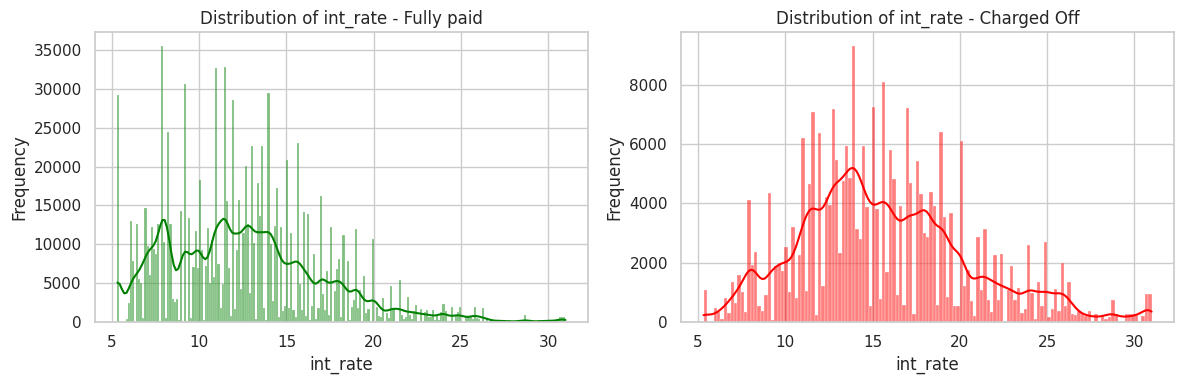

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['int_rate'], kde=True, color='green')
plt.title('Distribution of int_rate - Fully paid')
plt.xlabel('int_rate')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['int_rate'], kde=True, color='red')
plt.title('Distribution of int_rate - Charged Off')
plt.xlabel('int_rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

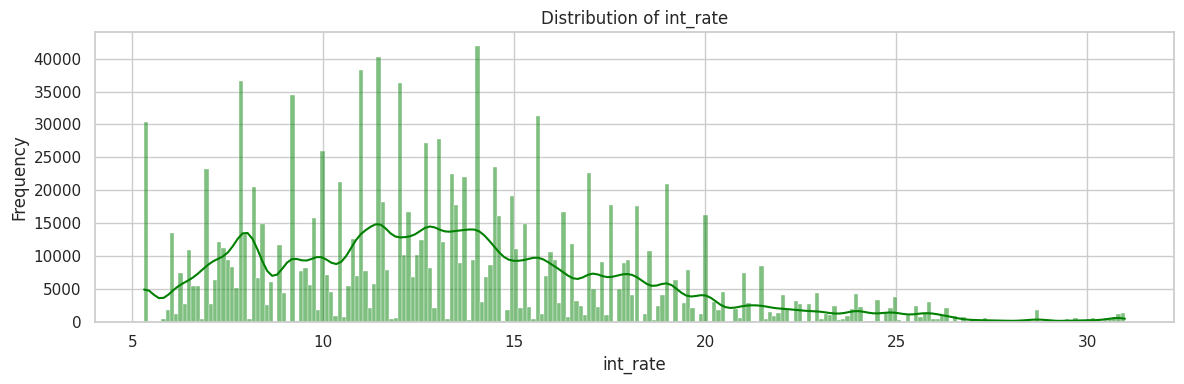

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

sns.histplot(df['int_rate'], kde=True, color='green')
plt.title('Distribution of int_rate')
plt.xlabel('int_rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

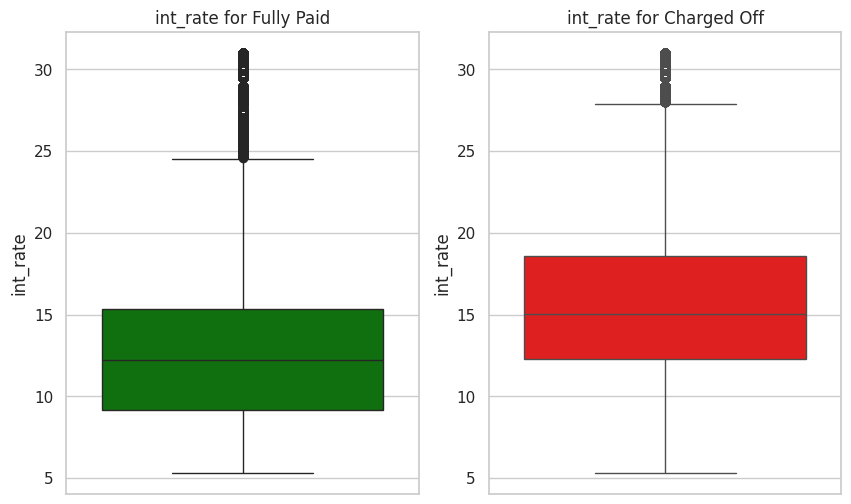

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['int_rate'].dropna(), color='green')
plt.title('int_rate for Fully Paid')
plt.ylabel('int_rate')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['int_rate'].dropna(), color='red')
plt.title('int_rate for Charged Off')
plt.ylabel('int_rate')

plt.show()  # Show all plots

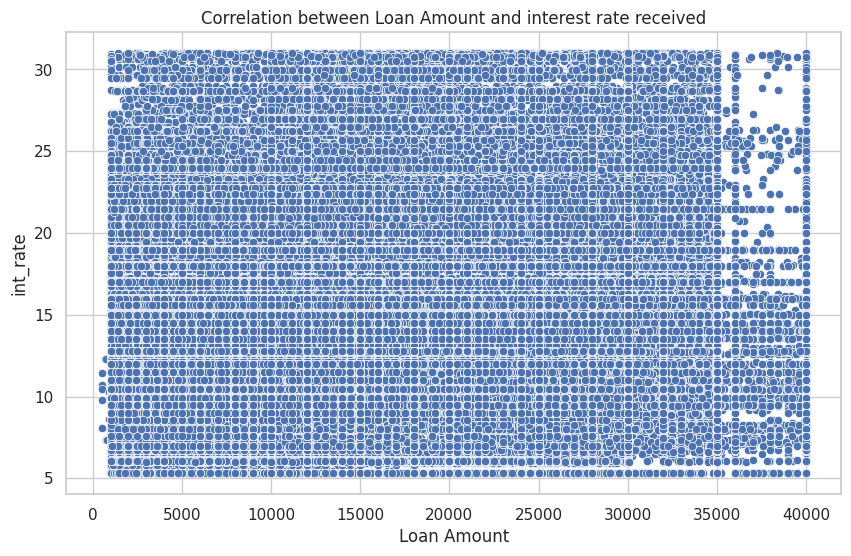

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='int_rate', data=df)

# Adding plot labels and title
plt.title('Correlation between Loan Amount and interest rate received')
plt.xlabel('Loan Amount')
plt.ylabel('int_rate')

plt.show()

In [ ]:
df[df['int_rate']>=25]['purpose'].value_counts()

purpose
debt_consolidation    16897
other                  2526
credit_card            2369
home_improvement       1651
small_business          824
major_purchase          620
house                   478
medical                 337
moving                  294
car                     184
vacation                110
renewable_energy         29
wedding                  12
Name: count, dtype: int64

In [ ]:
100* df[df['int_rate']<=5]['loan_status'].value_counts()/ len(df[df['int_rate']<=5])

Series([], Name: count, dtype: float64)

In [ ]:
print(100* df[(df['int_rate']>5) & (df['int_rate']<=10)]['loan_status'].value_counts()/ len(df[(df['int_rate']>5) & (df['int_rate']<=10)]))
print(df[(df['int_rate']>5) & (df['int_rate']<=10)]['loan_status'].value_counts())

loan_status
Fully Paid     91.836403
Charged Off     8.163597
Name: count, dtype: float64
loan_status
Fully Paid     344876
Charged Off     30657
Name: count, dtype: int64


In [ ]:
print(100* df[(df['int_rate']>10) & (df['int_rate']<=15)]['loan_status'].value_counts()/ len(df[(df['int_rate']>10) & (df['int_rate']<=15)]))
print(df[(df['int_rate']>10) & (df['int_rate']<=15)]['loan_status'].value_counts())

loan_status
Fully Paid     81.412771
Charged Off    18.587229
Name: count, dtype: float64
loan_status
Fully Paid     450995
Charged Off    102966
Name: count, dtype: int64


In [ ]:
print(100* df[(df['int_rate']>15) & (df['int_rate']<=20)]['loan_status'].value_counts()/ len(df[(df['int_rate']>15) & (df['int_rate']<=20)]))
print(print(df[(df['int_rate']>15) & (df['int_rate']<=20)]['loan_status'].value_counts()))

loan_status
Fully Paid     70.443678
Charged Off    29.556322
Name: count, dtype: float64
loan_status
Fully Paid     217454
Charged Off     91238
Name: count, dtype: int64
None


In [ ]:
print(100* df[(df['int_rate']>20) & (df['int_rate']<=25)]['loan_status'].value_counts()/ len(df[(df['int_rate']>20) & (df['int_rate']<=25)]))
print(print(df[(df['int_rate']>20) & (df['int_rate']<=25)]['loan_status'].value_counts()))

loan_status
Fully Paid     61.492951
Charged Off    38.507049
Name: count, dtype: float64
loan_status
Fully Paid     49682
Charged Off    31111
Name: count, dtype: int64
None


In [ ]:
print(100* df[df['int_rate']>=25]['loan_status'].value_counts()/ len(100* df[df['int_rate']>=25]))
print(print(df[df['int_rate']>25]['loan_status'].value_counts()))

loan_status
Fully Paid     52.19703
Charged Off    47.80297
Name: count, dtype: float64
loan_status
Fully Paid     13744
Charged Off    12587
Name: count, dtype: int64
None


**column: installment**

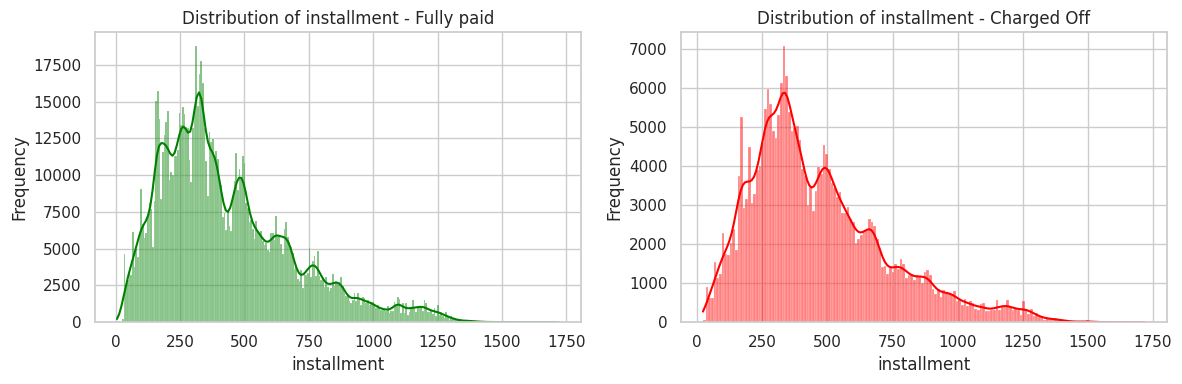

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['installment'], kde=True, color='green')
plt.title('Distribution of installment - Fully paid')
plt.xlabel('installment')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['installment'], kde=True, color='red')
plt.title('Distribution of installment - Charged Off')
plt.xlabel('installment')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

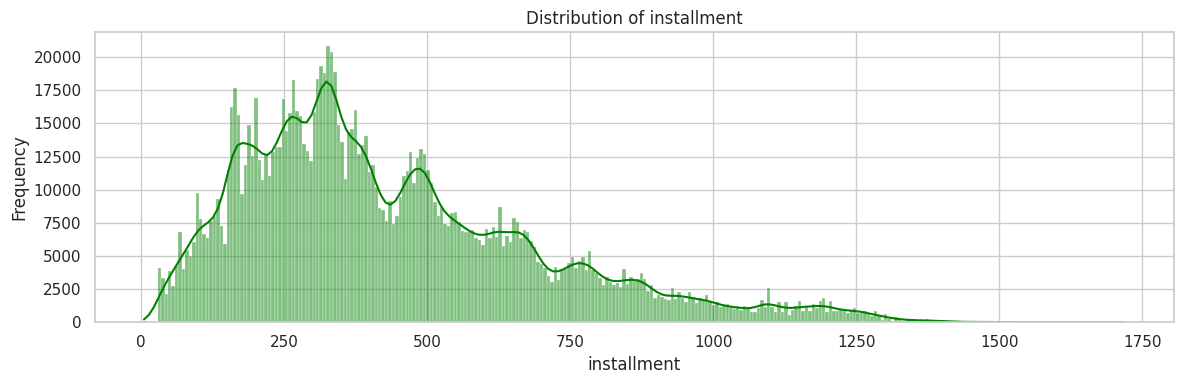

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

sns.histplot(df['installment'], kde=True, color='green')
plt.title('Distribution of installment')
plt.xlabel('installment')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

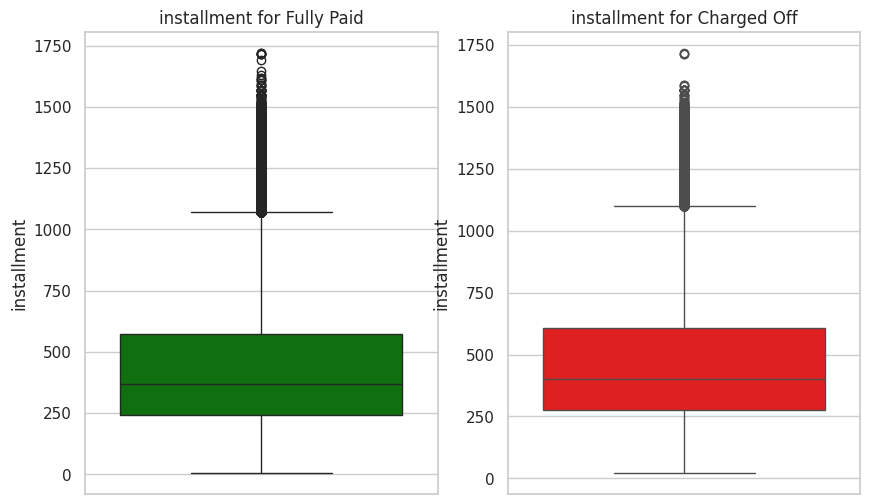

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['installment'].dropna(), color='green')
plt.title('installment for Fully Paid')
plt.ylabel('installment')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['installment'].dropna(), color='red')
plt.title('installment for Charged Off')
plt.ylabel('installment')

plt.show()  # Show all plots

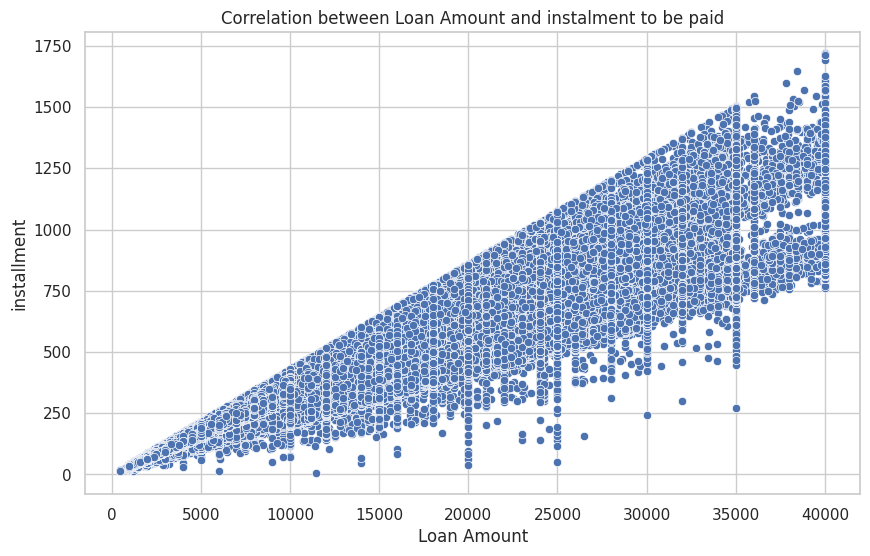

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='installment', data=df)

# Adding plot labels and title
plt.title('Correlation between Loan Amount and instalment to be paid')
plt.xlabel('Loan Amount')
plt.ylabel('installment')

plt.show()

In [ ]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['installment'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

Percentile       Value  Difference
0          0.0     4.93000         NaN
1          5.0   108.73000   103.80000
2         10.0   157.59000    48.86000
3         15.0   186.61000    29.02000
4         20.0   216.83000    30.22000
5         25.0   248.48000    31.65000
6         30.0   273.30000    24.82000
7         35.0   301.68000    28.38000
8         40.0   324.61000    22.93000
9         45.0   344.95000    20.34000
10        50.0   375.43000    30.48000
11        55.0   405.66000    30.23000
12        60.0   451.73000    46.07000
13        65.0   487.49000    35.76000
14        70.0   526.76000    39.27000
15        75.0   580.73000    53.97000
16        80.0   640.65000    59.92000
17        85.0   707.70000    67.05000
18        90.0   807.92000   100.22000
19        95.0   963.66000   155.74000
20        96.0  1012.39000    48.73000
21        96.5  1048.06185    35.67185
22        97.0  1085.78000    37.71815
23        97.5  1115.60000    29.82000
24        98.0  1153.67000    38.07000
25        98.5  1185.37095    31.70095
26        99.0  1221.50000    36.12905
27        99.5  1266.39000    44.89000
28       100.0  1719.83000   453.44000

**column: grade**

In [ ]:
df['grade'].value_counts()

grade
B    392741
C    381686
A    235090
D    200953
E     93650
F     32058
G      9132
Name: count, dtype: int64

In [ ]:
print('Distribution of loan_status w.r.t grade')
value_counts=df[['grade', 'loan_status']].value_counts().reset_index(name='count')
sorted_value_counts=value_counts.sort_values(by=['grade', 'loan_status'])
print(sorted_value_counts)

Distribution of loan_status w.r.t grade
   grade  loan_status   count
11     A  Charged Off   14201
2      A   Fully Paid  220889
7      B  Charged Off   52569
0      B   Fully Paid  340172
4      C  Charged Off   85649
1      C   Fully Paid  296037
5      D  Charged Off   61054
3      D   Fully Paid  139899
8      E  Charged Off   36035
6      E   Fully Paid   57615
10     F  Charged Off   14491
9      F   Fully Paid   17567
13     G  Charged Off    4560
12     G   Fully Paid    4572


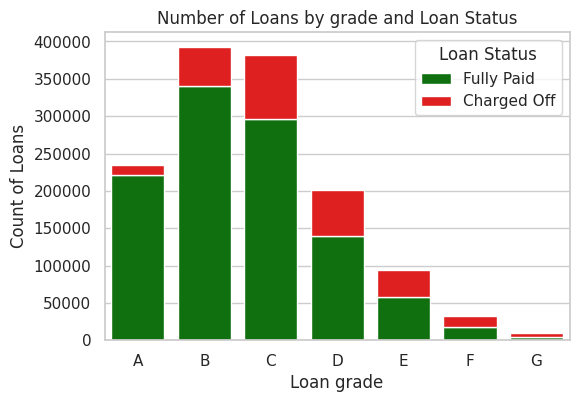

In [ ]:
#Visualizing the above grid

# Creating a cross-tabulation of the count of statuses across loan terms
ctab = pd.crosstab(df['grade'], df['loan_status'])

# Resetting index to use 'term' as a column for plotting
ctab.reset_index(inplace=True)

# Creating the bar plot
plt.figure(figsize=(6, 4))
bar_width = 0.20  # Narrower bar width
sns.barplot(x='grade', y='Fully Paid', data=ctab, color='green', label='Fully Paid')
sns.barplot(x='grade', y='Charged Off', data=ctab, color='red', label='Charged Off', bottom=ctab['Fully Paid'])

# Adding labels and title
plt.title('Number of Loans by grade and Loan Status')
plt.xlabel('Loan grade')
plt.ylabel('Count of Loans')
plt.legend(title='Loan Status')

plt.show()

Seems like a lot of F, G and E grade loans are not getting paid off

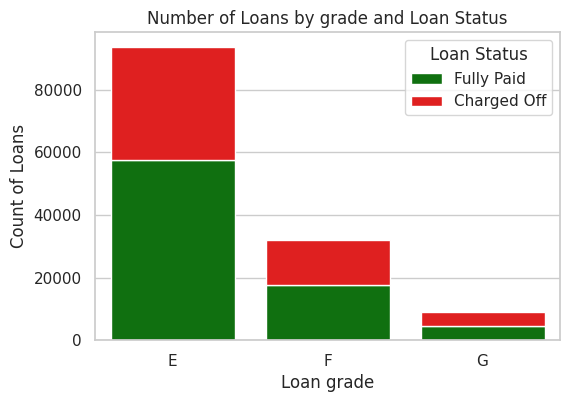

In [ ]:
df_major_grade = df[(df.grade == 'F') | (df.grade == 'G') | (df.grade == 'E')]

ctab = pd.crosstab(df_major_grade['grade'], df_major_grade['loan_status'])

# Resetting index to use 'term' as a column for plotting
ctab.reset_index(inplace=True)

# Creating the bar plot
plt.figure(figsize=(6, 4))
bar_width = 0.20  # Narrower bar width
sns.barplot(x='grade', y='Fully Paid', data=ctab, color='green', label='Fully Paid')
sns.barplot(x='grade', y='Charged Off', data=ctab, color='red', label='Charged Off', bottom=ctab['Fully Paid'])

# Adding labels and title
plt.title('Number of Loans by grade and Loan Status')
plt.xlabel('Loan grade')
plt.ylabel('Count of Loans')
plt.legend(title='Loan Status')

plt.show()

**column: sub_grade**

In [ ]:
df['sub_grade'].value_counts()

sub_grade
C1    85494
B4    83199
B5    82538
B3    81827
C2    79213
C3    74998
C4    74421
B2    74024
B1    71153
C5    67560
A5    64003
A4    52235
D1    51321
D2    44848
A1    43678
D3    39317
A3    37996
A2    37178
D4    35566
D5    29901
E1    23749
E2    21377
E3    18387
E4    15720
E5    14417
F1     9970
F2     7198
F3     6088
F4     4859
F5     3943
G1     2997
G2     2131
G3     1614
G4     1280
G5     1110
Name: count, dtype: int64

In [ ]:
print('Distribution of loan_status w.r.t sub_grade')
value_counts=df[['sub_grade', 'loan_status']].value_counts().reset_index(name='count')
sorted_value_counts=value_counts.sort_values(by=['sub_grade', 'loan_status'])
print(sorted_value_counts)

Distribution of loan_status w.r.t sub_grade
   sub_grade  loan_status  count
61        A1  Charged Off   1408
12        A1   Fully Paid  42270
58        A2  Charged Off   1734
15        A2   Fully Paid  35444
55        A3  Charged Off   2093
14        A3   Fully Paid  35903
49        A4  Charged Off   3587
11        A4   Fully Paid  48648
46        A5  Charged Off   5379
7         A5   Fully Paid  58624
41        B1  Charged Off   7415
5         B1   Fully Paid  63738
38        B2  Charged Off   8409
4         B2   Fully Paid  65615
34        B3  Charged Off  10624
0         B3   Fully Paid  71203
30        B4  Charged Off  12336
1         B4   Fully Paid  70863
27        B5  Charged Off  13785
3         B5   Fully Paid  68753
24        C1  Charged Off  16230
2         C1   Fully Paid  69264
23        C2  Charged Off  16412
6         C2   Fully Paid  62801
22        C3  Charged Off  16892
8         C3   Fully Paid  58106
20        C4  Charged Off  18546
9         C4   Fully Paid  55875

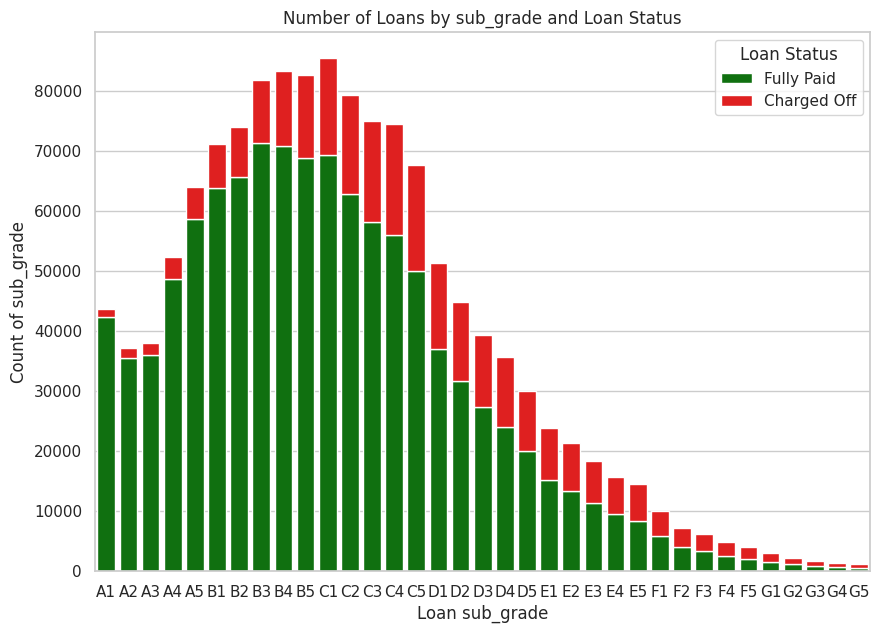

In [ ]:
#Visualizing the above grid

# Creating a cross-tabulation of the count of statuses across loan terms
ctab = pd.crosstab(df['sub_grade'], df['loan_status'])

# Resetting index to use 'term' as a column for plotting
ctab.reset_index(inplace=True)

# Creating the bar plot
plt.figure(figsize=(10, 7))
bar_width = 0.20  # Narrower bar width
sns.barplot(x='sub_grade', y='Fully Paid', data=ctab, color='green', label='Fully Paid')
sns.barplot(x='sub_grade', y='Charged Off', data=ctab, color='red', label='Charged Off', bottom=ctab['Fully Paid'])

# Adding labels and title
plt.title('Number of Loans by sub_grade and Loan Status')
plt.xlabel('Loan sub_grade')
plt.ylabel('Count of sub_grade')
plt.legend(title='Loan Status')

plt.show()

**column: home_ownership**

In [ ]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    665579
RENT        534421
OWN         144832
ANY            286
OTHER          144
NONE            48
Name: count, dtype: int64

In [ ]:
print('Distribution of loan_status w.r.t home_ownership')
value_counts=df[['home_ownership', 'loan_status']].value_counts().reset_index(name='count')
sorted_value_counts=value_counts.sort_values(by=['home_ownership', 'loan_status'])
print(sorted_value_counts)

Distribution of loan_status w.r.t home_ownership
   home_ownership  loan_status   count
8             ANY  Charged Off      56
6             ANY   Fully Paid     230
4        MORTGAGE  Charged Off  114531
0        MORTGAGE   Fully Paid  551048
11           NONE  Charged Off       7
9            NONE   Fully Paid      41
10          OTHER  Charged Off      27
7           OTHER   Fully Paid     117
5             OWN  Charged Off   29864
3             OWN   Fully Paid  114968
2            RENT  Charged Off  124074
1            RENT   Fully Paid  410347


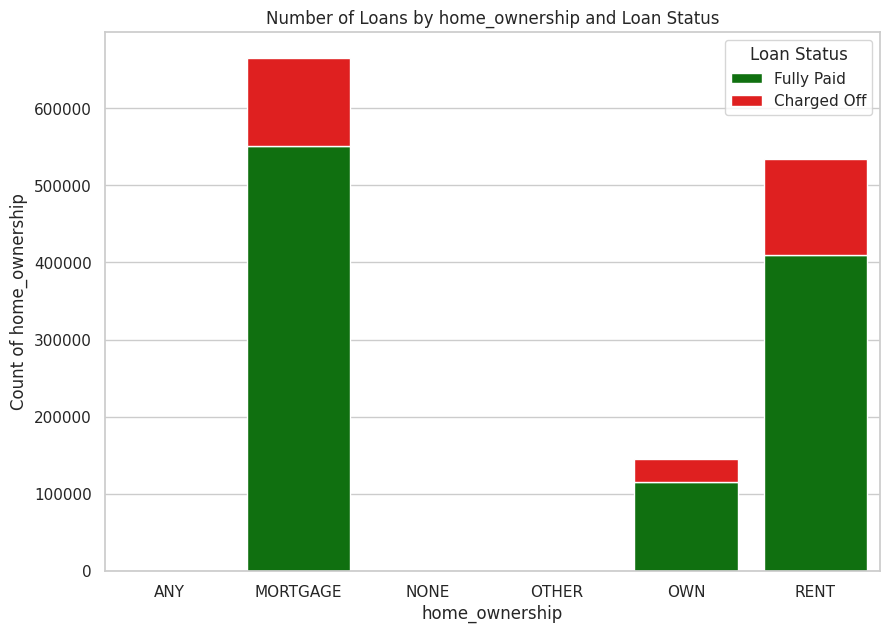

In [ ]:
#Visualizing the above grid

# Creating a cross-tabulation of the count of loan statuses across home_ownership
ctab = pd.crosstab(df['home_ownership'], df['loan_status'])

# Resetting index to use 'home_ownership' as a column for plotting
ctab.reset_index(inplace=True)

# Creating the bar plot
plt.figure(figsize=(10, 7))
bar_width = 0.20  # Narrower bar width
sns.barplot(x='home_ownership', y='Fully Paid', data=ctab, color='green', label='Fully Paid')
sns.barplot(x='home_ownership', y='Charged Off', data=ctab, color='red', label='Charged Off', bottom=ctab['Fully Paid'])

# Adding labels and title
plt.title('Number of Loans by home_ownership and Loan Status')
plt.xlabel('home_ownership')
plt.ylabel('Count of home_ownership')
plt.legend(title='Loan Status')

plt.show()

**column: annual_inc**

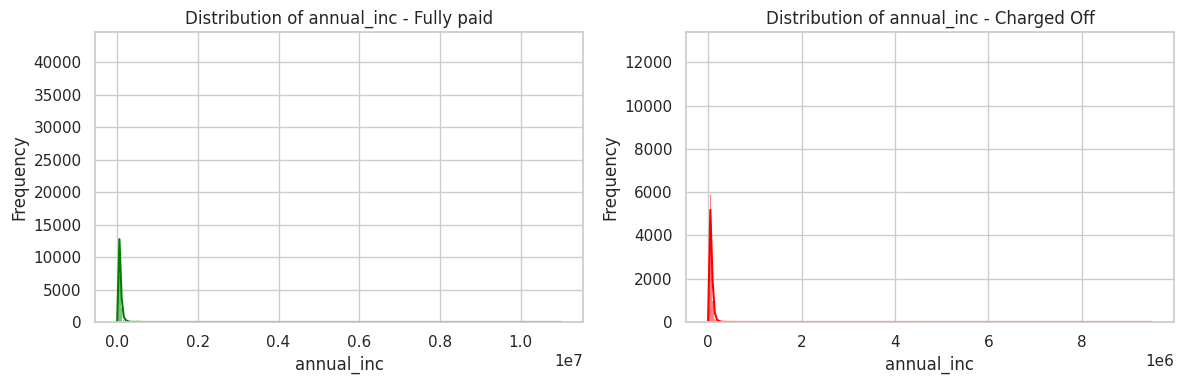

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['annual_inc'], kde=True, color='green')
plt.title('Distribution of annual_inc - Fully paid')
plt.xlabel('annual_inc')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['annual_inc'], kde=True, color='red')
plt.title('Distribution of annual_inc - Charged Off')
plt.xlabel('annual_inc')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

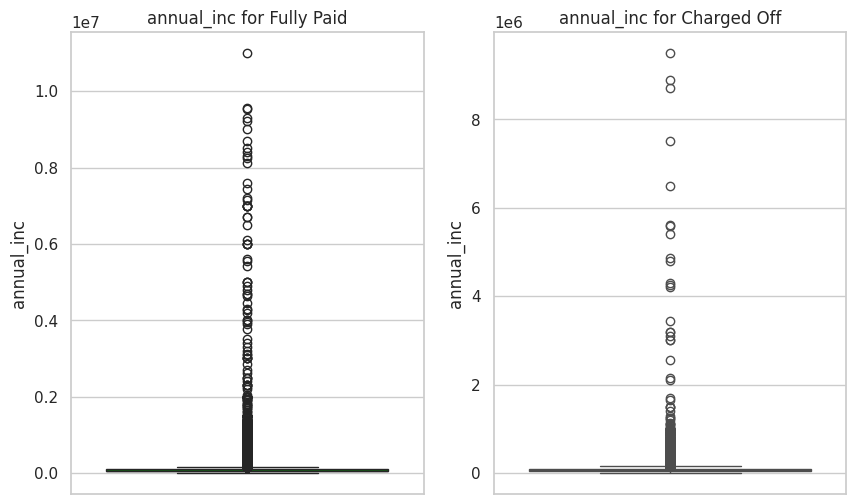

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['annual_inc'].dropna(), color='green')
plt.title('annual_inc for Fully Paid')
plt.ylabel('annual_inc')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['annual_inc'].dropna(), color='red')
plt.title('annual_inc for Charged Off')
plt.ylabel('annual_inc')

plt.show()  # Show all plots

In [ ]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['annual_inc'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

Percentile        Value   Difference
0          0.0         0.00          NaN
1          5.0     28000.00     28000.00
2         10.0     34000.00      6000.00
3         15.0     38943.70      4943.70
4         20.0     42000.00      3056.30
5         25.0     45780.00      3780.00
6         30.0     50000.00      4220.00
7         35.0     53000.00      3000.00
8         40.0     57000.00      4000.00
9         45.0     60000.00      3000.00
10        50.0     65000.00      5000.00
11        55.0     70000.00      5000.00
12        60.0     74000.00      4000.00
13        65.0     80000.00      6000.00
14        70.0     85000.00      5000.00
15        75.0     90000.00      5000.00
16        80.0    100000.00     10000.00
17        85.0    110000.00     10000.00
18        90.0    125000.00     15000.00
19        95.0    155000.00     30000.00
20        96.0    168000.00     13000.00
21        96.5    175000.00      7000.00
22        97.0    182208.76      7208.76
23        97.5    198000.00     15791.24
24        98.0    205000.00      7000.00
25        98.5    227500.00     22500.00
26        99.0    250000.00     22500.00
27        99.5    325000.00     75000.00
28       100.0  10999200.00  10674200.00

In [ ]:
annual_inc_lower_bound, annual_inc_upper_bound = outlier_thresholds(df, 'annual_inc')
df[(df['annual_inc']< annual_inc_lower_bound) | (df['annual_inc']> annual_inc_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     56276
Charged Off     9594
Name: count, dtype: int64

In [ ]:
len(df[(df['annual_inc']< annual_inc_lower_bound) | (df['annual_inc']> annual_inc_upper_bound)])

65870

In [ ]:
print('lower outlier value:', annual_inc_lower_bound)
print('upper outlier value:', annual_inc_upper_bound)

lower outlier value: -20550.0
upper outlier value: 156330.0


In [ ]:
print(len(df[df['annual_inc']>0]))
print(len(df[df['annual_inc']==0]))

1344949
361


**column: verification_status**

In [ ]:
df['verification_status'].value_counts()

verification_status
Source Verified    521273
Verified           418336
Not Verified       405701
Name: count, dtype: int64

In [ ]:
print('Distribution of loan_status w.r.t verification_status')
value_counts=df[['verification_status', 'loan_status']].value_counts().reset_index(name='count')
sorted_value_counts=value_counts.sort_values(by=['verification_status', 'loan_status'])
print(sorted_value_counts)

Distribution of loan_status w.r.t verification_status
  verification_status  loan_status   count
5        Not Verified  Charged Off   59535
1        Not Verified   Fully Paid  346166
3     Source Verified  Charged Off  109232
0     Source Verified   Fully Paid  412041
4            Verified  Charged Off   99792
2            Verified   Fully Paid  318544


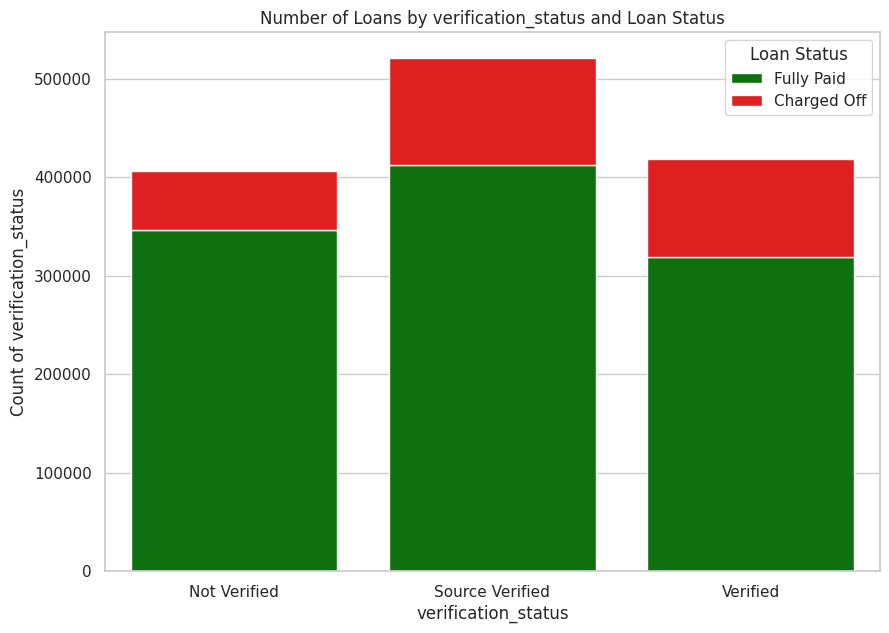

In [ ]:
#Visualizing the above grid

# Creating a cross-tabulation of the count of loan statuses across verification_status
ctab = pd.crosstab(df['verification_status'], df['loan_status'])

# Resetting index to use 'verification_status' as a column for plotting
ctab.reset_index(inplace=True)

# Creating the bar plot
plt.figure(figsize=(10, 7))
bar_width = 0.20  # Narrower bar width
sns.barplot(x='verification_status', y='Fully Paid', data=ctab, color='green', label='Fully Paid')
sns.barplot(x='verification_status', y='Charged Off', data=ctab, color='red', label='Charged Off', bottom=ctab['Fully Paid'])

# Adding labels and title
plt.title('Number of Loans by verification_status and Loan Status')
plt.xlabel('verification_status')
plt.ylabel('Count of verification_status')
plt.legend(title='Loan Status')

plt.show()

**column: issue_d**

In [ ]:
df['issue_d'].value_counts().head()

issue_d
Mar-2016    48937
Oct-2015    42986
Jul-2015    41053
Dec-2015    39002
Oct-2014    36072
Name: count, dtype: int64

**column: loan_status**

In [ ]:
df['loan_status'].value_counts()

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

**column: pymnt_plan**

In [ ]:
df['pymnt_plan'].value_counts()

pymnt_plan
n    1345310
Name: count, dtype: int64

In [ ]:
print('Distribution of loan_status w.r.t pymnt_plan')
value_counts=df[['pymnt_plan', 'loan_status']].value_counts().reset_index(name='count')
sorted_value_counts=value_counts.sort_values(by=['pymnt_plan', 'loan_status'])
print(sorted_value_counts)

Distribution of loan_status w.r.t pymnt_plan
  pymnt_plan  loan_status    count
1          n  Charged Off   268559
0          n   Fully Paid  1076751


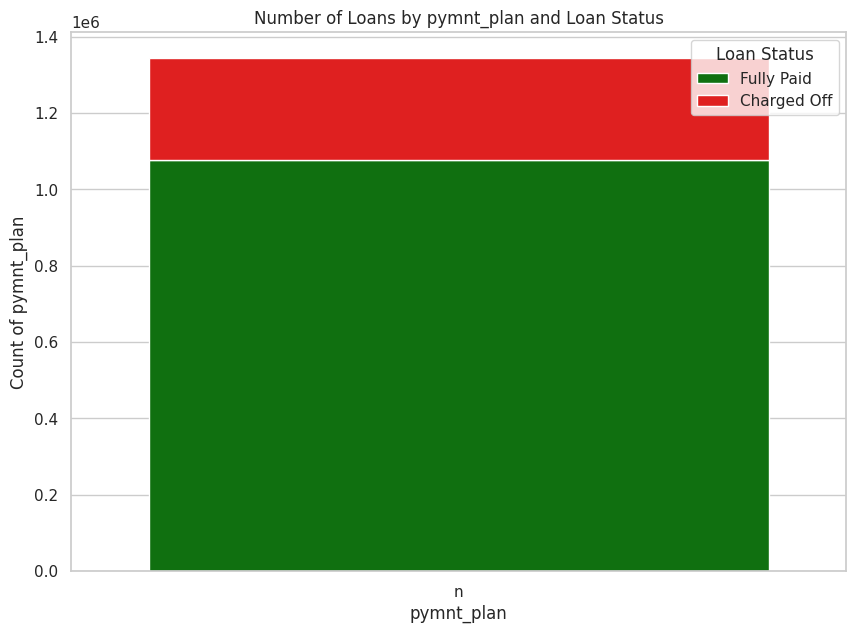

In [ ]:
#Visualizing the above grid

# Creating a cross-tabulation of the count of loan statuses across verification_status
ctab = pd.crosstab(df['pymnt_plan'], df['loan_status'])

# Resetting index to use 'verification_status' as a column for plotting
ctab.reset_index(inplace=True)

# Creating the bar plot
plt.figure(figsize=(10, 7))
bar_width = 0.20  # Narrower bar width
sns.barplot(x='pymnt_plan', y='Fully Paid', data=ctab, color='green', label='Fully Paid')
sns.barplot(x='pymnt_plan', y='Charged Off', data=ctab, color='red', label='Charged Off', bottom=ctab['Fully Paid'])

# Adding labels and title
plt.title('Number of Loans by pymnt_plan and Loan Status')
plt.xlabel('pymnt_plan')
plt.ylabel('Count of pymnt_plan')
plt.legend(title='Loan Status')

plt.show()

**column: url**

In [ ]:
df['url'].value_counts().head(20)

url
https://lendingclub.com/browse/loanDetail.action?loan_id=68407277     1
https://lendingclub.com/browse/loanDetail.action?loan_id=143395570    1
https://lendingclub.com/browse/loanDetail.action?loan_id=143480412    1
https://lendingclub.com/browse/loanDetail.action?loan_id=142972000    1
https://lendingclub.com/browse/loanDetail.action?loan_id=143487081    1
https://lendingclub.com/browse/loanDetail.action?loan_id=143453379    1
https://lendingclub.com/browse/loanDetail.action?loan_id=143422083    1
https://lendingclub.com/browse/loanDetail.action?loan_id=143503573    1
https://lendingclub.com/browse/loanDetail.action?loan_id=143498457    1
https://lendingclub.com/browse/loanDetail.action?loan_id=142936166    1
https://lendingclub.com/browse/loanDetail.action?loan_id=143361341    1
https://lendingclub.com/browse/loanDetail.action?loan_id=143404143    1
https://lendingclub.com/browse/loanDetail.action?loan_id=143496567    1
https://lendingclub.com/browse/loanDetail.action?loan_id=143

**column: purpose**

In [ ]:
df['purpose'].value_counts()

purpose
debt_consolidation    780321
credit_card           295279
home_improvement       87504
other                  77875
major_purchase         29425
medical                15554
small_business         15416
car                    14585
moving                  9480
vacation                9065
house                   7253
wedding                 2294
renewable_energy         933
educational              326
Name: count, dtype: int64

In [ ]:
print('Distribution of loan_status w.r.t purpose')
value_counts=df[['purpose', 'loan_status']].value_counts().reset_index(name='count')
sorted_value_counts=value_counts.sort_values(by=['purpose', 'loan_status'])
print(sorted_value_counts)

Distribution of loan_status w.r.t purpose
               purpose  loan_status   count
19                 car  Charged Off    2141
9                  car   Fully Paid   12444
5          credit_card  Charged Off   49982
1          credit_card   Fully Paid  245297
2   debt_consolidation  Charged Off  165014
0   debt_consolidation   Fully Paid  615307
27         educational  Charged Off      56
25         educational   Fully Paid     270
8     home_improvement  Charged Off   15502
3     home_improvement   Fully Paid   72002
22               house  Charged Off    1587
14               house   Fully Paid    5666
15      major_purchase  Charged Off    5473
6       major_purchase   Fully Paid   23952
17             medical  Charged Off    3387
10             medical   Fully Paid   12167
18              moving  Charged Off    2214
13              moving   Fully Paid    7266
7                other  Charged Off   16385
4                other   Fully Paid   61490
26    renewable_energy  Charged Of

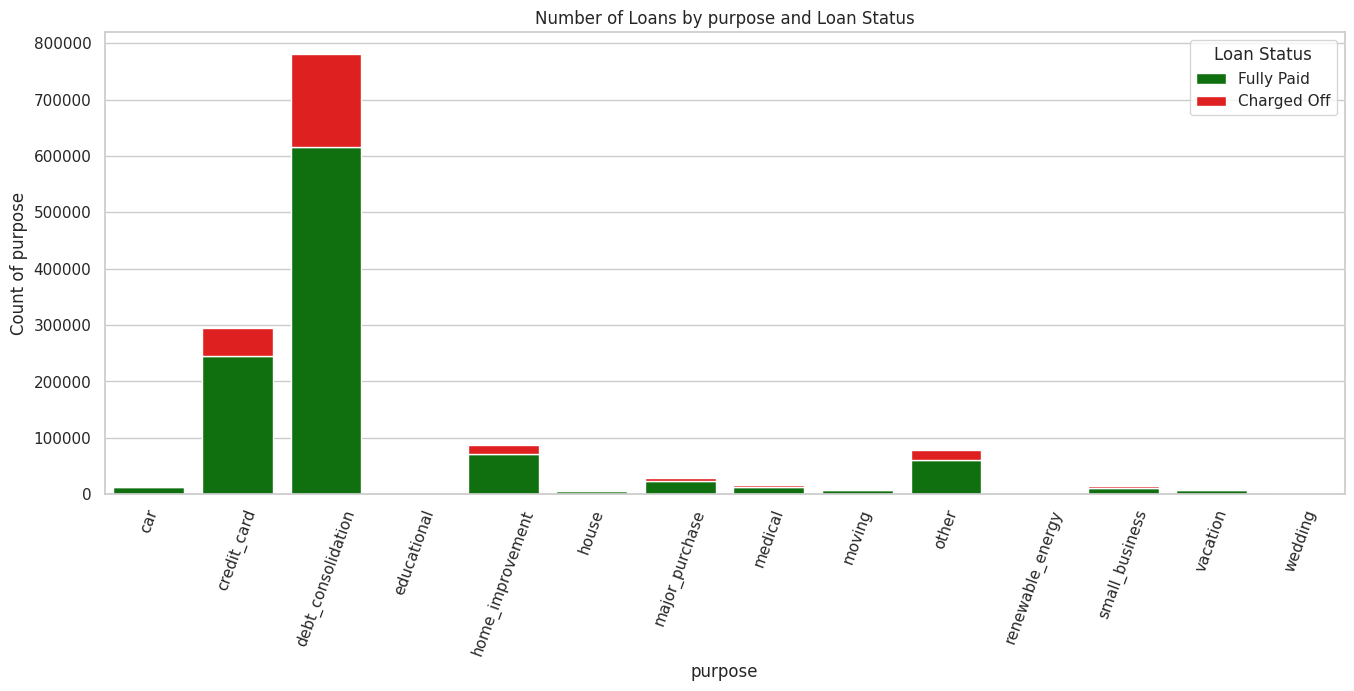

In [ ]:
#Visualizing the above grid

# Creating a cross-tabulation of the count of loan statuses across purpose
ctab = pd.crosstab(df['purpose'], df['loan_status'])

# Resetting index to use 'purpose' as a column for plotting
ctab.reset_index(inplace=True)

# Creating the bar plot
plt.figure(figsize=(16, 6))
bar_width = 0.20  # Narrower bar width
sns.barplot(x='purpose', y='Fully Paid', data=ctab, color='green', label='Fully Paid')
sns.barplot(x='purpose', y='Charged Off', data=ctab, color='red', label='Charged Off', bottom=ctab['Fully Paid'])
plt.xticks(rotation=70)

# Adding labels and title
plt.title('Number of Loans by purpose and Loan Status')
plt.xlabel('purpose')
plt.ylabel('Count of purpose')
plt.legend(title='Loan Status')

plt.show()

**column: addr_state**

In [ ]:
len(df['addr_state'].value_counts())

51

In [ ]:
df['addr_state'].value_counts()

addr_state
CA    196528
TX    110169
NY    109842
FL     95606
IL     51720
NJ     48449
PA     45522
OH     43842
GA     43376
VA     38040
NC     37784
MI     35234
AZ     32695
MD     31227
MA     30977
CO     29671
WA     29188
MN     23968
IN     21716
MO     21260
TN     20385
NV     20267
CT     19728
WI     17732
AL     16613
OR     16406
SC     15992
LA     15499
KY     12839
OK     12281
KS     11240
AR     10047
UT     10036
NM      7362
HI      6757
MS      6588
NH      6449
RI      5871
WV      4878
MT      3823
DE      3783
NE      3586
DC      3475
AK      3190
WY      2922
SD      2767
VT      2652
ME      2030
ID      1689
ND      1602
IA         7
Name: count, dtype: int64

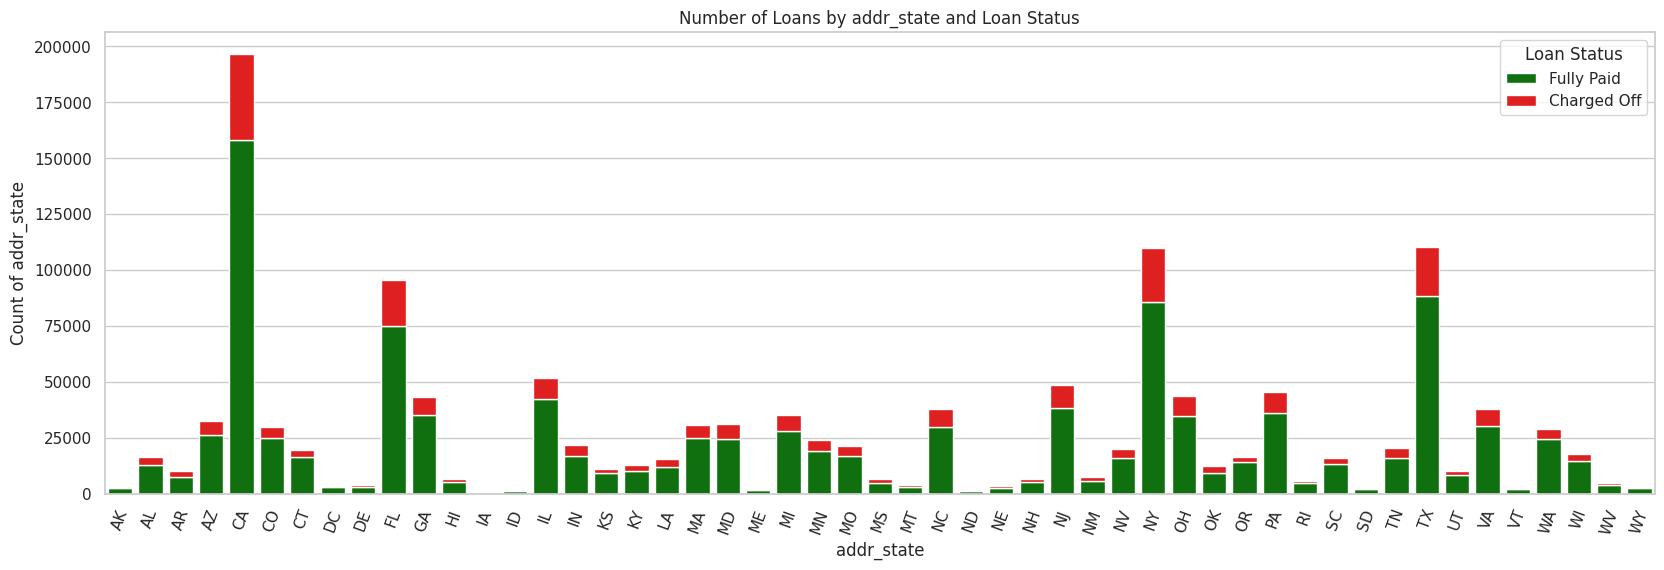

In [ ]:
#Visualizing the above grid

# Creating a cross-tabulation of the count of loan statuses across addr_state
ctab = pd.crosstab(df['addr_state'], df['loan_status'])

# Resetting index to use 'addr_state' as a column for plotting
ctab.reset_index(inplace=True)

# Creating the bar plot
plt.figure(figsize=(20, 6))
bar_width = 0.20  # Narrower bar width
sns.barplot(x='addr_state', y='Fully Paid', data=ctab, color='green', label='Fully Paid')
sns.barplot(x='addr_state', y='Charged Off', data=ctab, color='red', label='Charged Off', bottom=ctab['Fully Paid'])
plt.xticks(rotation=70)

# Adding labels and title
plt.title('Number of Loans by addr_state and Loan Status')
plt.xlabel('addr_state')
plt.ylabel('Count of addr_state')
plt.legend(title='Loan Status')

plt.show()

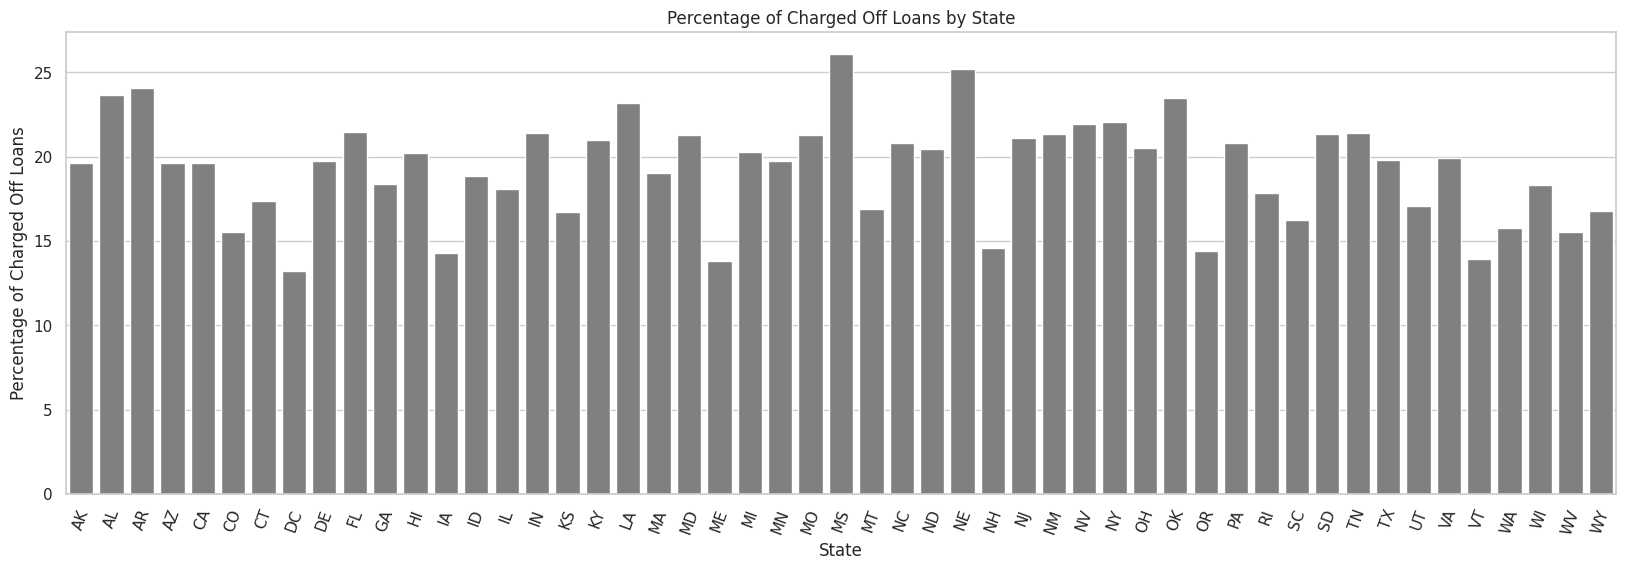

In [ ]:
# Creating a cross-tabulation of the count of loan statuses across addr_state
ctab = pd.crosstab(df['addr_state'], df['loan_status'])

# Calculate the percentage of Charged Off loans
ctab['Charged Off %'] = ctab['Charged Off'] / (ctab['Charged Off'] + ctab['Fully Paid']) * 100

# Resetting index to use 'addr_state' as a column for plotting
ctab.reset_index(inplace=True)

# Creating the bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x='addr_state', y='Charged Off %', data=ctab, color='grey')
plt.xticks(rotation=70)

# Adding labels and title
plt.title('Percentage of Charged Off Loans by State')
plt.xlabel('State')
plt.ylabel('Percentage of Charged Off Loans')

plt.show()

**column: delinq_2yrs**

In [ ]:
df['delinq_2yrs'].value_counts()

delinq_2yrs
0.0     1086059
1.0      172317
2.0       50428
3.0       18340
4.0        8123
5.0        4182
6.0        2301
7.0        1289
8.0         759
9.0         478
10.0        330
11.0        207
12.0        151
13.0        104
14.0         79
15.0         47
16.0         34
18.0         21
17.0         17
19.0         14
20.0         10
21.0          5
26.0          3
22.0          3
25.0          2
29.0          2
30.0          1
27.0          1
39.0          1
28.0          1
24.0          1
Name: count, dtype: int64

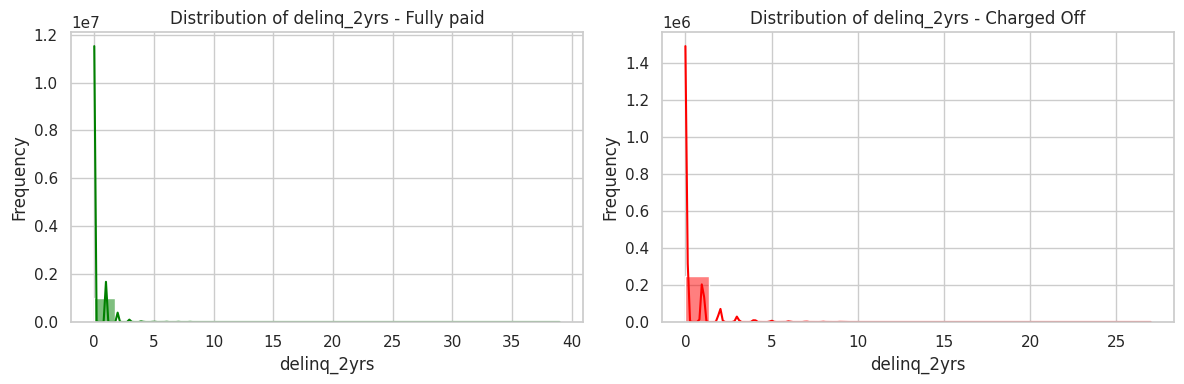

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['delinq_2yrs'], kde=True, color='green')
plt.title('Distribution of delinq_2yrs - Fully paid')
plt.xlabel('delinq_2yrs')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['delinq_2yrs'], kde=True, color='red')
plt.title('Distribution of delinq_2yrs - Charged Off')
plt.xlabel('delinq_2yrs')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

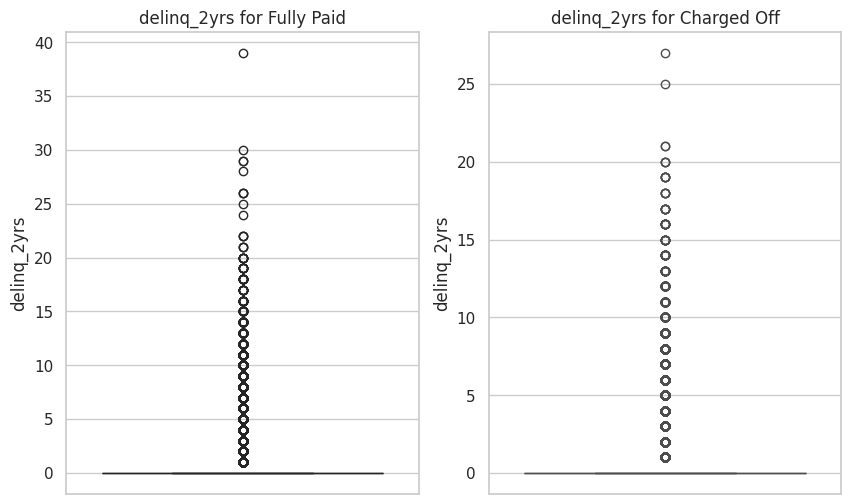

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['delinq_2yrs'].dropna(), color='green')
plt.title('delinq_2yrs for Fully Paid')
plt.ylabel('delinq_2yrs')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['delinq_2yrs'].dropna(), color='red')
plt.title('delinq_2yrs for Charged Off')
plt.ylabel('delinq_2yrs')

plt.show()  # Show all plots

In [ ]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 99.6, 99.7, 99.8, 99.9, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['delinq_2yrs'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

Percentile  Value  Difference
0          0.0    0.0         NaN
1          5.0    0.0         0.0
2         10.0    0.0         0.0
3         15.0    0.0         0.0
4         20.0    0.0         0.0
5         25.0    0.0         0.0
6         30.0    0.0         0.0
7         35.0    0.0         0.0
8         40.0    0.0         0.0
9         45.0    0.0         0.0
10        50.0    0.0         0.0
11        55.0    0.0         0.0
12        60.0    0.0         0.0
13        65.0    0.0         0.0
14        70.0    0.0         0.0
15        75.0    0.0         0.0
16        80.0    0.0         0.0
17        85.0    1.0         1.0
18        90.0    1.0         0.0
19        95.0    2.0         1.0
20        96.0    2.0         0.0
21        96.5    2.0         0.0
22        97.0    2.0         0.0
23        97.5    3.0         1.0
24        98.0    3.0         0.0
25        98.5    3.0         0.0
26        99.0    4.0         1.0
27        99.5    5.0         1.0
28        99.6    6.0         1.0
29        99.7    6.0         0.0
30        99.8    7.0         1.0
31        99.9    9.0         2.0
32       100.0   39.0        30.0

In [ ]:
delinq_2yrs_lower_bound, delinq_2yrs_upper_bound = outlier_thresholds(df, 'delinq_2yrs')
df[(df['delinq_2yrs']< delinq_2yrs_lower_bound) | (df['delinq_2yrs']> delinq_2yrs_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     203637
Charged Off     55614
Name: count, dtype: int64

In [ ]:
len(df[(df['delinq_2yrs']< delinq_2yrs_lower_bound) | (df['delinq_2yrs']> delinq_2yrs_upper_bound)])

259251

In [ ]:
print('lower outlier value:', delinq_2yrs_lower_bound)
print('upper outlier value:', delinq_2yrs_upper_bound)

lower outlier value: 0.0
upper outlier value: 0.0


In [ ]:
print(len(df[df['delinq_2yrs']>=1]))

259251


In [ ]:
100*df[df['delinq_2yrs']==0]['loan_status'].value_counts()/ len(df[df['delinq_2yrs']==0])

loan_status
Fully Paid     80.39287
Charged Off    19.60713
Name: count, dtype: float64

In [ ]:
100*df[df['delinq_2yrs']>=1]['loan_status'].value_counts()/ len(df[df['delinq_2yrs']>=1])

loan_status
Fully Paid     78.548202
Charged Off    21.451798
Name: count, dtype: float64

In [ ]:
for i in range(0,40):
  print(i)
  print(df[df['delinq_2yrs']>=i]['loan_status'].value_counts())
  print(100*df[df['delinq_2yrs']>=i]['loan_status'].value_counts()/ len(df[df['delinq_2yrs']>=i]))

0
loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64
loan_status
Fully Paid     80.037389
Charged Off    19.962611
Name: count, dtype: float64
1
loan_status
Fully Paid     203637
Charged Off     55614
Name: count, dtype: int64
loan_status
Fully Paid     78.548202
Charged Off    21.451798
Name: count, dtype: float64
2
loan_status
Fully Paid     67219
Charged Off    19715
Name: count, dtype: int64
loan_status
Fully Paid     77.321876
Charged Off    22.678124
Name: count, dtype: float64
3
loan_status
Fully Paid     27993
Charged Off     8513
Name: count, dtype: int64
loan_status
Fully Paid     76.680546
Charged Off    23.319454
Name: count, dtype: float64
4
loan_status
Fully Paid     13896
Charged Off     4270
Name: count, dtype: int64
loan_status
Fully Paid     76.49455
Charged Off    23.50545
Name: count, dtype: float64
5
loan_status
Fully Paid     7668
Charged Off    2375
Name: count, dtype: int64
loan_status
Fully Paid     76.351688
Charged Off    23.6

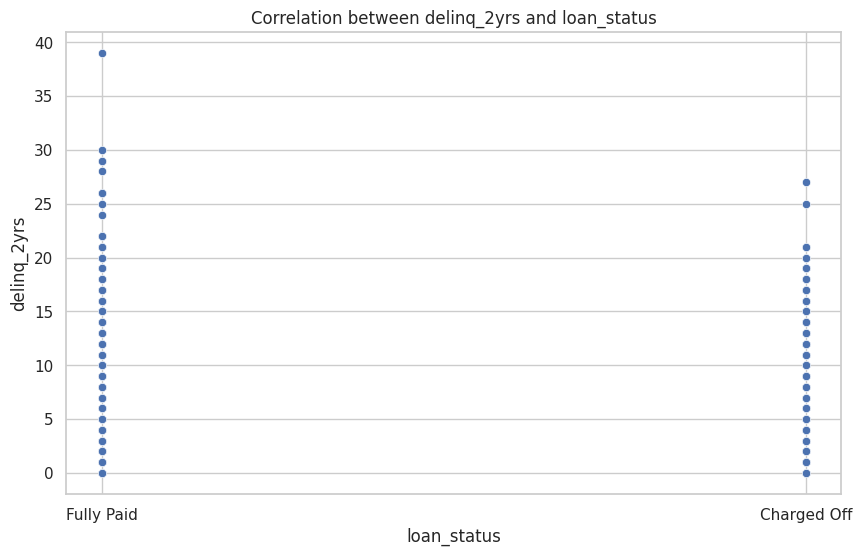

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_status', y='delinq_2yrs', data=df)

# Adding plot labels and title
plt.title('Correlation between delinq_2yrs and loan_status')
plt.xlabel('loan_status')
plt.ylabel('delinq_2yrs')

plt.show()

**column: fico_range_low**

In [ ]:
df['fico_range_low'].value_counts()

fico_range_low
660.0    120862
670.0    117202
665.0    116821
675.0    104593
680.0    103340
685.0     90665
690.0     88221
695.0     79100
700.0     72760
705.0     65401
710.0     57361
715.0     50681
720.0     43606
725.0     35034
730.0     30304
735.0     24061
740.0     21415
745.0     17280
750.0     15916
755.0     13698
760.0     11257
765.0     10372
770.0      8861
775.0      8180
780.0      7307
785.0      5776
790.0      5430
795.0      4358
800.0      3865
805.0      3318
810.0      2378
815.0      1879
820.0      1394
825.0      1070
830.0       701
835.0       401
840.0       254
845.0       186
630.0         1
625.0         1
Name: count, dtype: int64

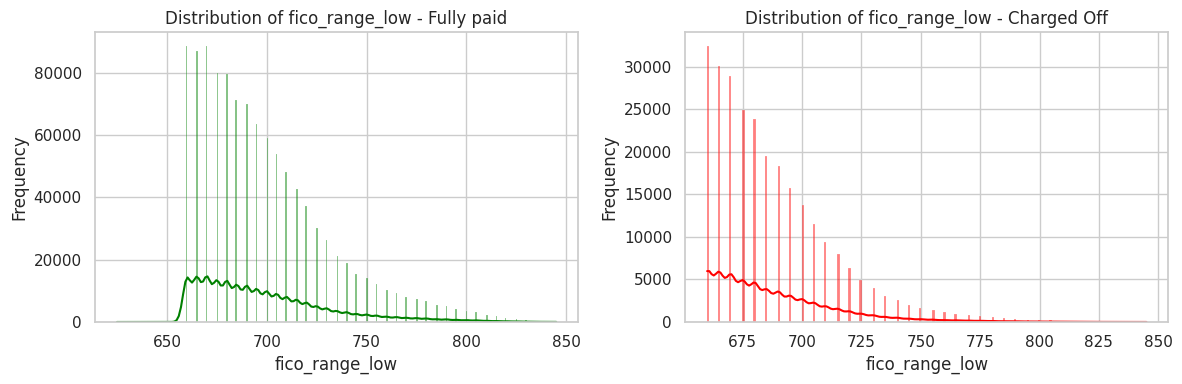

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['fico_range_low'], kde=True, color='green')
plt.title('Distribution of fico_range_low - Fully paid')
plt.xlabel('fico_range_low')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['fico_range_low'], kde=True, color='red')
plt.title('Distribution of fico_range_low - Charged Off')
plt.xlabel('fico_range_low')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

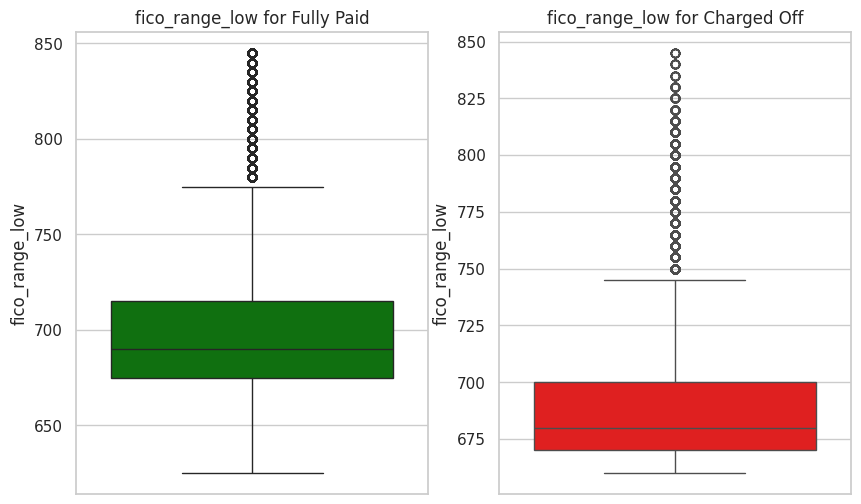

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['fico_range_low'].dropna(), color='green')
plt.title('fico_range_low for Fully Paid')
plt.ylabel('fico_range_low')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['fico_range_low'].dropna(), color='red')
plt.title('fico_range_low for Charged Off')
plt.ylabel('fico_range_low')

plt.show()  # Show all plots

In [ ]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['fico_range_low'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

Percentile  Value  Difference
0          0.0  625.0         NaN
1          5.0  660.0        35.0
2         10.0  665.0         5.0
3         15.0  665.0         0.0
4         20.0  670.0         5.0
5         25.0  670.0         0.0
6         30.0  675.0         5.0
7         35.0  680.0         5.0
8         40.0  680.0         0.0
9         45.0  685.0         5.0
10        50.0  690.0         5.0
11        55.0  690.0         0.0
12        60.0  695.0         5.0
13        65.0  700.0         5.0
14        70.0  705.0         5.0
15        75.0  710.0         5.0
16        80.0  720.0        10.0
17        85.0  725.0         5.0
18        90.0  740.0        15.0
19        95.0  760.0        20.0
20        96.0  770.0        10.0
21        96.5  770.0         0.0
22        97.0  775.0         5.0
23        97.5  780.0         5.0
24        98.0  785.0         5.0
25        98.5  790.0         5.0
26        99.0  800.0        10.0
27        99.5  810.0        10.0
28       100.0  845.0        35.0

In [ ]:
fico_range_low_lower_bound, fico_range_low_upper_bound = outlier_thresholds(df, 'fico_range_low')
df[(df['fico_range_low']< fico_range_low_lower_bound) | (df['fico_range_low']> fico_range_low_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     43042
Charged Off     3455
Name: count, dtype: int64

In [ ]:
len(df[(df['fico_range_low']<fico_range_low_lower_bound) | (df['fico_range_low']> fico_range_low_upper_bound)])

46497

In [ ]:
print('lower outlier value:', fico_range_low_lower_bound)
print('upper outlier value:', fico_range_low_upper_bound)

lower outlier value: 610.0
upper outlier value: 770.0


**column: open_acc**

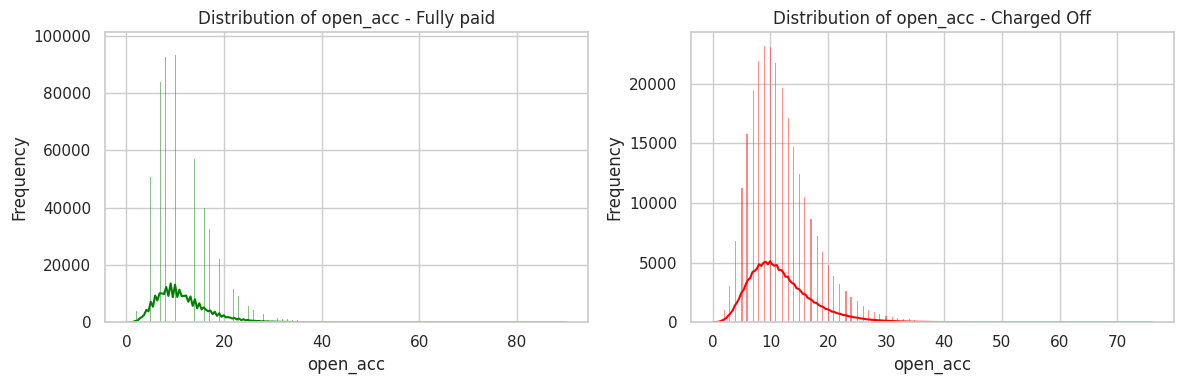

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['open_acc'], kde=True, color='green')
plt.title('Distribution of open_acc - Fully paid')
plt.xlabel('open_acc')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['open_acc'], kde=True, color='red')
plt.title('Distribution of open_acc - Charged Off')
plt.xlabel('open_acc')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

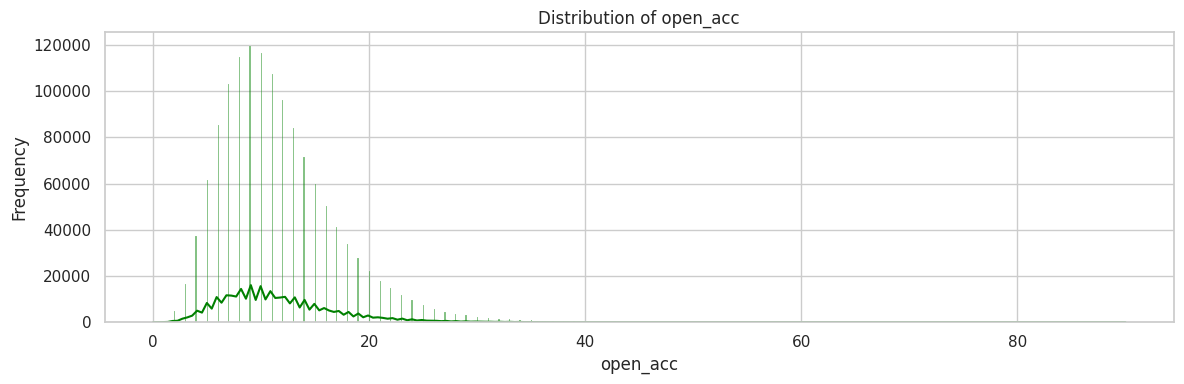

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

sns.histplot(df['open_acc'], kde=True, color='green')
plt.title('Distribution of open_acc')
plt.xlabel('open_acc')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

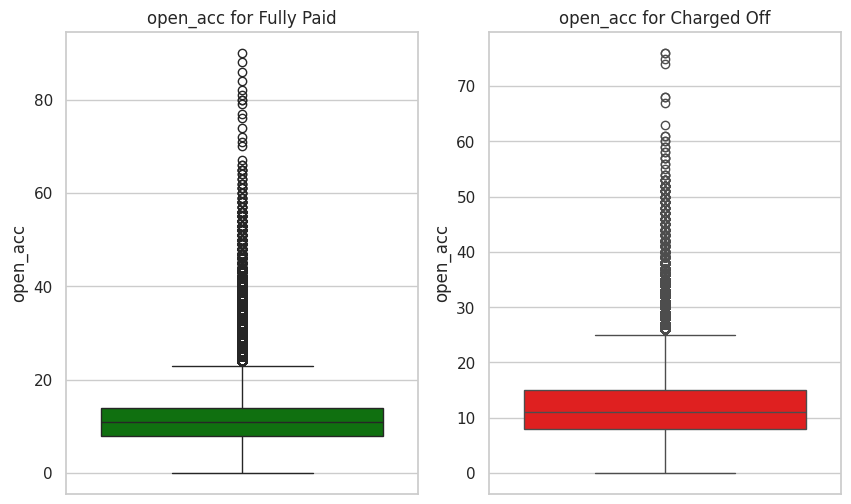

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['open_acc'].dropna(), color='green')
plt.title('open_acc for Fully Paid')
plt.ylabel('open_acc')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['open_acc'].dropna(), color='red')
plt.title('open_acc for Charged Off')
plt.ylabel('open_acc')

plt.show()  # Show all plots

In [ ]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['open_acc'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

Percentile  Value  Difference
0          0.0    0.0         NaN
1          5.0    5.0         5.0
2         10.0    6.0         1.0
3         15.0    6.0         0.0
4         20.0    7.0         1.0
5         25.0    8.0         1.0
6         30.0    8.0         0.0
7         35.0    9.0         1.0
8         40.0    9.0         0.0
9         45.0   10.0         1.0
10        50.0   11.0         1.0
11        55.0   11.0         0.0
12        60.0   12.0         1.0
13        65.0   13.0         1.0
14        70.0   13.0         0.0
15        75.0   14.0         1.0
16        80.0   15.0         1.0
17        85.0   17.0         2.0
18        90.0   19.0         2.0
19        95.0   22.0         3.0
20        96.0   23.0         1.0
21        96.5   23.0         0.0
22        97.0   24.0         1.0
23        97.5   25.0         1.0
24        98.0   26.0         1.0
25        98.5   27.0         1.0
26        99.0   29.0         2.0
27        99.5   32.0         3.0
28       100.0   90.0        58.0

In [ ]:
open_acc_lower_bound, open_acc_upper_bound = outlier_thresholds(df, 'open_acc')
df[(df['open_acc']< open_acc_lower_bound) | (df['open_acc']> open_acc_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     35361
Charged Off    10751
Name: count, dtype: int64

In [ ]:
len(df[(df['open_acc']<open_acc_lower_bound) | (df['open_acc']> open_acc_upper_bound)])

46112

In [ ]:
print('lower outlier value:', open_acc_lower_bound)
print('upper outlier value:', open_acc_upper_bound)

lower outlier value: -1.0
upper outlier value: 23.0


**column: revol_bal**

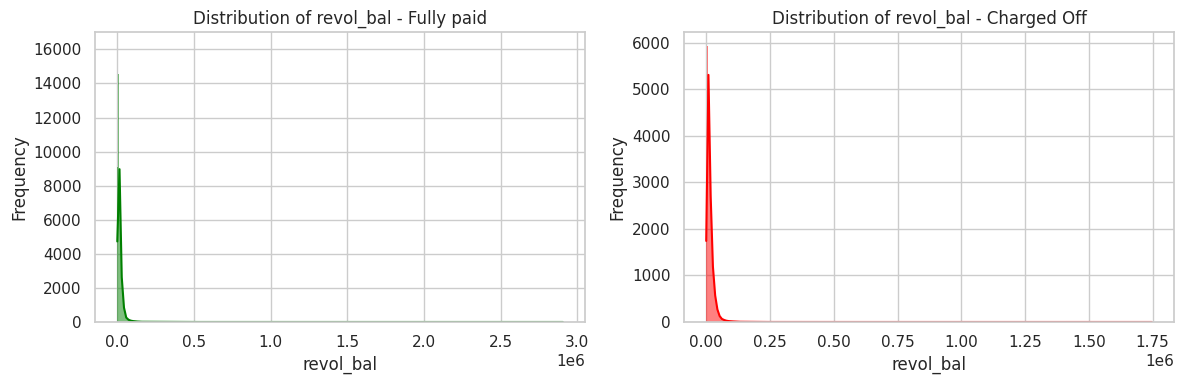

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['revol_bal'], kde=True, color='green')
plt.title('Distribution of revol_bal - Fully paid')
plt.xlabel('revol_bal')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['revol_bal'], kde=True, color='red')
plt.title('Distribution of revol_bal - Charged Off')
plt.xlabel('revol_bal')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

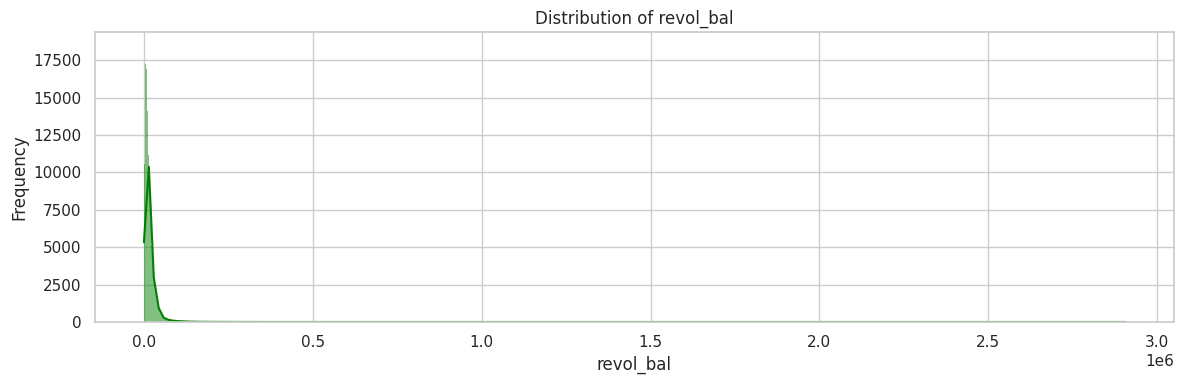

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

sns.histplot(df['revol_bal'], kde=True, color='green')
plt.title('Distribution of revol_bal')
plt.xlabel('revol_bal')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

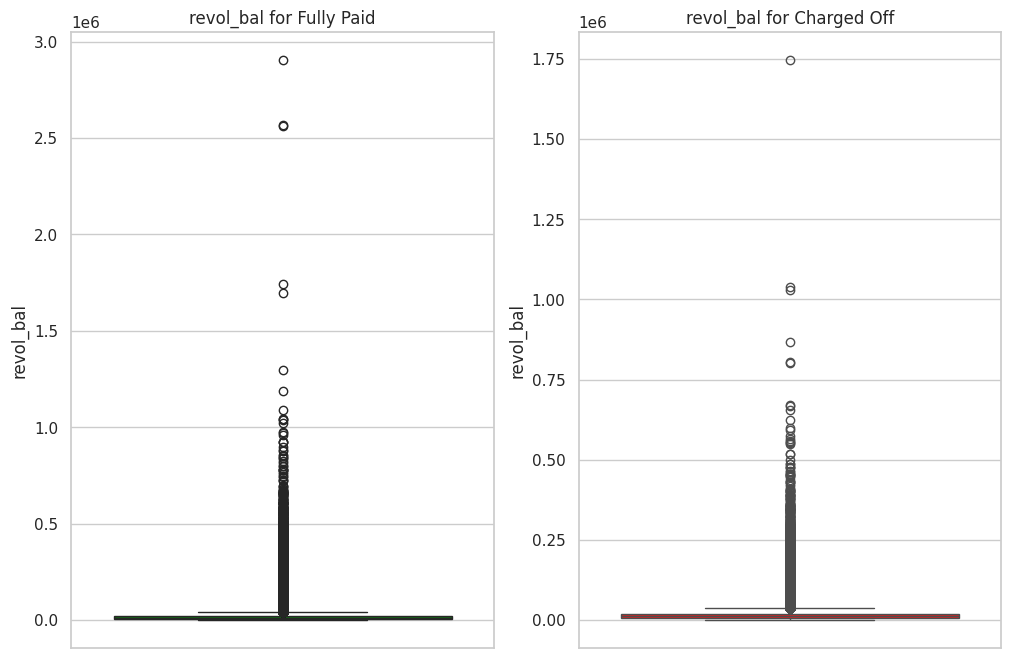

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['revol_bal'].dropna(), color='green')
plt.title('revol_bal for Fully Paid')
plt.ylabel('revol_bal')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['revol_bal'].dropna(), color='red')
plt.title('revol_bal for Charged Off')
plt.ylabel('revol_bal')

plt.show()  # Show all plots

In [ ]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['revol_bal'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

Percentile        Value   Difference
0          0.0        0.000          NaN
1          5.0     1670.000     1670.000
2         10.0     3019.000     1349.000
3         15.0     4060.000     1041.000
4         20.0     5018.000      958.000
5         25.0     5943.000      925.000
6         30.0     6882.000      939.000
7         35.0     7856.000      974.000
8         40.0     8874.000     1018.000
9         45.0     9964.000     1090.000
10        50.0    11134.000     1170.000
11        55.0    12404.000     1270.000
12        60.0    13850.000     1446.000
13        65.0    15487.000     1637.000
14        70.0    17404.000     1917.000
15        75.0    19755.750     2351.750
16        80.0    22707.000     2951.250
17        85.0    26654.650     3947.650
18        90.0    32425.000     5770.350
19        95.0    43374.000    10949.000
20        96.0    47396.640     4022.640
21        96.5    49950.185     2553.545
22        97.0    53473.000     3522.815
23        97.5    58462.000     4989.000
24        98.0    65634.280     7172.280
25        98.5    76071.000    10436.720
26        99.0    94553.910    18482.910
27        99.5   134250.550    39696.640
28       100.0  2904836.000  2770585.450

In [ ]:
revol_bal_lower_bound, revol_bal_upper_bound = outlier_thresholds(df, 'revol_bal')
df[(df['revol_bal']< revol_bal_lower_bound) | (df['revol_bal']> revol_bal_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     66388
Charged Off    13303
Name: count, dtype: int64

In [ ]:
len(df[(df['revol_bal']<revol_bal_lower_bound) | (df['revol_bal']> revol_bal_upper_bound)])

79691

In [ ]:
print('lower outlier value:', revol_bal_lower_bound)
print('upper outlier value:', revol_bal_upper_bound)

lower outlier value: -14776.125
upper outlier value: 40474.875


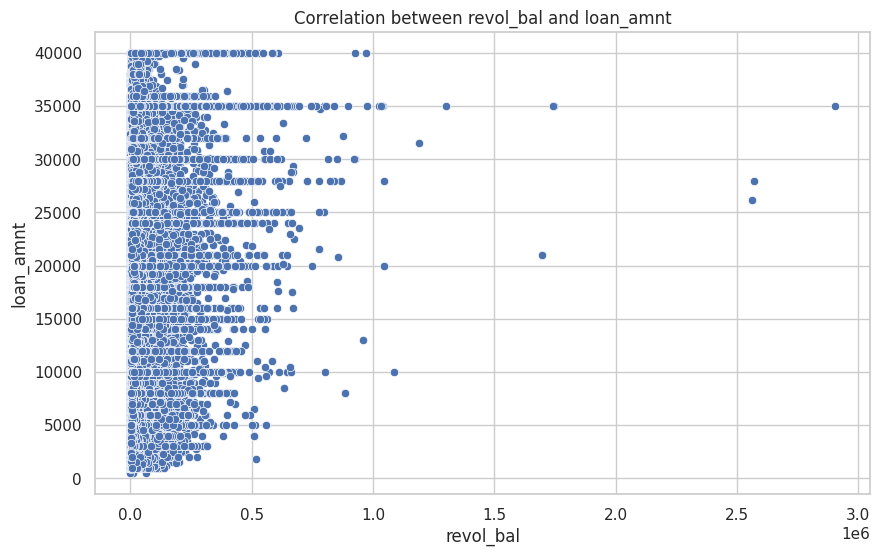

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='revol_bal', y='loan_amnt', data=df)

# Adding plot labels and title
plt.title('Correlation between revol_bal and loan_amnt')
plt.xlabel('revol_bal')
plt.ylabel('loan_amnt')

plt.show()

There's no correlation between revol_bal and loan_amnt

**column: total_acc**

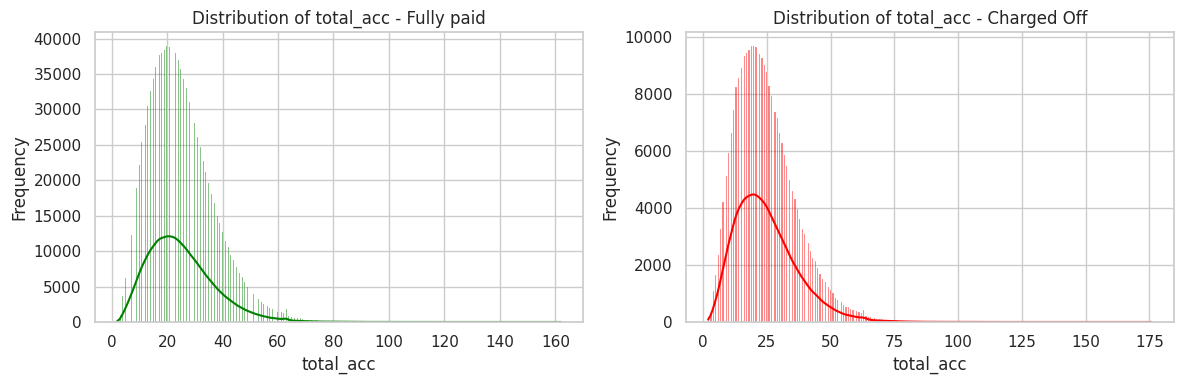

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['total_acc'], kde=True, color='green')
plt.title('Distribution of total_acc - Fully paid')
plt.xlabel('total_acc')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['total_acc'], kde=True, color='red')
plt.title('Distribution of total_acc - Charged Off')
plt.xlabel('total_acc')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

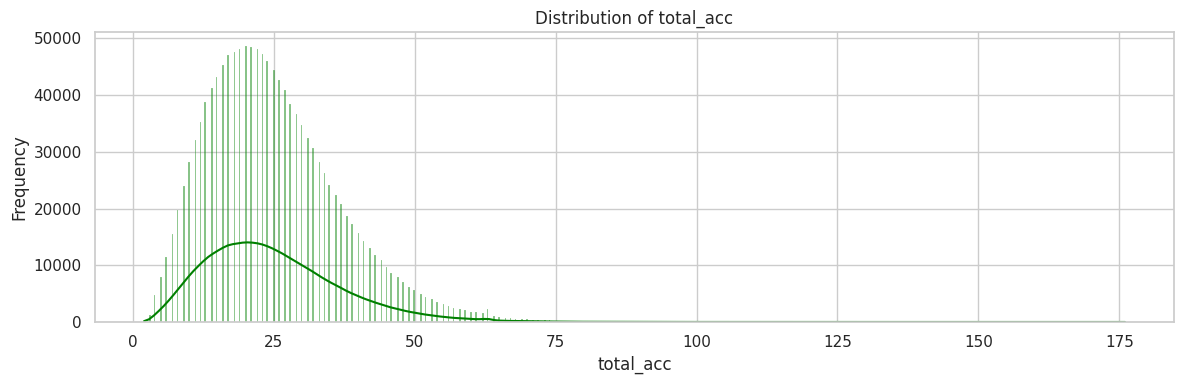

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

sns.histplot(df['total_acc'], kde=True, color='green')
plt.title('Distribution of total_acc')
plt.xlabel('total_acc')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

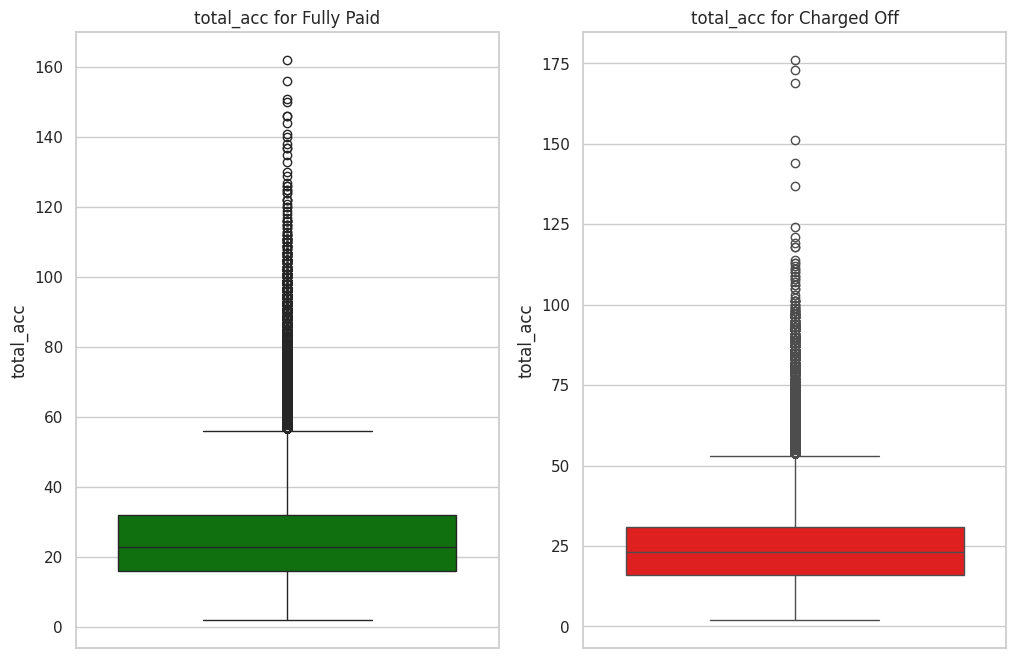

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['total_acc'].dropna(), color='green')
plt.title('total_acc for Fully Paid')
plt.ylabel('total_acc')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['total_acc'].dropna(), color='red')
plt.title('total_acc for Charged Off')
plt.ylabel('total_acc')

plt.show()  # Show all plots

In [ ]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['total_acc'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

Percentile  Value  Difference
0          0.0    2.0         NaN
1          5.0    9.0         7.0
2         10.0   11.0         2.0
3         15.0   13.0         2.0
4         20.0   15.0         2.0
5         25.0   16.0         1.0
6         30.0   18.0         2.0
7         35.0   19.0         1.0
8         40.0   20.0         1.0
9         45.0   22.0         2.0
10        50.0   23.0         1.0
11        55.0   25.0         2.0
12        60.0   26.0         1.0
13        65.0   28.0         2.0
14        70.0   30.0         2.0
15        75.0   32.0         2.0
16        80.0   34.0         2.0
17        85.0   37.0         3.0
18        90.0   41.0         4.0
19        95.0   47.0         6.0
20        96.0   49.0         2.0
21        96.5   50.0         1.0
22        97.0   52.0         2.0
23        97.5   53.0         1.0
24        98.0   55.0         2.0
25        98.5   57.0         2.0
26        99.0   61.0         4.0
27        99.5   65.0         4.0
28       100.0  176.0       111.0

In [ ]:
total_acc_lower_bound, total_acc_upper_bound = outlier_thresholds(df, 'total_acc')
df[(df['total_acc']< total_acc_lower_bound) | (df['total_acc']> total_acc_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     17916
Charged Off     4699
Name: count, dtype: int64

In [ ]:
len(df[(df['total_acc']<total_acc_lower_bound) | (df['total_acc']> total_acc_upper_bound)])

22615

In [ ]:
print('lower outlier value:', total_acc_lower_bound)
print('upper outlier value:', total_acc_upper_bound)

lower outlier value: -8.0
upper outlier value: 56.0


**column: total_pymnt**

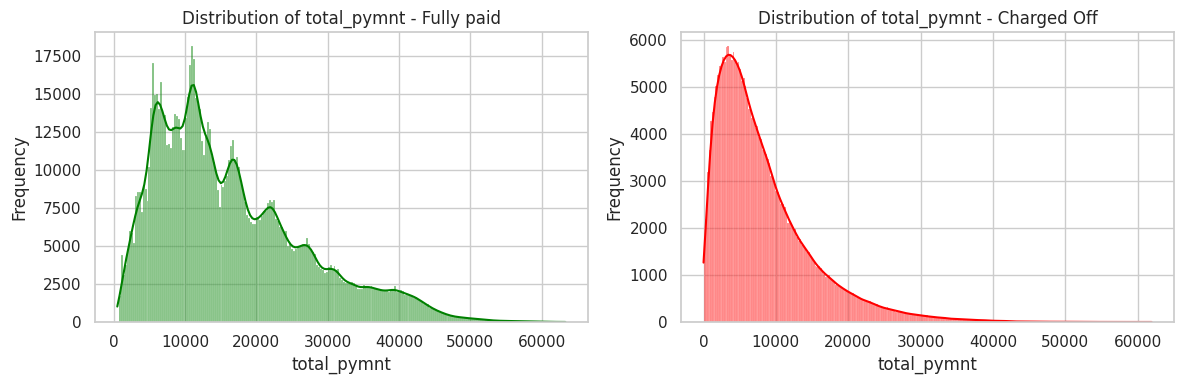

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['total_pymnt'], kde=True, color='green')
plt.title('Distribution of total_pymnt - Fully paid')
plt.xlabel('total_pymnt')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['total_pymnt'], kde=True, color='red')
plt.title('Distribution of total_pymnt - Charged Off')
plt.xlabel('total_pymnt')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

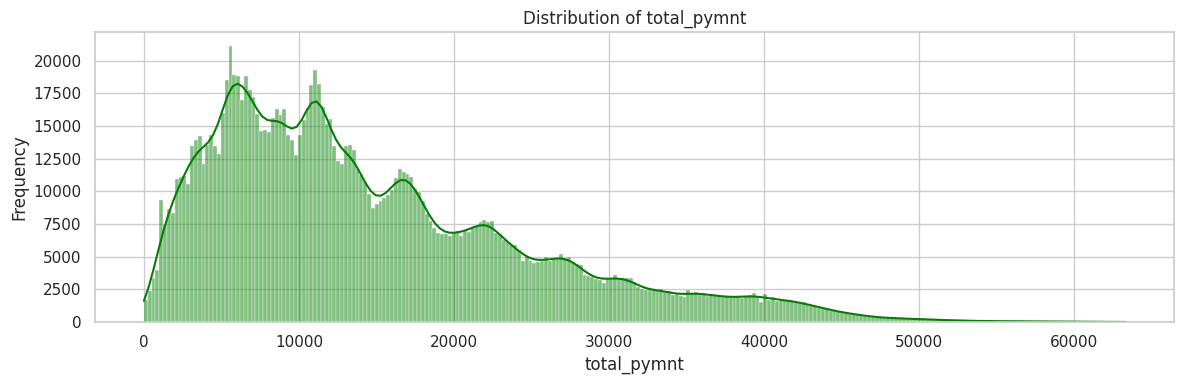

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

sns.histplot(df['total_pymnt'], kde=True, color='green')
plt.title('Distribution of total_pymnt')
plt.xlabel('total_pymnt')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

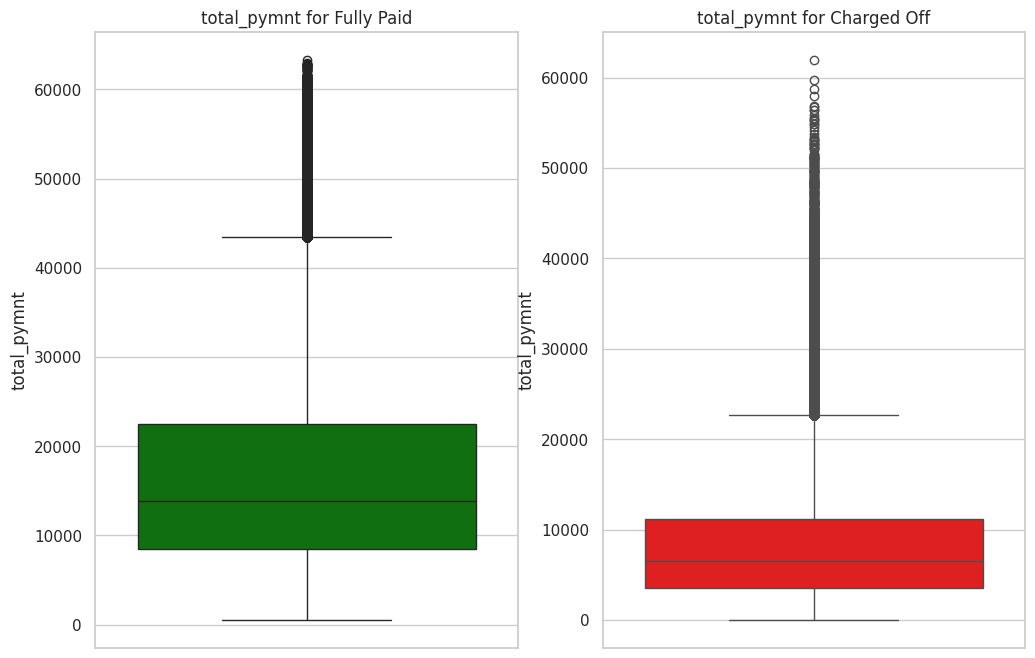

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['total_pymnt'].dropna(), color='green')
plt.title('total_pymnt for Fully Paid')
plt.ylabel('total_pymnt')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['total_pymnt'].dropna(), color='red')
plt.title('total_pymnt for Charged Off')
plt.ylabel('total_pymnt')

plt.show()  # Show all plots

In [ ]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['total_pymnt'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

Percentile         Value    Difference
0          0.0      0.000000           NaN
1          5.0   2481.936186   2481.936186
2         10.0   3801.678000   1319.741814
3         15.0   5046.071065   1244.393065
4         20.0   5925.400508    879.329443
5         25.0   6838.042422    912.641914
6         30.0   7892.734392   1054.691969
7         35.0   8970.160459   1077.426067
8         40.0  10138.336613   1168.176154
9         45.0  11112.330262    973.993649
10        50.0  12128.021933   1015.691671
11        55.0  13403.189810   1275.167878
12        60.0  14950.364894   1547.175083
13        65.0  16600.999194   1650.634300
14        70.0  18203.656244   1602.657050
15        75.0  20585.591210   2381.934966
16        80.0  22862.283170   2276.691960
17        85.0  25984.645609   3122.362439
18        90.0  29993.253367   4008.607758
19        95.0  36459.311476   6466.058109
20        96.0  38162.275032   1702.963556
21        96.5  39033.896011    871.620980
22        97.0  39872.539294    838.643283
23        97.5  40767.958367    895.419073
24        98.0  41785.803279   1017.844911
25        98.5  42903.219768   1117.416489
26        99.0  44431.538221   1528.318453
27        99.5  47199.138277   2767.600056
28       100.0  63296.877917  16097.739640

In [ ]:
total_pymnt_lower_bound, total_pymnt_upper_bound = outlier_thresholds(df, 'total_pymnt')
df[(df['total_pymnt']< total_pymnt_lower_bound) | (df['total_pymnt']> total_pymnt_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     30384
Charged Off      375
Name: count, dtype: int64

In [ ]:
len(df[(df['total_pymnt']<total_pymnt_lower_bound) | (df['total_pymnt']> total_pymnt_upper_bound)])

30759

In [ ]:
print('lower outlier value:', total_pymnt_lower_bound)
print('upper outlier value:', total_pymnt_upper_bound)

lower outlier value: -13783.280759021998
upper outlier value: 41206.9143915288


**column: total_pymnt_inv**

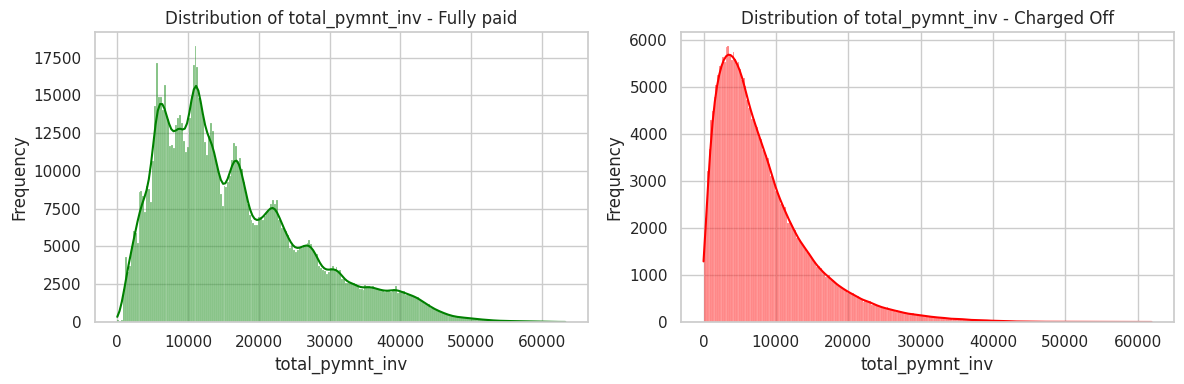

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['total_pymnt_inv'], kde=True, color='green')
plt.title('Distribution of total_pymnt_inv - Fully paid')
plt.xlabel('total_pymnt_inv')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['total_pymnt_inv'], kde=True, color='red')
plt.title('Distribution of total_pymnt_inv - Charged Off')
plt.xlabel('total_pymnt_inv')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

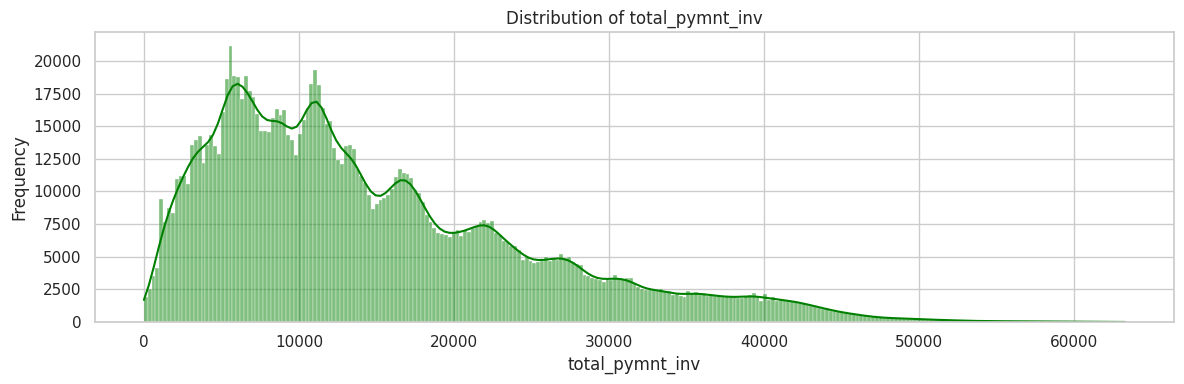

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

sns.histplot(df['total_pymnt_inv'], kde=True, color='green')
plt.title('Distribution of total_pymnt_inv')
plt.xlabel('total_pymnt_inv')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

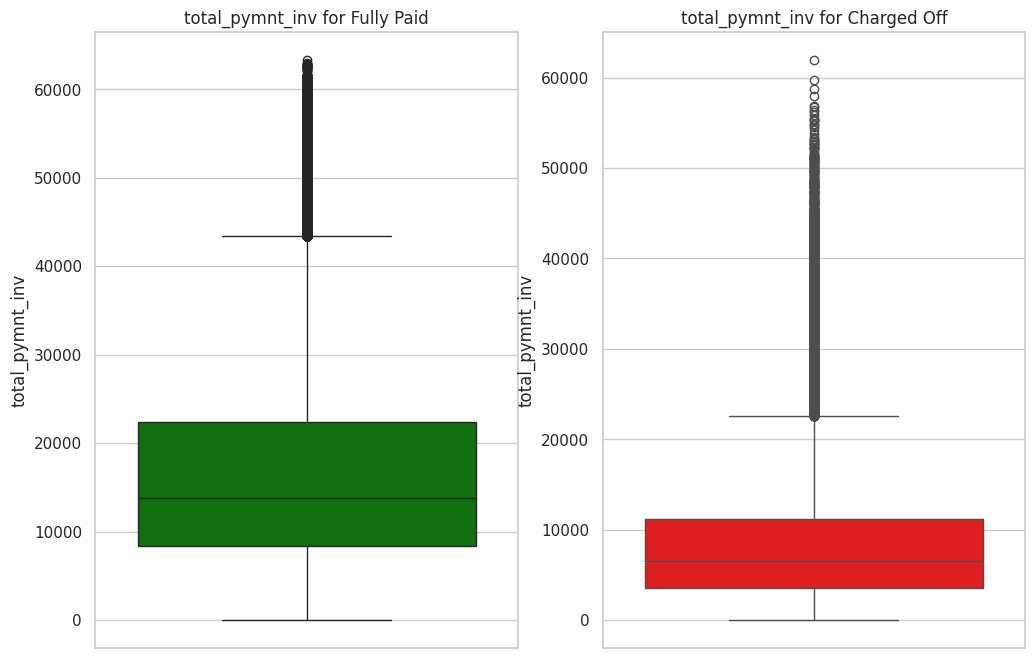

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['total_pymnt_inv'].dropna(), color='green')
plt.title('total_pymnt_inv for Fully Paid')
plt.ylabel('total_pymnt_inv')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['total_pymnt_inv'].dropna(), color='red')
plt.title('total_pymnt_inv for Charged Off')
plt.ylabel('total_pymnt_inv')

plt.show()  # Show all plots

In [ ]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['total_pymnt_inv'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

Percentile        Value   Difference
0          0.0      0.00000          NaN
1          5.0   2460.05000   2460.05000
2         10.0   3777.01800   1316.96800
3         15.0   5026.34700   1249.32900
4         20.0   5904.74800    878.40100
5         25.0   6816.51500    911.76700
6         30.0   7872.85400   1056.33900
7         35.0   8948.08900   1075.23500
8         40.0  10115.90600   1167.81700
9         45.0  11094.59000    978.68400
10        50.0  12107.29000   1012.70000
11        55.0  13380.61000   1273.32000
12        60.0  14918.63200   1538.02200
13        65.0  16579.00400   1660.37200
14        70.0  18179.13300   1600.12900
15        75.0  20558.97500   2379.84200
16        80.0  22831.88600   2272.91100
17        85.0  25960.16850   3128.28250
18        90.0  29964.26200   4004.09350
19        95.0  36434.59100   6470.32900
20        96.0  38135.30800   1700.71700
21        96.5  39014.66370    879.35570
22        97.0  39849.37410    834.71040
23        97.5  40746.55825    897.18415
24        98.0  41758.02740   1011.46915
25        98.5  42878.49570   1120.46830
26        99.0  44394.97100   1516.47530
27        99.5  47143.80145   2748.83045
28       100.0  63296.88000  16153.07855

In [ ]:
total_pymnt_inv_lower_bound, total_pymnt_inv_upper_bound = outlier_thresholds(df, 'total_pymnt_inv')
df[(df['total_pymnt_inv']< total_pymnt_inv_lower_bound) | (df['total_pymnt_inv']> total_pymnt_inv_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     30477
Charged Off      375
Name: count, dtype: int64

In [ ]:
len(df[(df['total_pymnt_inv']<total_pymnt_inv_lower_bound) | (df['total_pymnt_inv']> total_pymnt_inv_upper_bound)])

30852

In [ ]:
print('lower outlier value:', total_pymnt_inv_lower_bound)
print('upper outlier value:', total_pymnt_inv_upper_bound)

lower outlier value: -13797.175
upper outlier value: 41172.66499999999


**column: policy_code**

In [ ]:
len(df['policy_code'].value_counts())

1

In [ ]:
df['policy_code'].value_counts()

policy_code
1.0    1345310
Name: count, dtype: int64

**column: application_type**

In [ ]:
len(df['application_type'].value_counts())

2

In [ ]:
df['application_type'].value_counts()

application_type
Individual    1319510
Joint App       25800
Name: count, dtype: int64

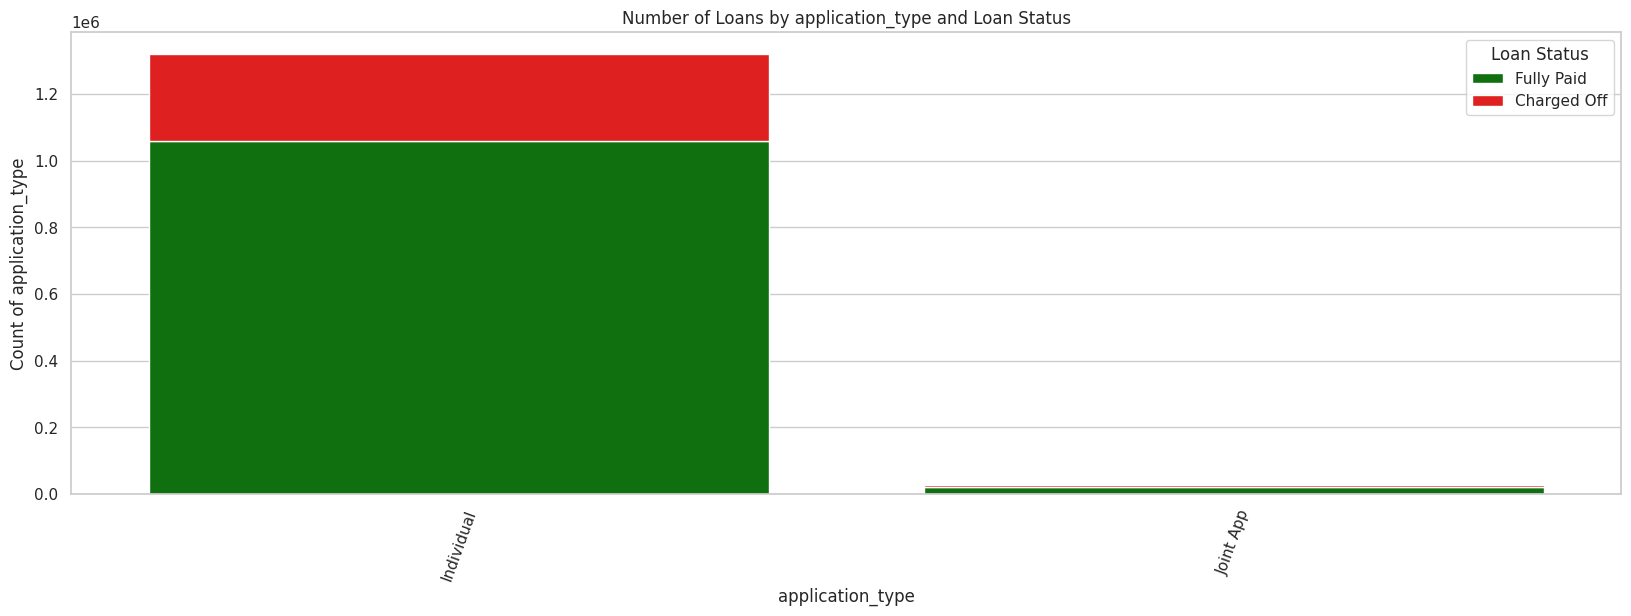

In [ ]:
#Visualizing the above grid

# Creating a cross-tabulation of the count of loan statuses across application_type
ctab = pd.crosstab(df['application_type'], df['loan_status'])

# Resetting index to use 'addr_state' as a column for plotting
ctab.reset_index(inplace=True)

# Creating the bar plot
plt.figure(figsize=(20, 6))
bar_width = 0.20  # Narrower bar width
sns.barplot(x='application_type', y='Fully Paid', data=ctab, color='green', label='Fully Paid')
sns.barplot(x='application_type', y='Charged Off', data=ctab, color='red', label='Charged Off', bottom=ctab['Fully Paid'])
plt.xticks(rotation=70)

# Adding labels and title
plt.title('Number of Loans by application_type and Loan Status')
plt.xlabel('application_type')
plt.ylabel('Count of application_type')
plt.legend(title='Loan Status')

plt.show()

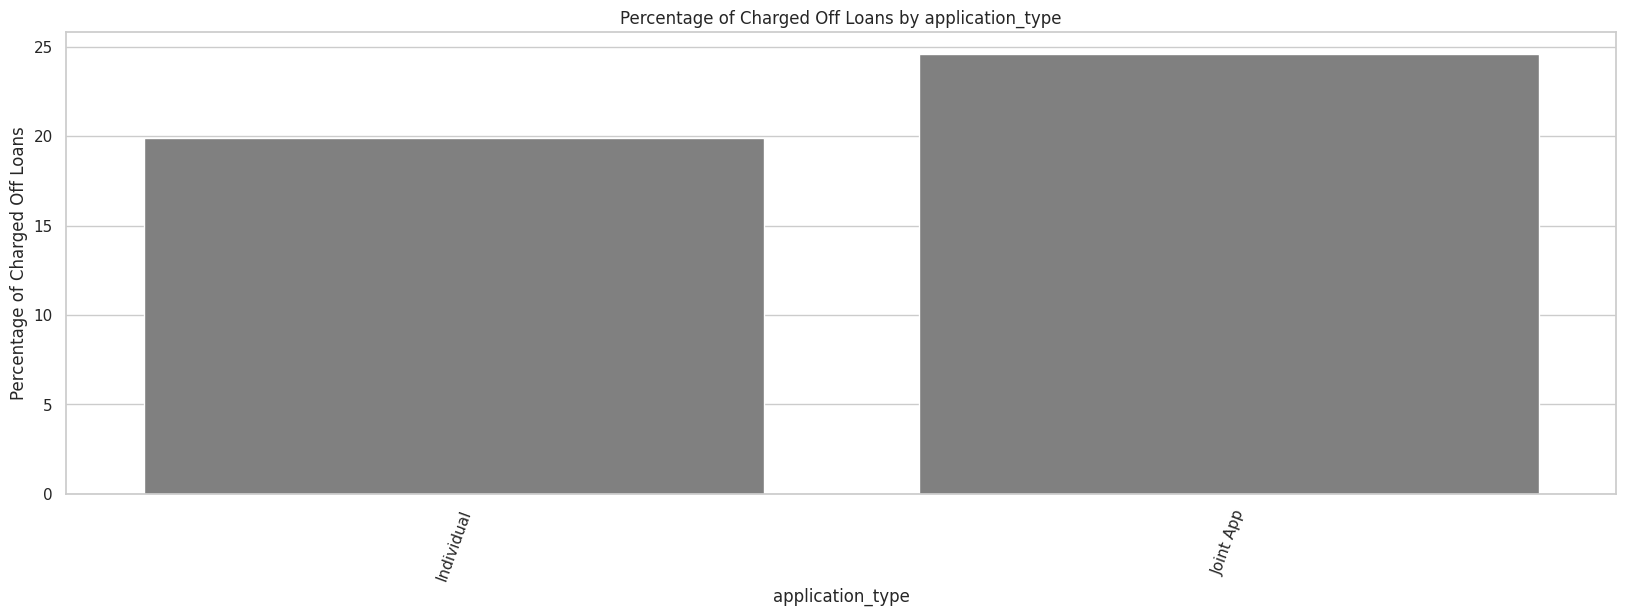

In [ ]:
# Creating a cross-tabulation of the count of loan statuses across addr_state
ctab = pd.crosstab(df['application_type'], df['loan_status'])

# Calculate the percentage of Charged Off loans
ctab['Charged Off %'] = ctab['Charged Off'] / (ctab['Charged Off'] + ctab['Fully Paid']) * 100

# Resetting index to use 'addr_state' as a column for plotting
ctab.reset_index(inplace=True)

# Creating the bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x='application_type', y='Charged Off %', data=ctab, color='grey')
plt.xticks(rotation=70)

# Adding labels and title
plt.title('Percentage of Charged Off Loans by application_type')
plt.xlabel('application_type')
plt.ylabel('Percentage of Charged Off Loans')

plt.show()

**column: delinq_amnt**

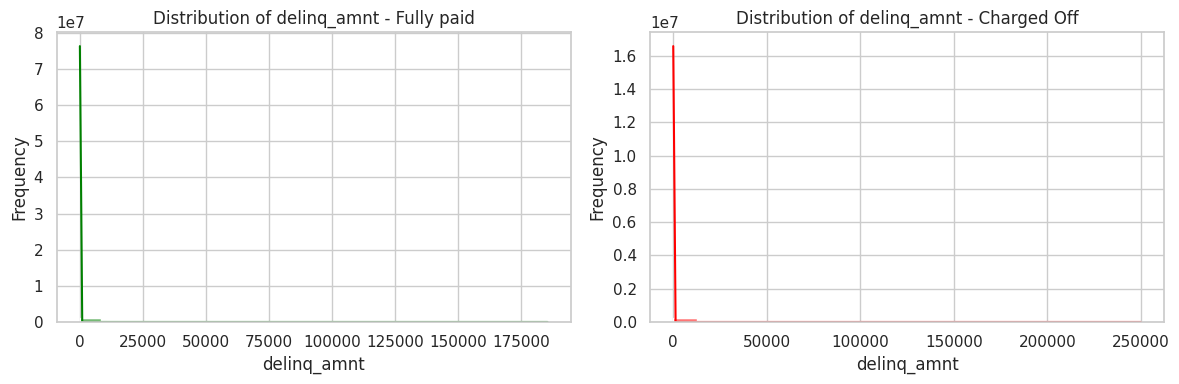

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_fully_paid['delinq_amnt'], kde=True, color='green')
plt.title('Distribution of delinq_amnt - Fully paid')
plt.xlabel('delinq_amnt')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_charged_off['delinq_amnt'], kde=True, color='red')
plt.title('Distribution of delinq_amnt - Charged Off')
plt.xlabel('delinq_amnt')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

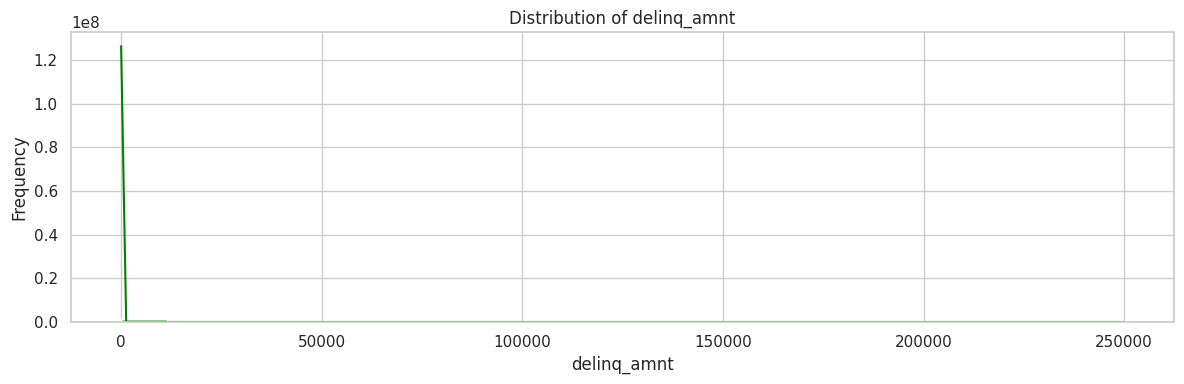

In [ ]:
# Plotting Histograms/Density Plots
plt.figure(figsize=(12, 4))

sns.histplot(df['delinq_amnt'], kde=True, color='green')
plt.title('Distribution of delinq_amnt')
plt.xlabel('delinq_amnt')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

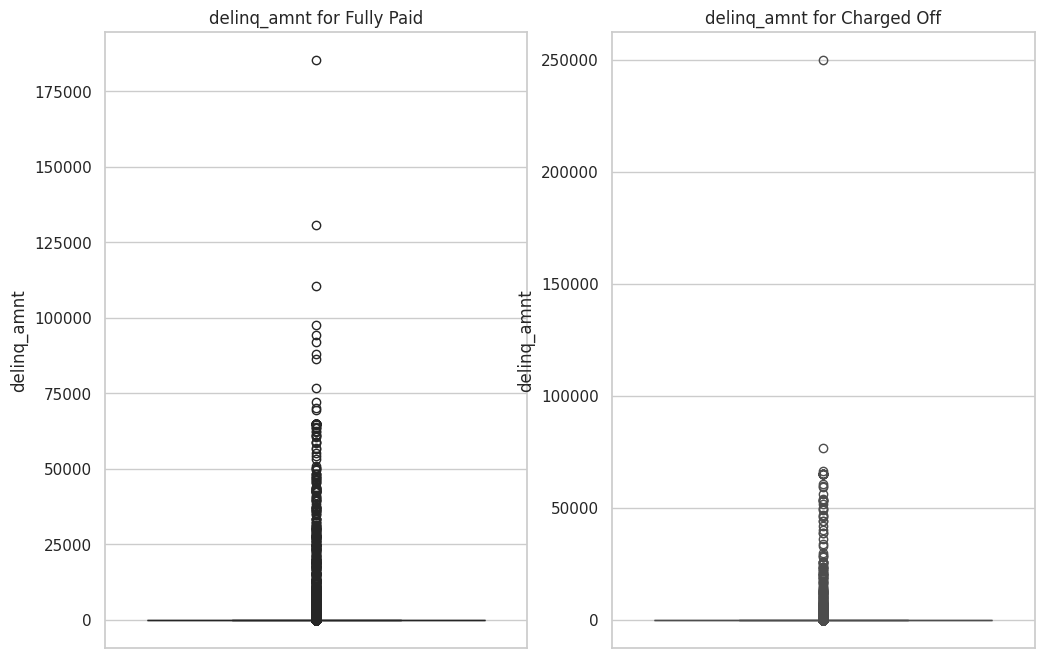

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_fully_paid['delinq_amnt'].dropna(), color='green')
plt.title('delinq_amnt for Fully Paid')
plt.ylabel('delinq_amnt')

# Subplot for Charged Off
plt.subplot(1, 2, 2)
sns.boxplot(y=df_charged_off['delinq_amnt'].dropna(), color='red')
plt.title('delinq_amnt for Charged Off')
plt.ylabel('delinq_amnt')

plt.show()  # Show all plots

In [ ]:
# Define the desired percentiles
percentile_list=[]

percentiles = list(range(0, 96, 5))
percentiles.extend([96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100])

# Calculating the percentile values
percentile_values = [np.percentile(df['delinq_amnt'].dropna(), p) for p in percentiles]

# Creating the DataFrame
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Value': percentile_values
})
percentile_df['Difference'] = percentile_df['Value'].diff()
percentile_df

Percentile     Value  Difference
0          0.0       0.0         NaN
1          5.0       0.0         0.0
2         10.0       0.0         0.0
3         15.0       0.0         0.0
4         20.0       0.0         0.0
5         25.0       0.0         0.0
6         30.0       0.0         0.0
7         35.0       0.0         0.0
8         40.0       0.0         0.0
9         45.0       0.0         0.0
10        50.0       0.0         0.0
11        55.0       0.0         0.0
12        60.0       0.0         0.0
13        65.0       0.0         0.0
14        70.0       0.0         0.0
15        75.0       0.0         0.0
16        80.0       0.0         0.0
17        85.0       0.0         0.0
18        90.0       0.0         0.0
19        95.0       0.0         0.0
20        96.0       0.0         0.0
21        96.5       0.0         0.0
22        97.0       0.0         0.0
23        97.5       0.0         0.0
24        98.0       0.0         0.0
25        98.5       0.0         0.0
26        99.0       0.0         0.0
27        99.5       0.0         0.0
28       100.0  249925.0    249925.0

In [ ]:
delinq_amnt_lower_bound, delinq_amnt_upper_bound = outlier_thresholds(df, 'delinq_amnt')
df[(df['delinq_amnt']< delinq_amnt_lower_bound) | (df['delinq_amnt']> delinq_amnt_upper_bound)]['loan_status'].value_counts()

loan_status
Fully Paid     3837
Charged Off    1162
Name: count, dtype: int64

In [ ]:
len(df[(df['delinq_amnt']<delinq_amnt_lower_bound) | (df['delinq_amnt']> delinq_amnt_upper_bound)])

4999

In [ ]:
print('lower outlier value:', delinq_amnt_lower_bound)
print('upper outlier value:', delinq_amnt_upper_bound)

lower outlier value: 0.0
upper outlier value: 0.0


**column: hardship_flag**

In [ ]:
len(df['hardship_flag'].value_counts())

1

In [ ]:
df['hardship_flag'].value_counts()

hardship_flag
N    1345310
Name: count, dtype: int64

**column: disbursement_method**

In [ ]:
len(df['disbursement_method'].value_counts())

2

In [ ]:
df['disbursement_method'].value_counts()

disbursement_method
Cash         1338410
DirectPay       6900
Name: count, dtype: int64

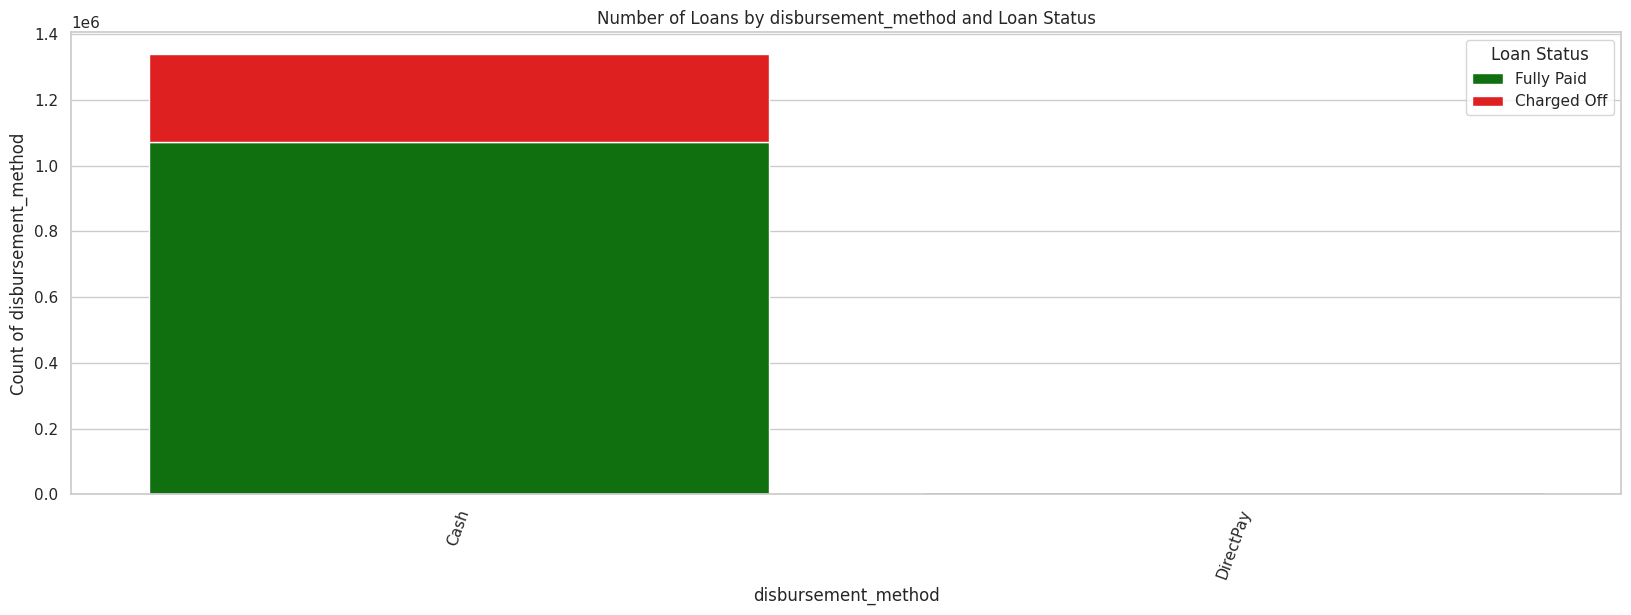

In [ ]:
#Visualizing the above grid

# Creating a cross-tabulation of the count of loan statuses across disbursement_method
ctab = pd.crosstab(df['disbursement_method'], df['loan_status'])

# Resetting index to use 'addr_state' as a column for plotting
ctab.reset_index(inplace=True)

# Creating the bar plot
plt.figure(figsize=(20, 6))
bar_width = 0.20  # Narrower bar width
sns.barplot(x='disbursement_method', y='Fully Paid', data=ctab, color='green', label='Fully Paid')
sns.barplot(x='disbursement_method', y='Charged Off', data=ctab, color='red', label='Charged Off', bottom=ctab['Fully Paid'])
plt.xticks(rotation=70)

# Adding labels and title
plt.title('Number of Loans by disbursement_method and Loan Status')
plt.xlabel('disbursement_method')
plt.ylabel('Count of disbursement_method')
plt.legend(title='Loan Status')

plt.show()

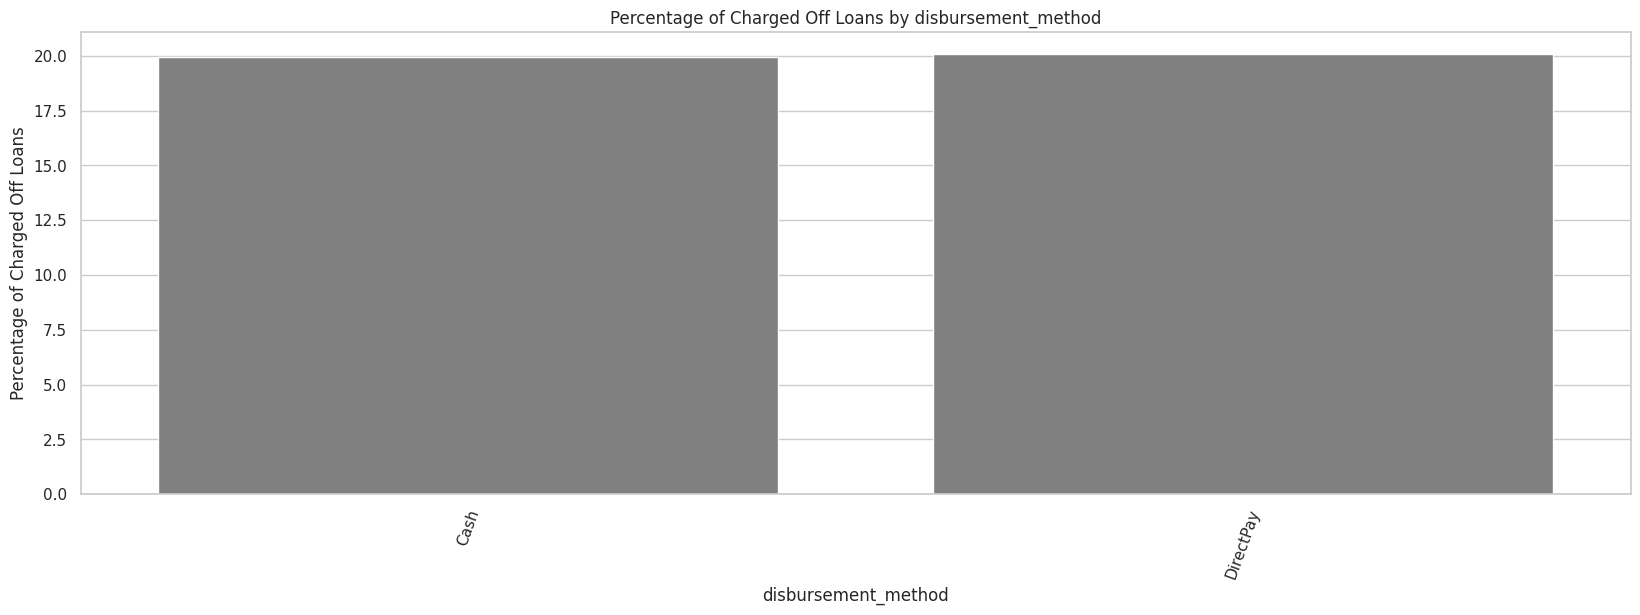

In [ ]:
# Creating a cross-tabulation of the count of loan statuses across disbursement_method
ctab = pd.crosstab(df['disbursement_method'], df['loan_status'])

# Calculate the percentage of Charged Off loans
ctab['Charged Off %'] = ctab['Charged Off'] / (ctab['Charged Off'] + ctab['Fully Paid']) * 100

# Resetting index to use 'disbursement_method' as a column for plotting
ctab.reset_index(inplace=True)

# Creating the bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x='disbursement_method', y='Charged Off %', data=ctab, color='grey')
plt.xticks(rotation=70)

# Adding labels and title
plt.title('Percentage of Charged Off Loans by disbursement_method')
plt.xlabel('disbursement_method')
plt.ylabel('Percentage of Charged Off Loans')

plt.show()

**column: debt_settlement_flag**

In [ ]:
len(df['debt_settlement_flag'].value_counts())

2

In [ ]:
df['debt_settlement_flag'].value_counts()

debt_settlement_flag
N    1312034
Y      33276
Name: count, dtype: int64

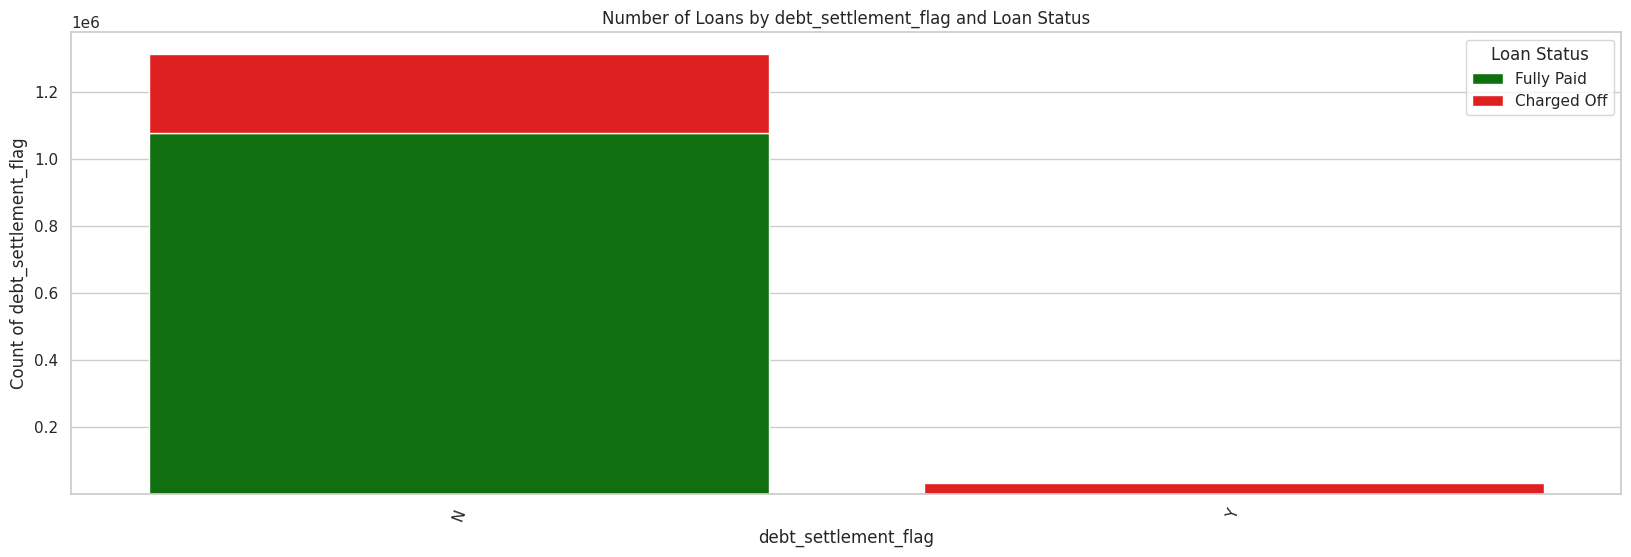

In [ ]:
#Visualizing the above grid

# Creating a cross-tabulation of the count of loan statuses across debt_settlement_flag
ctab = pd.crosstab(df['debt_settlement_flag'], df['loan_status'])

# Resetting index to use 'debt_settlement_flag' as a column for plotting
ctab.reset_index(inplace=True)

# Creating the bar plot
plt.figure(figsize=(20, 6))
bar_width = 0.20  # Narrower bar width
sns.barplot(x='debt_settlement_flag', y='Fully Paid', data=ctab, color='green', label='Fully Paid')
sns.barplot(x='debt_settlement_flag', y='Charged Off', data=ctab, color='red', label='Charged Off', bottom=ctab['Fully Paid'])
plt.xticks(rotation=70)

# Adding labels and title
plt.title('Number of Loans by debt_settlement_flag and Loan Status')
plt.xlabel('debt_settlement_flag')
plt.ylabel('Count of debt_settlement_flag')
plt.legend(title='Loan Status')

plt.show()

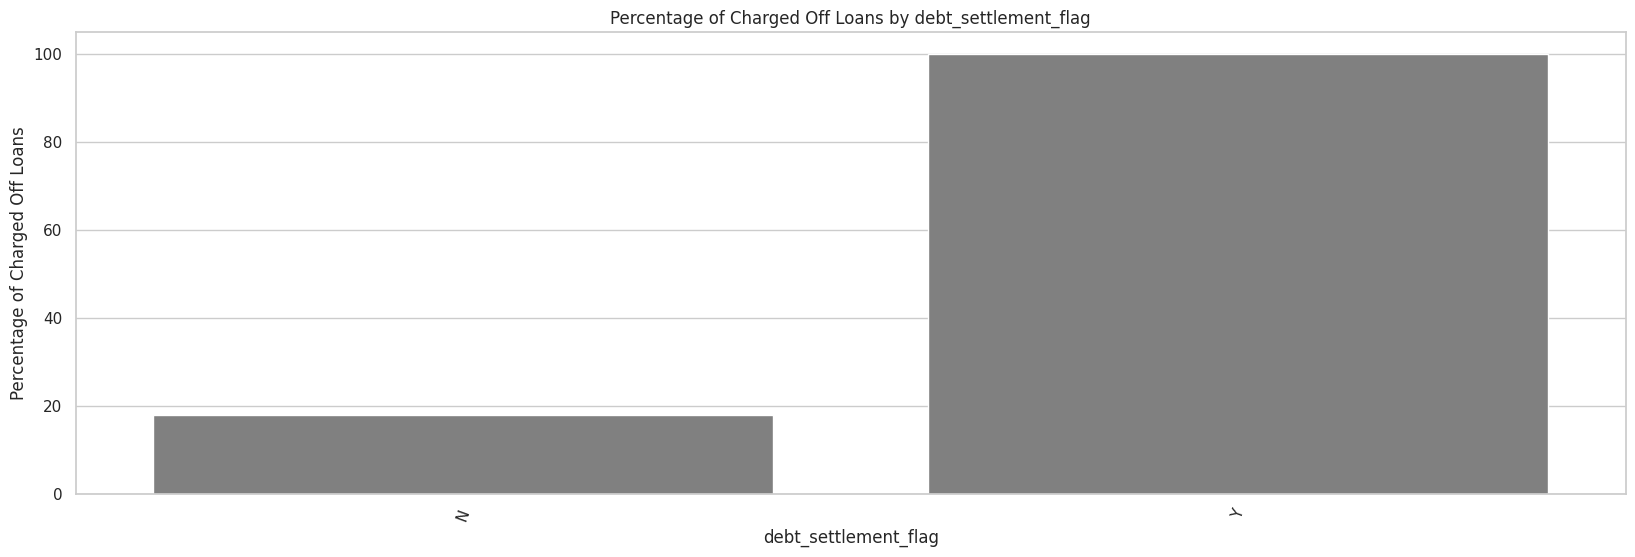

In [ ]:
# Creating a cross-tabulation of the count of loan statuses across debt_settlement_flag
ctab = pd.crosstab(df['debt_settlement_flag'], df['loan_status'])

# Calculate the percentage of Charged Off loans
ctab['Charged Off %'] = ctab['Charged Off'] / (ctab['Charged Off'] + ctab['Fully Paid']) * 100

# Resetting index to use 'debt_settlement_flag' as a column for plotting
ctab.reset_index(inplace=True)

# Creating the bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x='debt_settlement_flag', y='Charged Off %', data=ctab, color='grey')
plt.xticks(rotation=70)

# Adding labels and title
plt.title('Percentage of Charged Off Loans by debt_settlement_flag')
plt.xlabel('debt_settlement_flag')
plt.ylabel('Percentage of Charged Off Loans')

plt.show()

# **EDA Complete**

# **Summary of EDA**

Overall there were 93 columns on which exploratory data analysis is performed.

**1. Columns with missing values**


*   There were 47 columns with missing values.
*   Out of 47 columns, 34 columns can be dropped.

*   Along with 13 remaing columns, 6 new categorical variables to be created using columns: inq_last_6mths, tot_cur_bal, avg_cur_bal, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limit. After preprocessing column 'inq_last_6mths' wont be utilized. Hence will drop the same.
*   Total there will be 18 columns from this set of variables.
<br>

**2. Columns without missing values**


*   There were 46 columns with no missing values.
*   Out of 46 columns, 29 columns can be dropped. But before dropping 3 columns: delinq_2yrs, total_rec_prncp and recoveries, we will be creating 3 different columns out of them.


*   So along with 17 remaining columns and 3 new columns created, 6 new variables to be created using columns: int_rate, installment, home_ownership, annual_inc, revol_bal, last_fico_range_high and last_fico_range_low.
*   Total there will be 26 columns from this set of variables.


# **Next Step: Data pre-processing**
Based on EDA, we will reduce 93 variables to 44 variables.






